In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math
from scipy.ndimage import gaussian_filter

In [2]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 10}
plt.rc('font', **font)
#plt.rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (7,5) #(3.37,2.25)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
""" 
free energy surface
OPES_EXPANDED
Temperature (min, max, running) = 280_455_367.5
Data extracted from frequency of 10 (time=0,10,20,...)
"""

' \nfree energy surface\nOPES_EXPANDED\nTemperature (min, max, running) = 280_455_367.5\nData extracted from frequency of 10 (time=0,10,20,...)\n'

# Data from all walkers

In [20]:
ignore=25000 # Ignore this many lines from the beginning of files
COLVAR=np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/0/pasted")[ignore:,:]
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/1/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/2/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/3/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/4/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/5/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/6/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/7/pasted")[ignore:,:]))

In [21]:
# We assign to new variables the data of two CVs, the energy, and the bias
time_10=np.copy(COLVAR[:,0])
cmap_10=np.copy(COLVAR[:,2])
rmsd_10=np.copy(COLVAR[:,7])
energy_10=np.copy(COLVAR[:,1])
bias_10=np.copy(COLVAR[:,5])
len(time_10)

600008

In [6]:
time_10[-1]

1000000.0

# Q Vs time

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


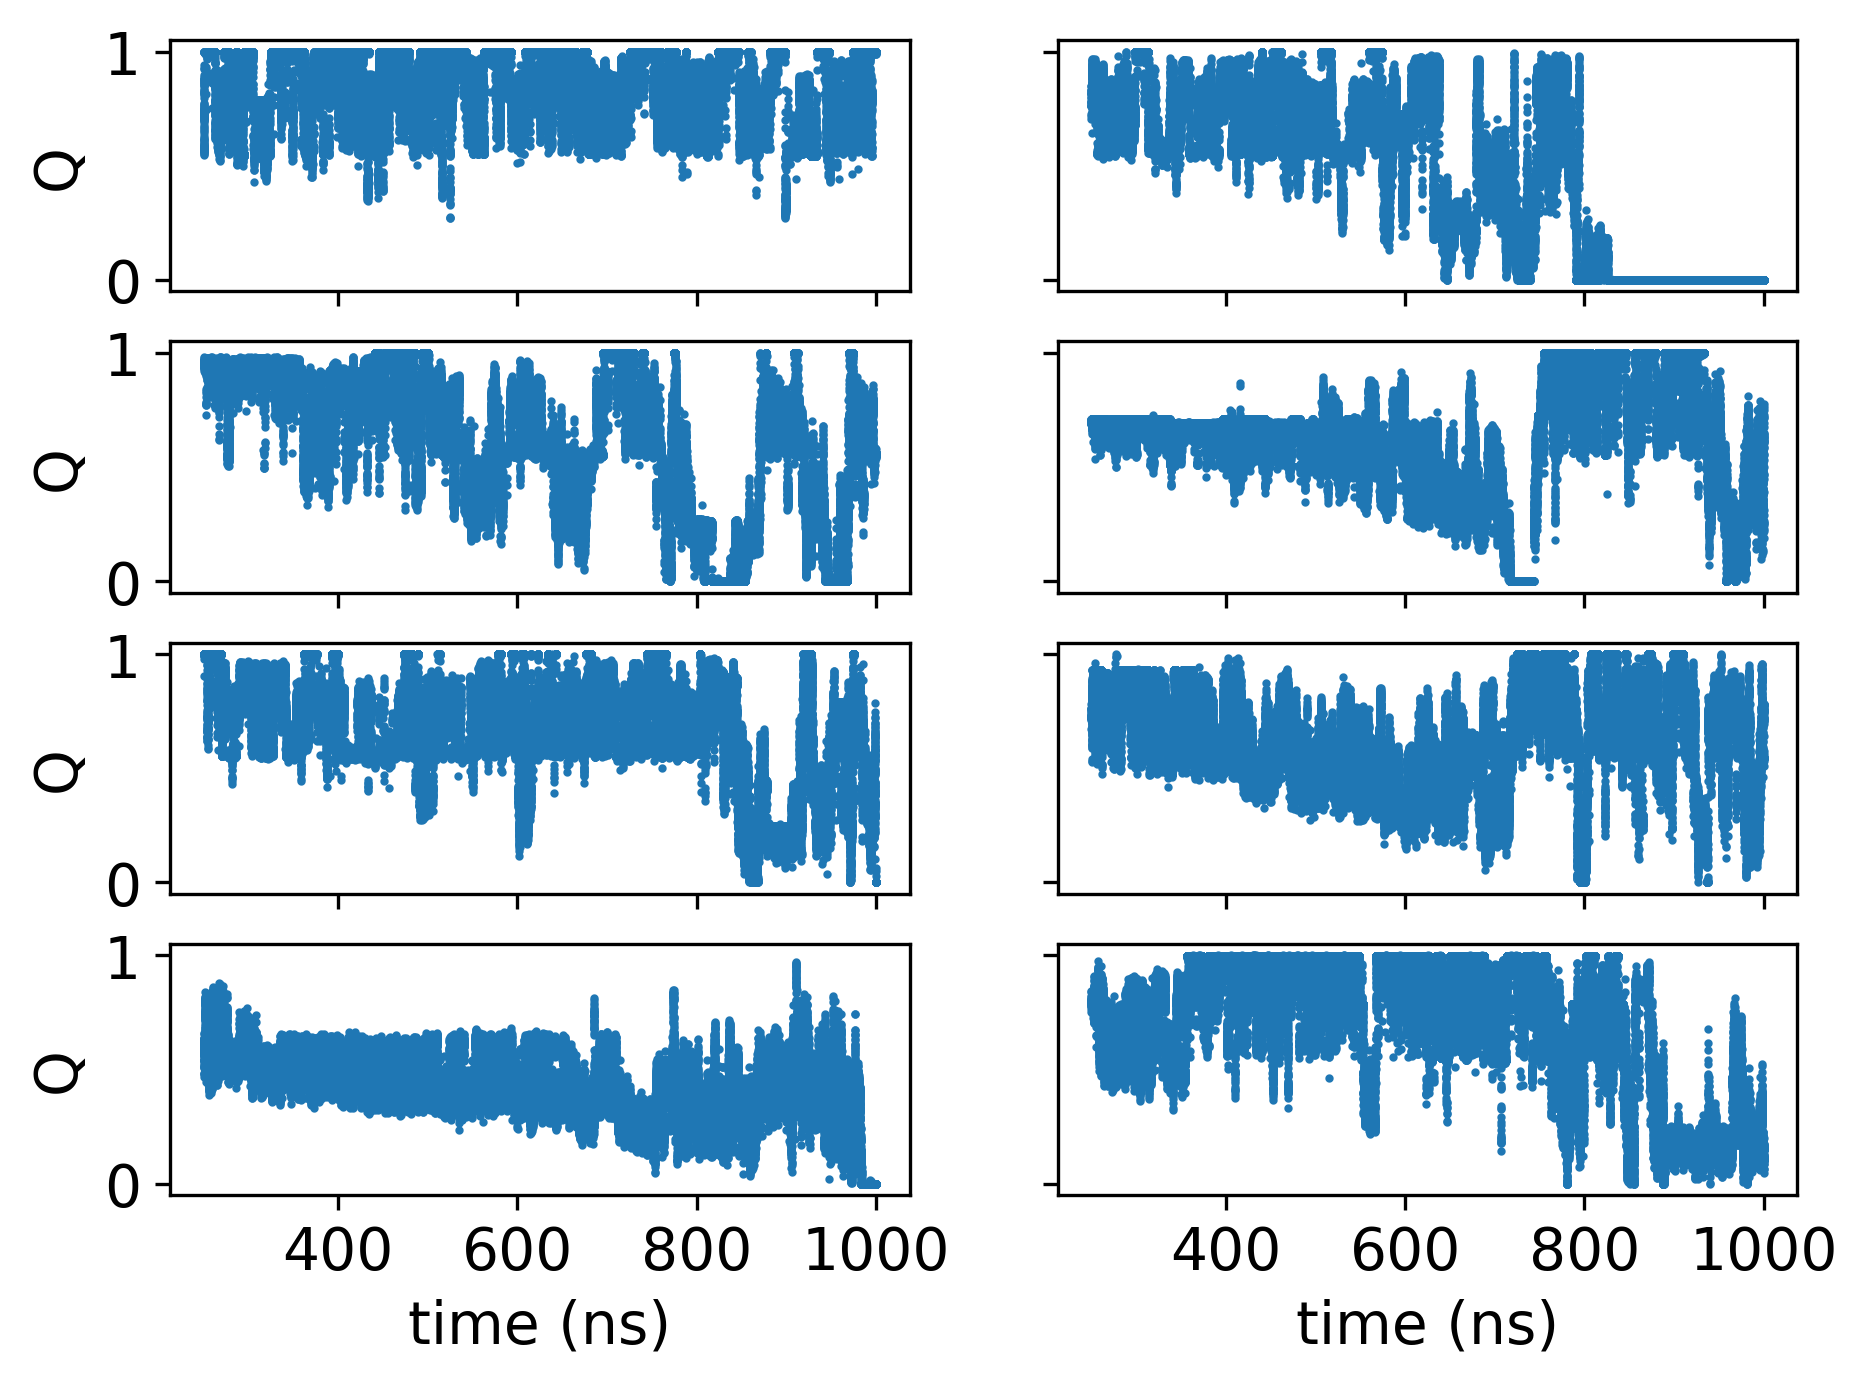

In [11]:
fig, axs = plt.subplots(4,2,sharex=True,sharey=True)
times=time_10.reshape((8,75001)) #divided the time into 8 pieces
cmaps=cmap_10.reshape((8,75001)) #divided the cmap into 8 pieces
#print (times[1])

counter=0
for i in range(4):
    for j in range(2):
        axs[i,j].plot(times[counter]/1000,cmaps[counter],'o',markersize=1)
        counter = counter +1
        
plt.setp(axs[-1, :], xlabel='time (ps)')
plt.setp(axs[:, 0], ylabel='Q')

for i in range(2):
    axs[-1,i].set_xlabel('time (ns)', fontsize = 14) # X label
    axs[-1,i].tick_params(axis='x', labelsize=14)
for i in range(4):
    axs[i,0].set_ylabel('Q', fontsize = 14) # Y label
    axs[i,0].tick_params(axis='y', labelsize=14)

# Volume vs time

In [40]:
ignore=25000 # Ignore this many lines from the beginning of files
volume=np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd0")[ignore:,:]
volume=np.concatenate((volume,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd1")[ignore:,:]))
volume=np.concatenate((volume,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd2")[ignore:,:]))
volume=np.concatenate((volume,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd3")[ignore:,:]))
volume=np.concatenate((volume,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd4")[ignore:,:]))
volume=np.concatenate((volume,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd5")[ignore:,:]))
volume=np.concatenate((volume,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd6")[ignore:,:]))
volume=np.concatenate((volume,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/volume/volume_nd7")[ignore:,:]))

In [45]:
volume_10=np.copy(volume[:,1])
time_2=np.copy(volume[:,0])

In [49]:
print(len(time_2), len(volume_10))

600032 600032


In [46]:
print(time_10[-1], time_2[-1])

1000000.0 1000003.68


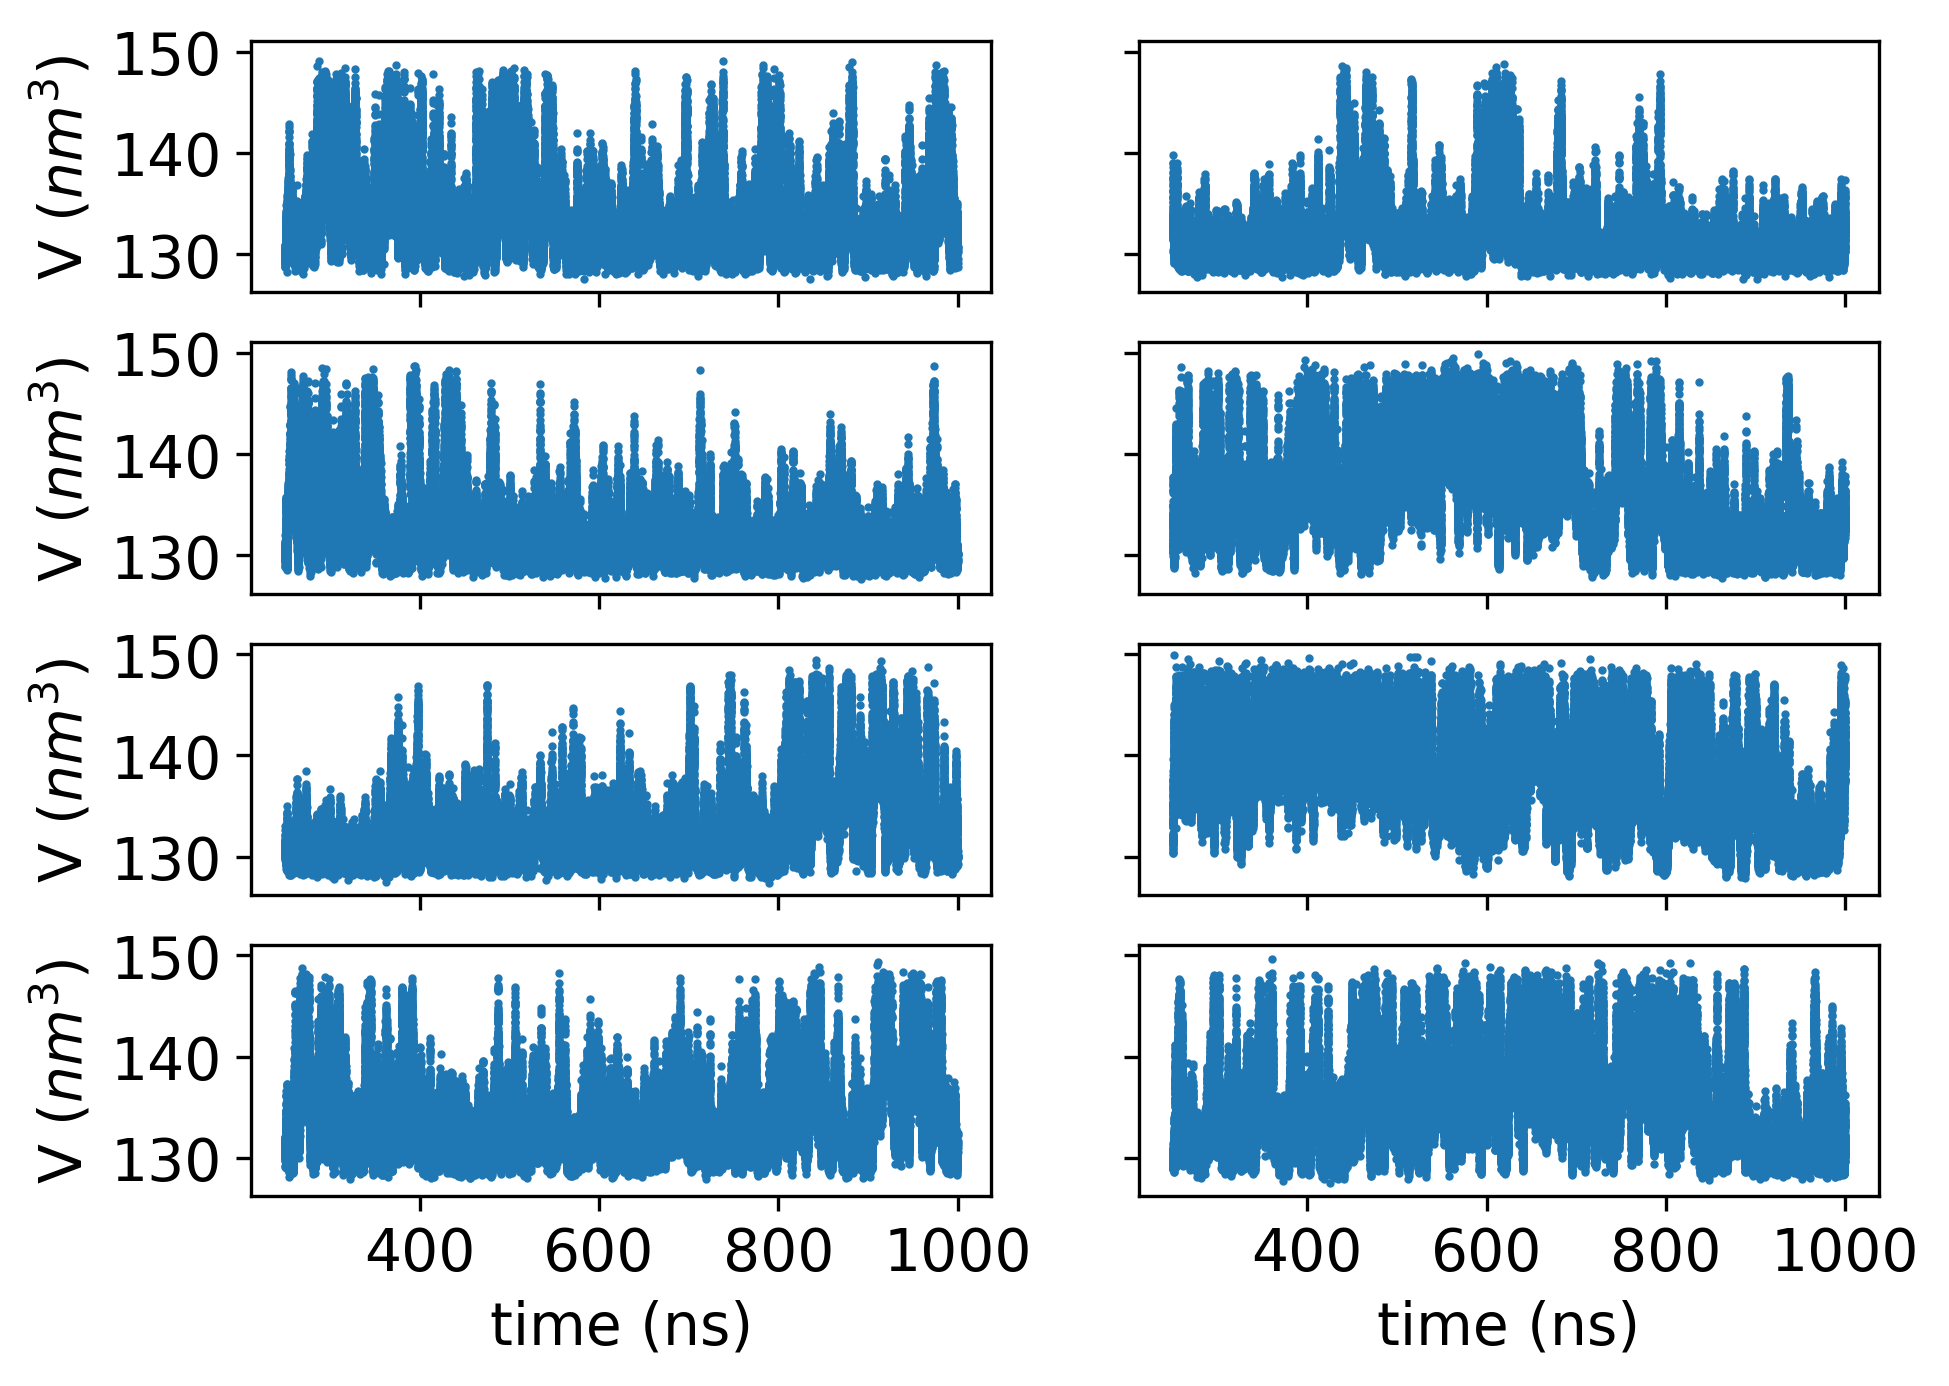

In [51]:
fig, axs = plt.subplots(4,2,sharex=True,sharey=True)
times=time_2.reshape((8,75004)) #divided the time into 8 pieces
vols=volume_10.reshape((8,75004)) #divided the cmap into 8 pieces
#print (times[1])

counter=0
for i in range(4):
    for j in range(2):
        axs[i,j].plot(times[counter]/1000,vols[counter],'o',markersize=1)
        counter = counter +1
        
plt.setp(axs[-1, :], xlabel='time (ns)')
plt.setp(axs[:, 0], ylabel='volume ($nm^3$)')

for i in range(2):
    axs[-1,i].set_xlabel('time (ns)', fontsize = 14) # X label
    axs[-1,i].tick_params(axis='x', labelsize=14)
for i in range(4):
    axs[i,0].set_ylabel('V ($nm^3$)', fontsize = 14) # Y label
    axs[i,0].tick_params(axis='y', labelsize=14)

# Potential energy with zoom

In [14]:
ignore=0 # Ignore this many lines from the beginning of files
COLVAR=np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/0/pasted")[ignore:,:]
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/1/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/2/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/3/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/4/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/5/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/6/pasted")[ignore:,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/7/pasted")[ignore:,:]))

In [15]:
# We assign to new variables the data of two CVs, the energy, and the bias
time_10=np.copy(COLVAR[:,0])
energy_10=np.copy(COLVAR[:,1])
print(len(time_10),len(time_10)/8)

800008 100001.0


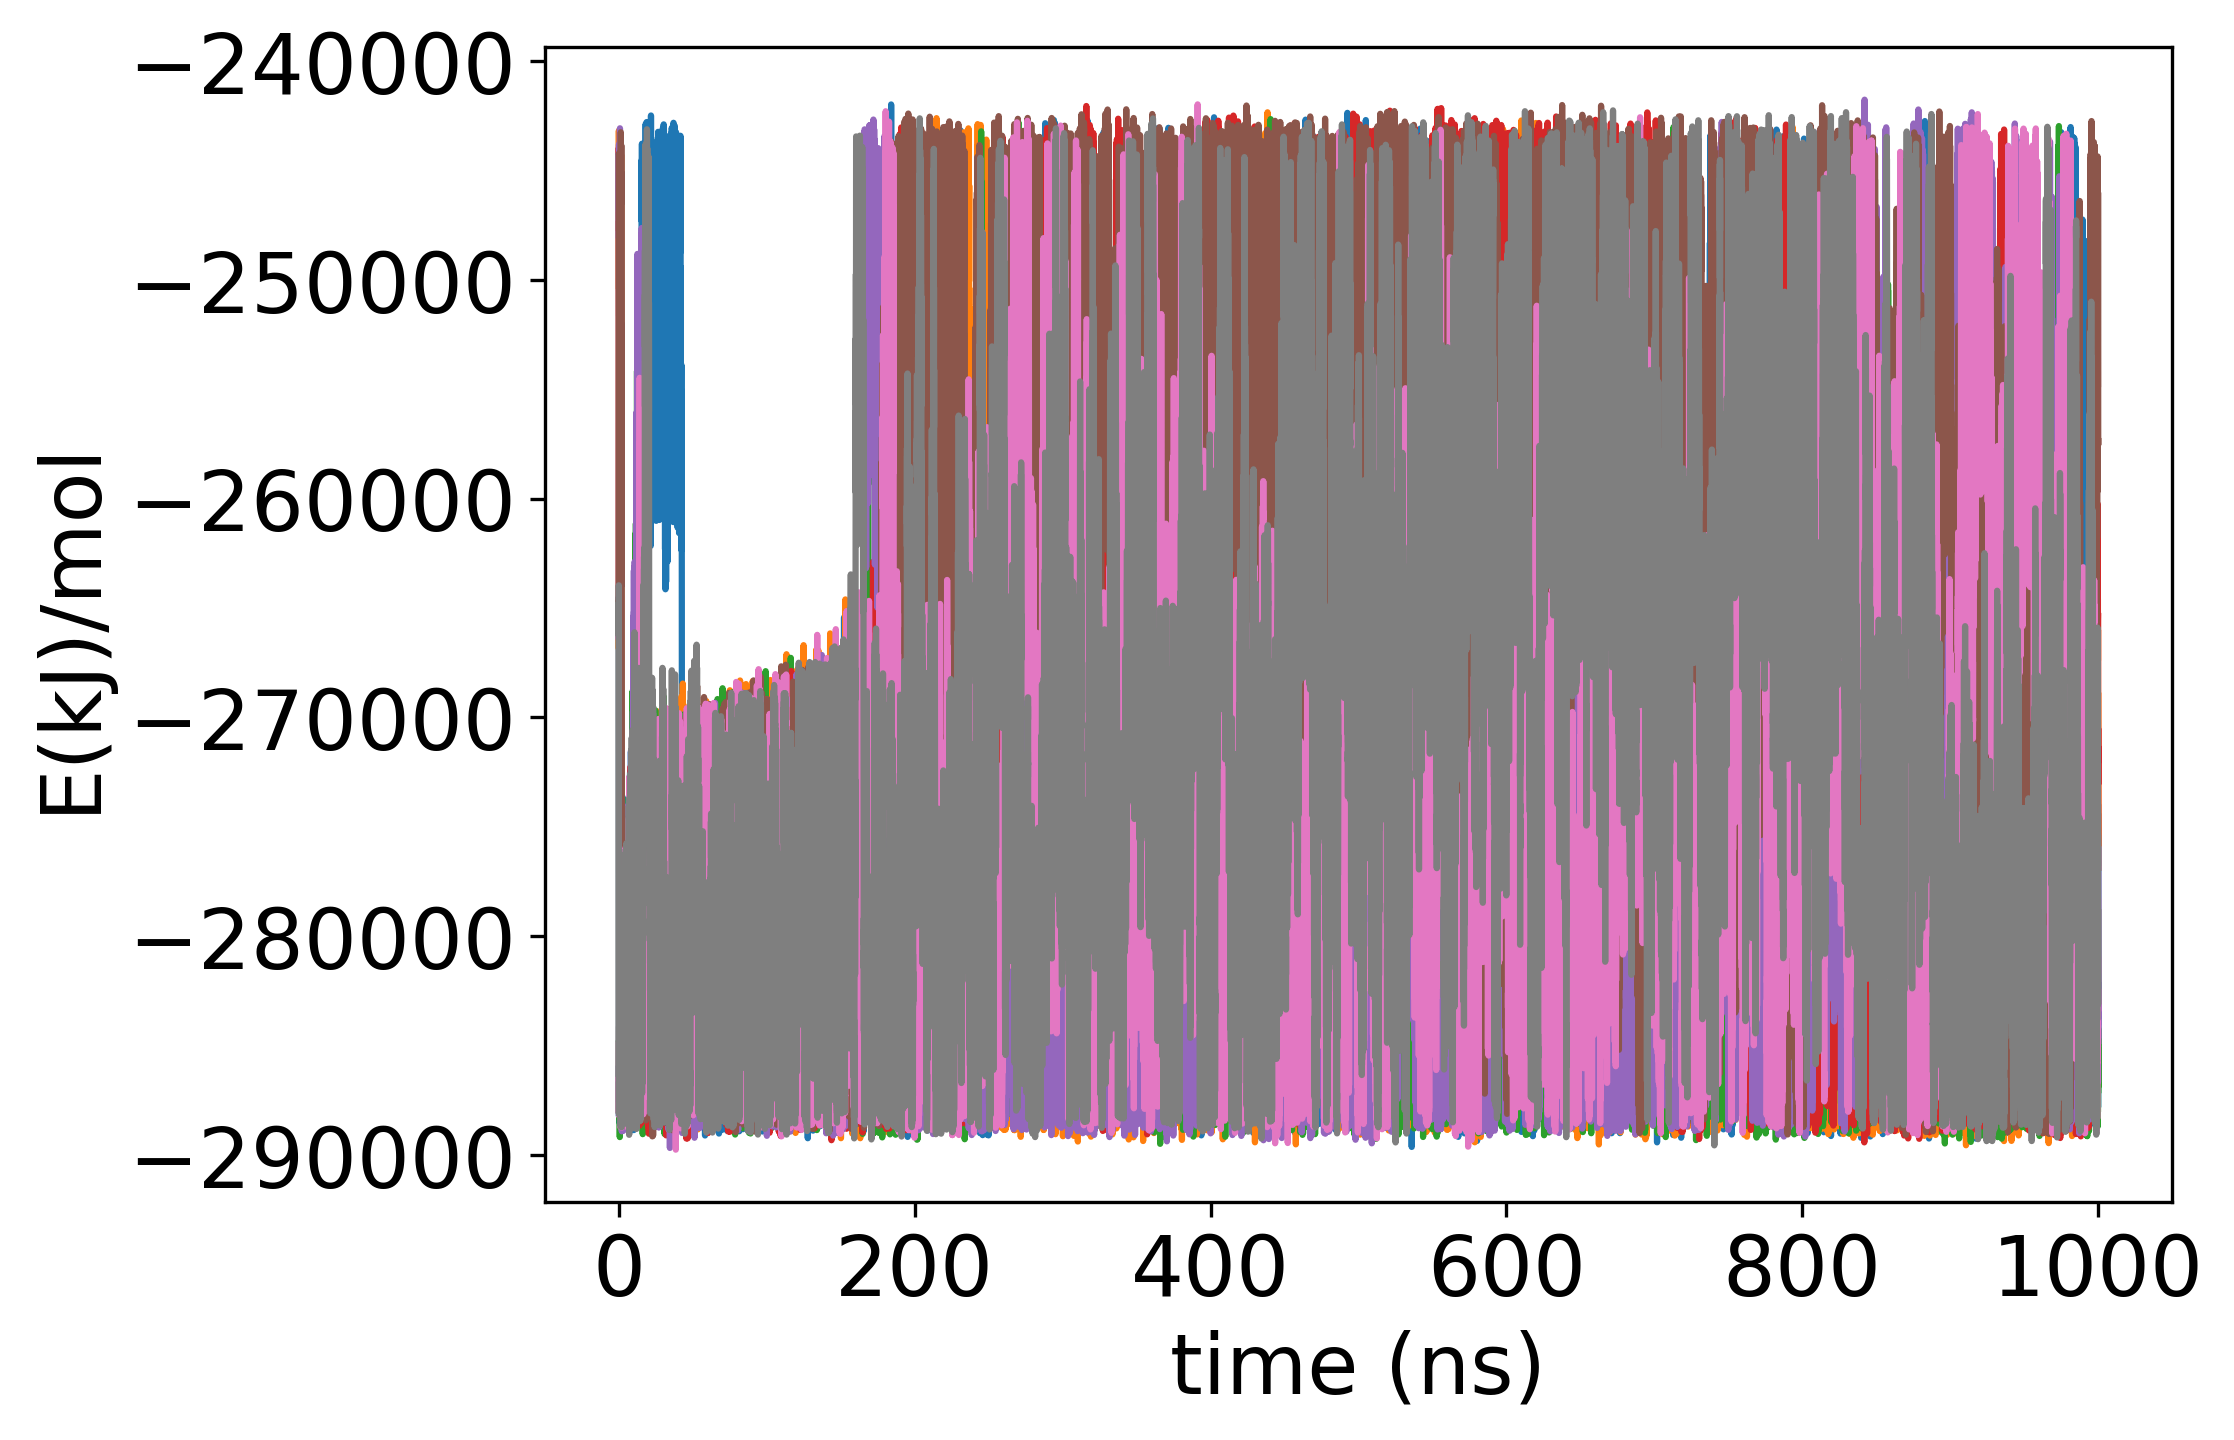

In [16]:
# all data
times=time_10.reshape((8,100001)) #divided the time into 8 pieces
energies=energy_10.reshape((8,100001)) #divided the cmap into 8 pieces
for i in range(8):
    plt.plot(times[i]/1000,energies[i])
plt.xlabel("time (ns)", fontsize=20)
plt.ylabel("E(kJ)/mol",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [18]:
times[0][0:21][-1]

200.0

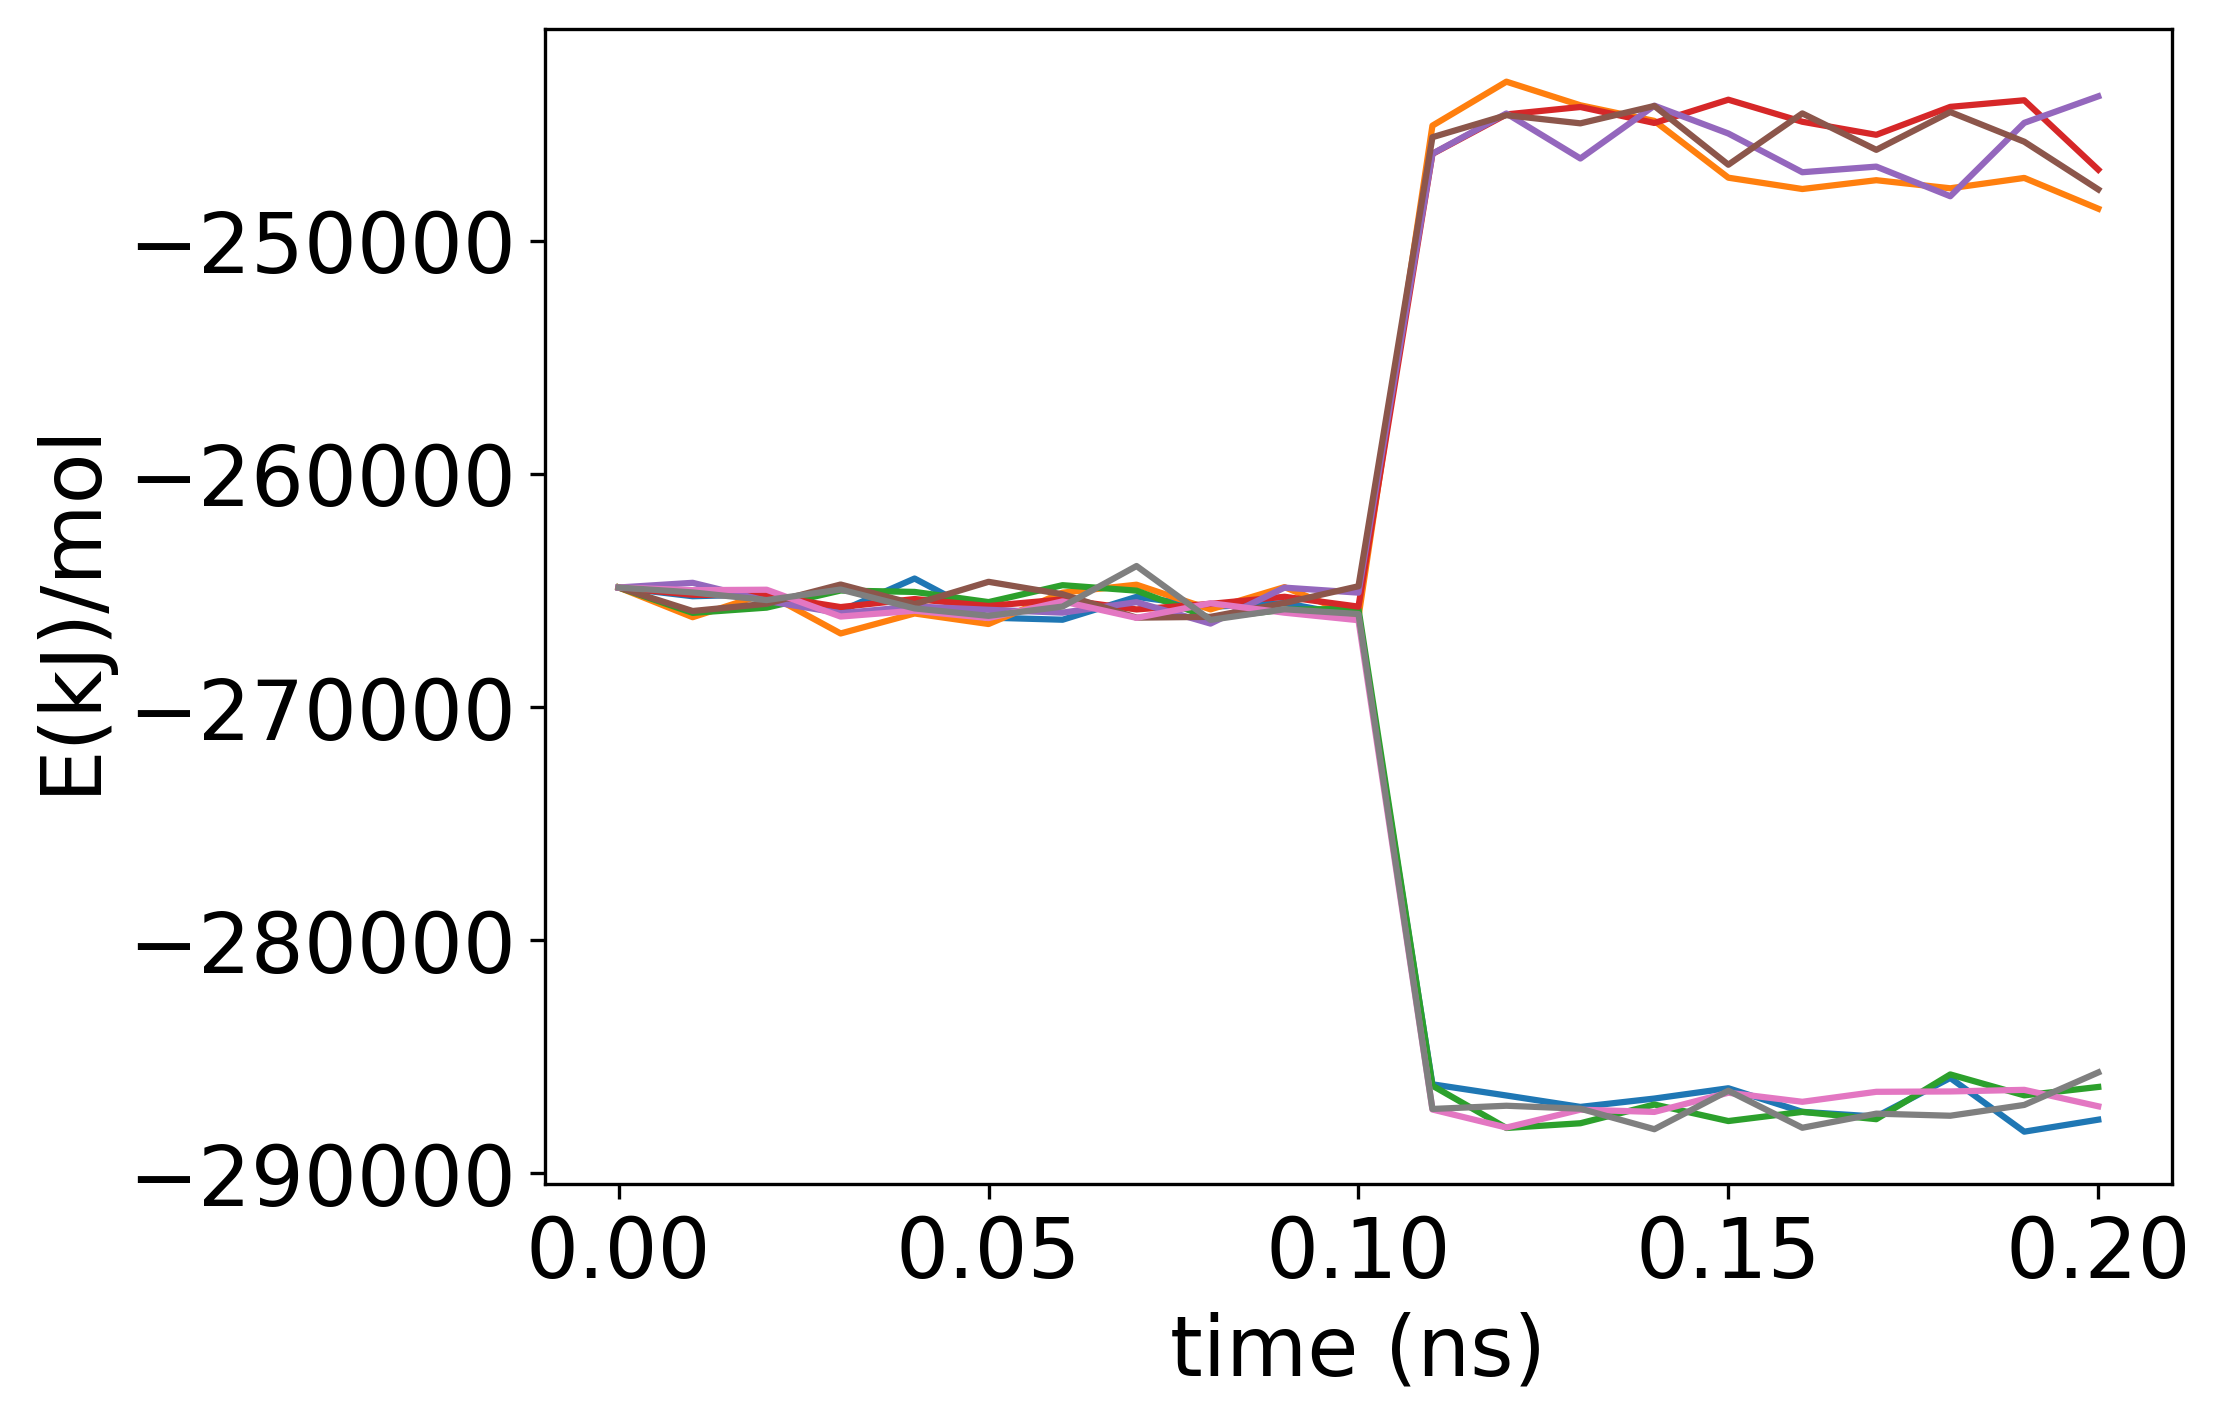

In [17]:
# zoom 1 (100 ps)
times=time_10.reshape((8,100001)) #divided the time into 8 pieces
energies=energy_10.reshape((8,100001)) #divided the cmap into 8 pieces
for i in range(8):
    plt.plot(times[i][0:21]/1000,energies[i][0:21])
plt.xlabel("time (ns)", fontsize=20)
plt.ylabel("E(kJ)/mol",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [20]:
times[0][0:30001][-1]

100000.0

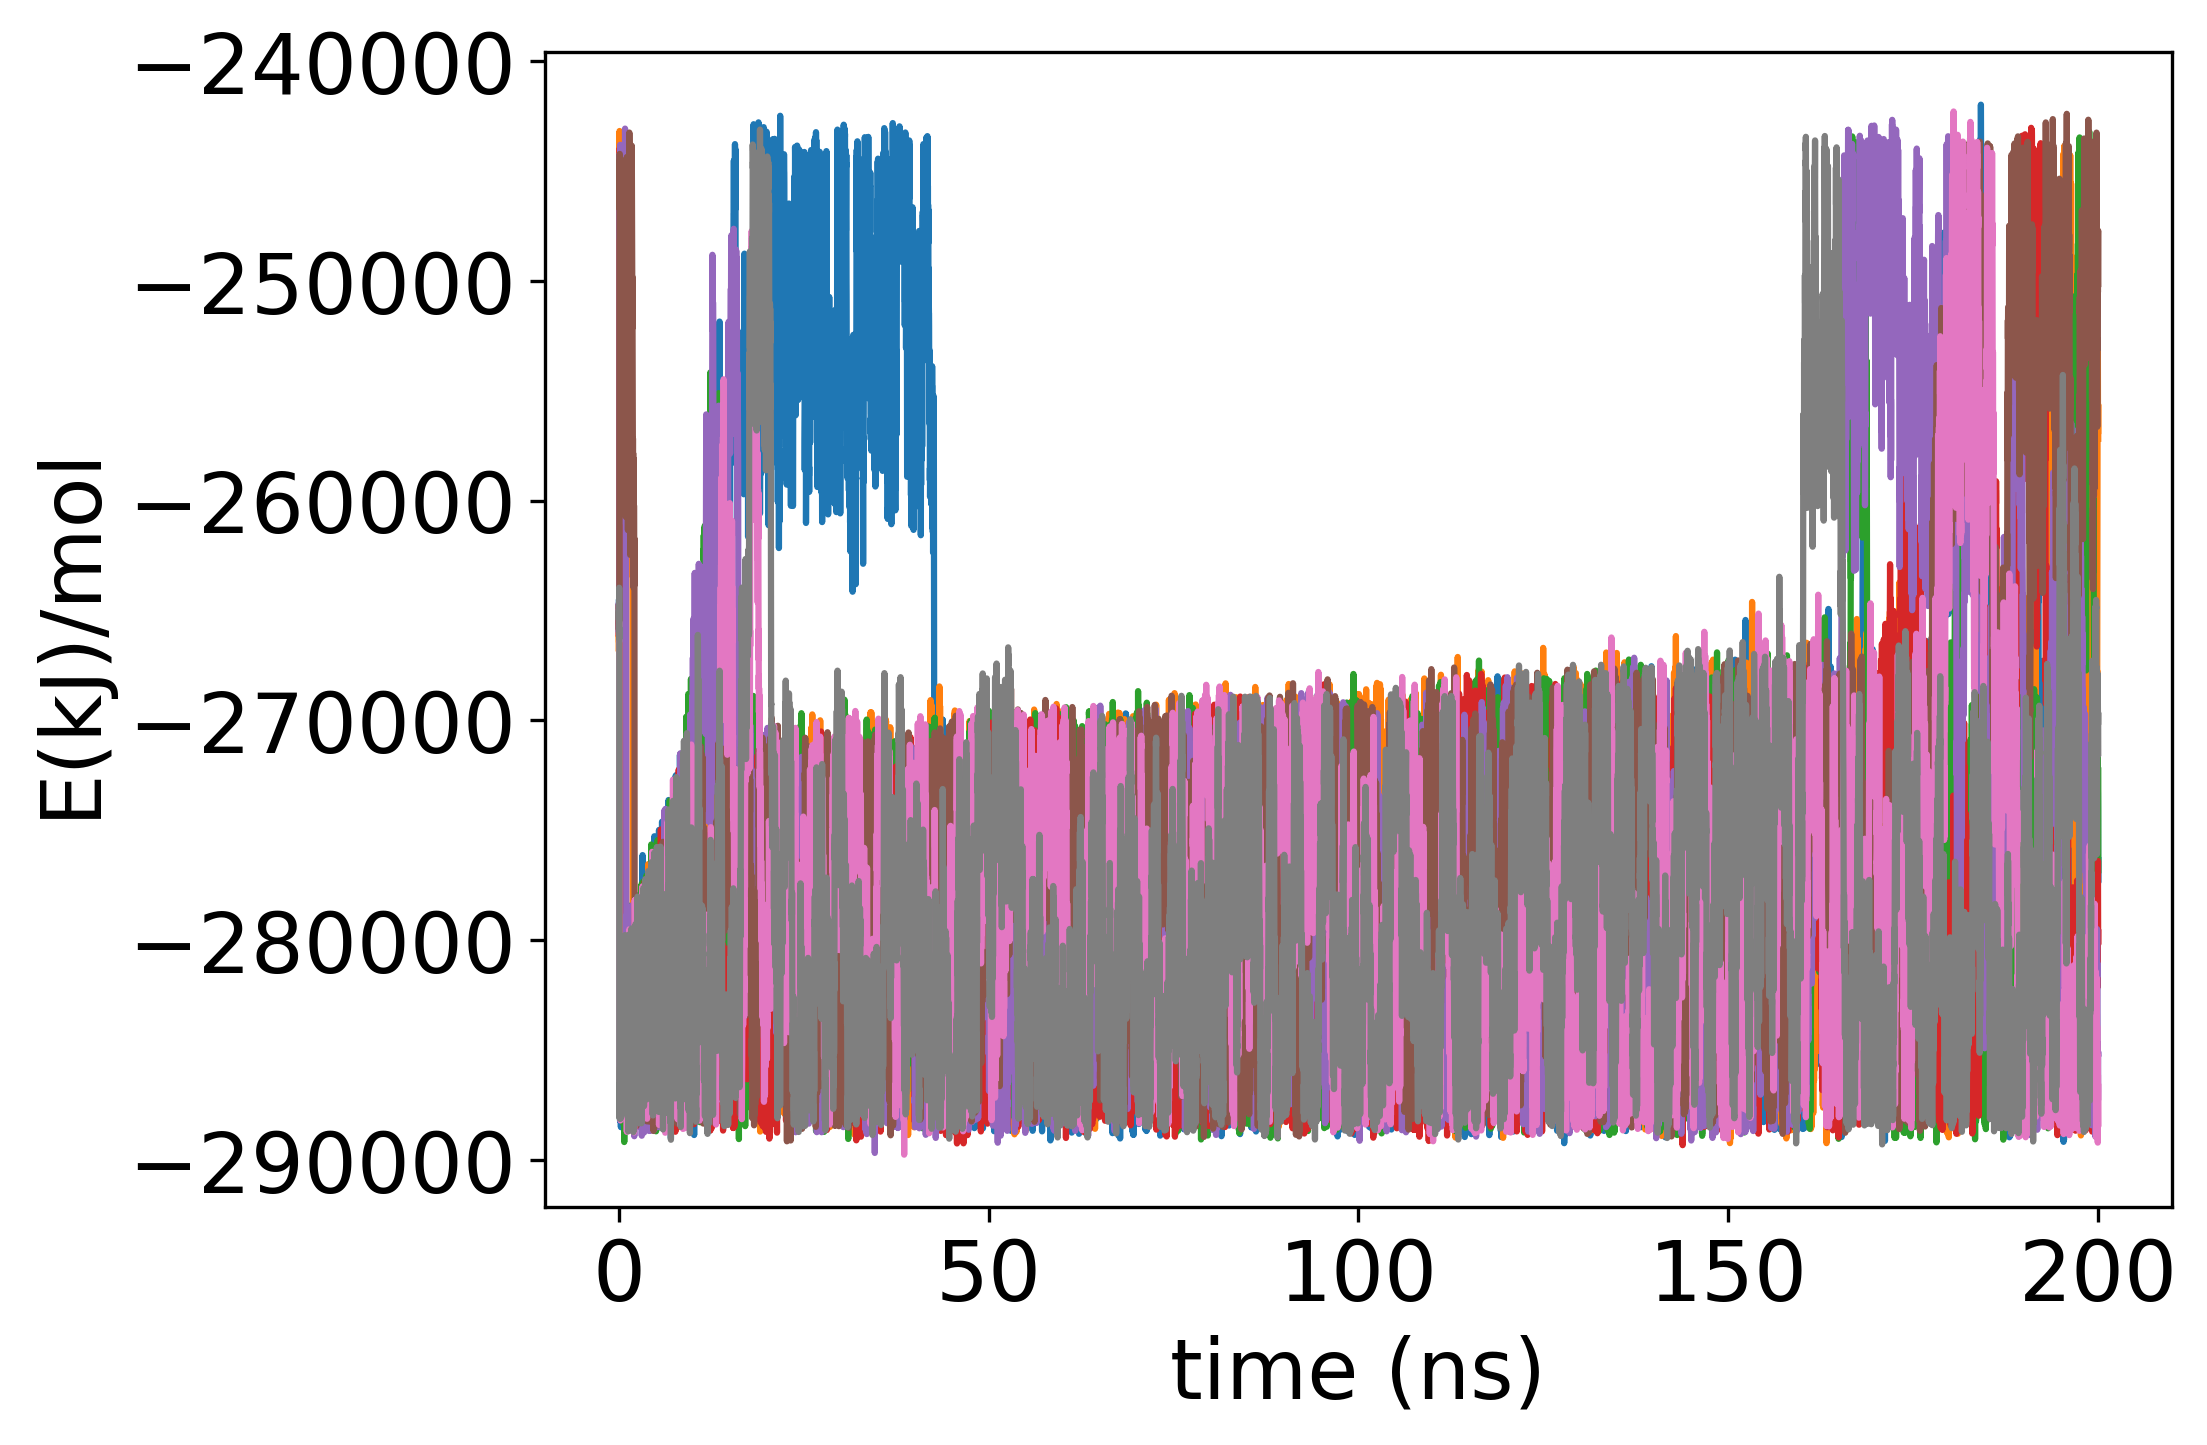

In [18]:
# zoom 1 (100000 ps)
times=time_10.reshape((8,100001)) #divided the time into 8 pieces
energies=energy_10.reshape((8,100001)) #divided the cmap into 8 pieces
for i in range(8):
    plt.plot(times[i][0:20001]/1000,energies[i][0:20001])
plt.xlabel("time (ns)", fontsize=20)
plt.ylabel("E(kJ)/mol",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

# RMSD vs time

[Text(0, 0.5, 'RMSD'),
 Text(0, 0.5, 'RMSD'),
 Text(0, 0.5, 'RMSD'),
 Text(0, 0.5, 'RMSD')]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


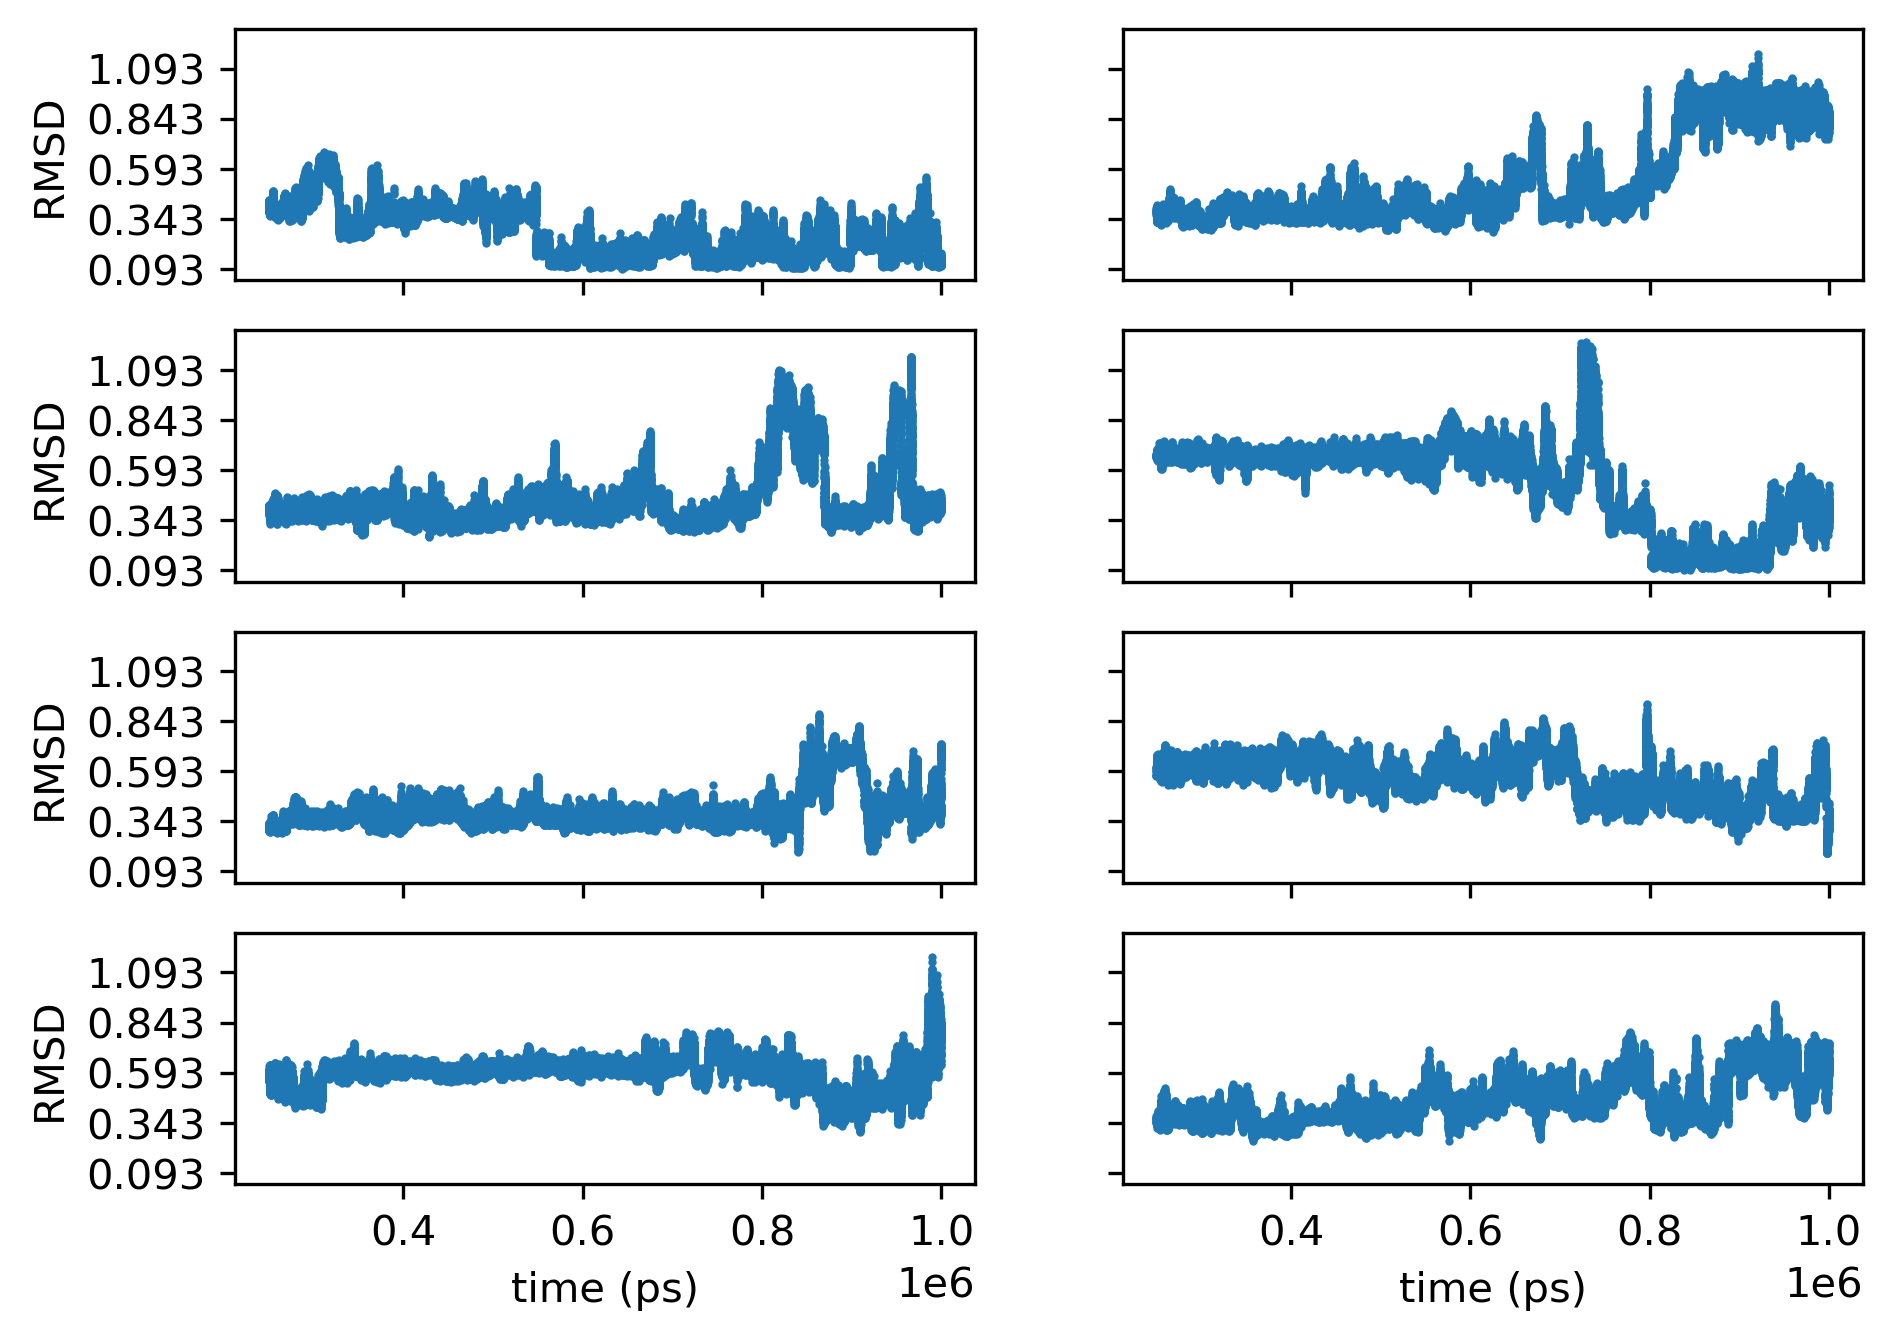

In [12]:
fig, axs = plt.subplots(4,2,sharex=True,sharey=True)
times_10=time_10.reshape((8,75001)) #divided the time into 8 pieces
rmsds=rmsd_10.reshape((8,75001)) #divided the rmsd into 8 pieces


counter=0
for i in range(4):
    for j in range(2):
        axs[i,j].plot(times_10[counter],rmsds[counter],'o',markersize=1)
        plt.yticks(np.arange(np.amin(rmsd_10), np.amax(rmsd_10), 0.25))
 #       axs[i,j].set_ylim ([0.08,1.42])
        counter = counter +1
plt.setp(axs[-1, :], xlabel='time (ps)')
plt.setp(axs[:, 0], ylabel='RMSD')

In [8]:
rmsd_max =np.amax(rmsd_10)
rmsd_max

1.2326761

In [9]:
rmsd_min =np.amin(rmsd_10)
rmsd_min

0.0930581

# Free energy vs RMSD

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


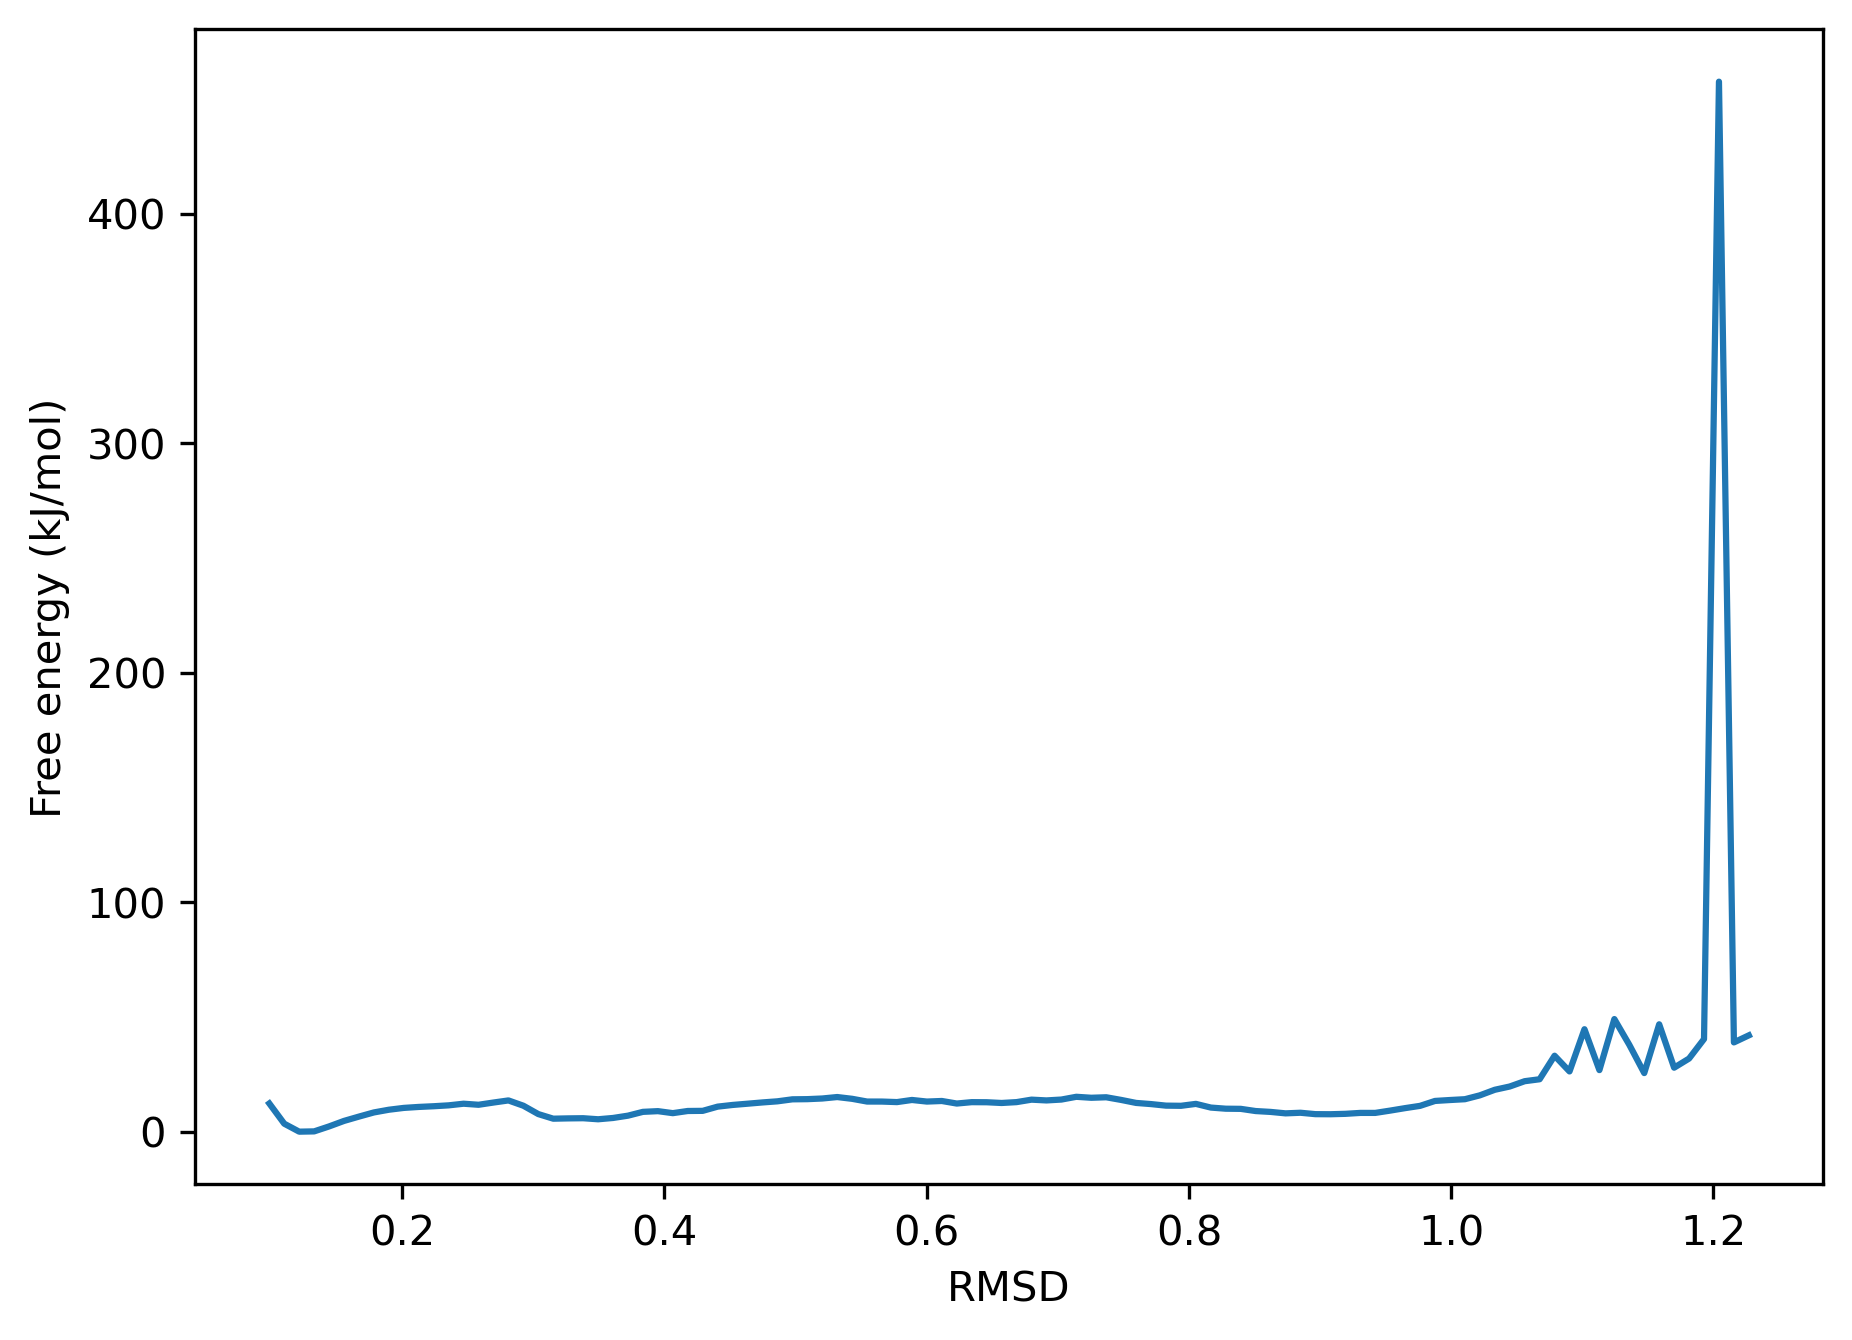

In [6]:
kb=0.00831446 # kJ/mol/K
temperature=377.5 # K
beta=1./(kb*temperature)
newTemperature=300 # K
newBeta=1./(kb*newTemperature)
logweights=beta*bias_10+(beta-newBeta)*energy_10
logweights -= np.amax(logweights)
weights = np.exp(logweights)
hist, bin_edges = np.histogram(rmsd_10, weights=np.exp(logweights), density=True,bins=100)
#freeEnergy = -(1./newBeta)*np.log(hist)/numMolecules
freeEnergy = -(1./newBeta)*np.log(hist)
freeEnergy -= np.amin(freeEnergy)
bin_centers=(bin_edges[:-1]+bin_edges[1:])/2
plt.plot(bin_centers,freeEnergy)
plt.xlabel("RMSD")
plt.ylabel("Free energy (kJ/mol)")
#plt.ylim([0,100])
#plt.xlim(0,1.2)
plt.show()

# Free energy vs Q

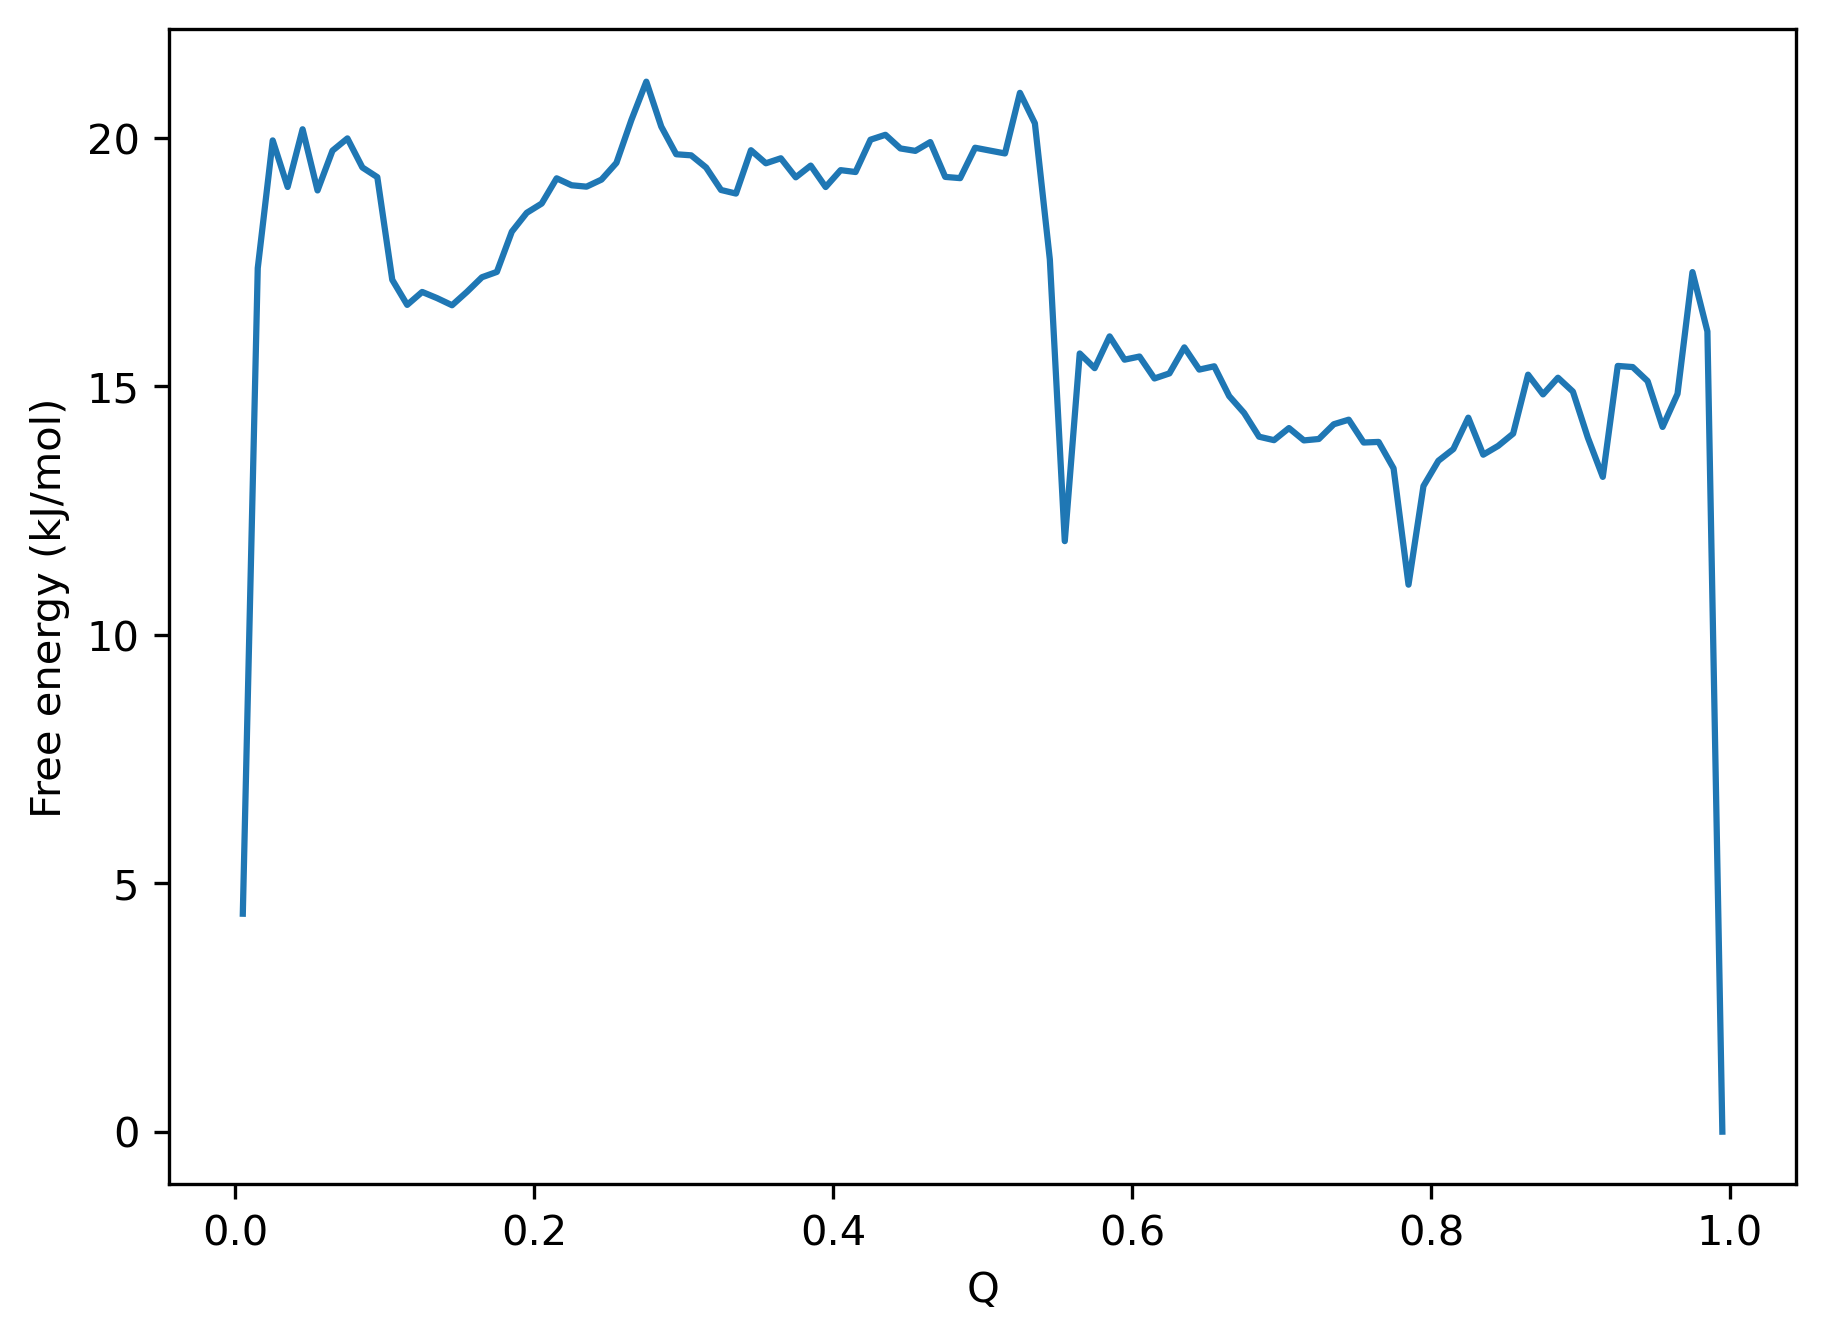

In [11]:
kb=0.00831446 # kJ/mol/K
temperature=377.5 # K
beta=1./(kb*temperature)
newTemperature=300 # K
newBeta=1./(kb*newTemperature)
logweights=beta*bias_10+(beta-newBeta)*energy_10
logweights -= np.amax(logweights)
hist, bin_edges = np.histogram(cmap_10, weights=np.exp(logweights), density=True,bins=100)
#freeEnergy = -(1./newBeta)*np.log(hist)/numMolecules
freeEnergy = -(1./newBeta)*np.log(hist)
freeEnergy -= np.amin(freeEnergy)
bin_centers=(bin_edges[:-1]+bin_edges[1:])/2
plt.plot(bin_centers,freeEnergy)
plt.xlabel("Q")
plt.ylabel("Free energy (kJ/mol)")
plt.show()

# 2D dimensional FES

/tmp/ipykernel_3166335/4097275250.py:5: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


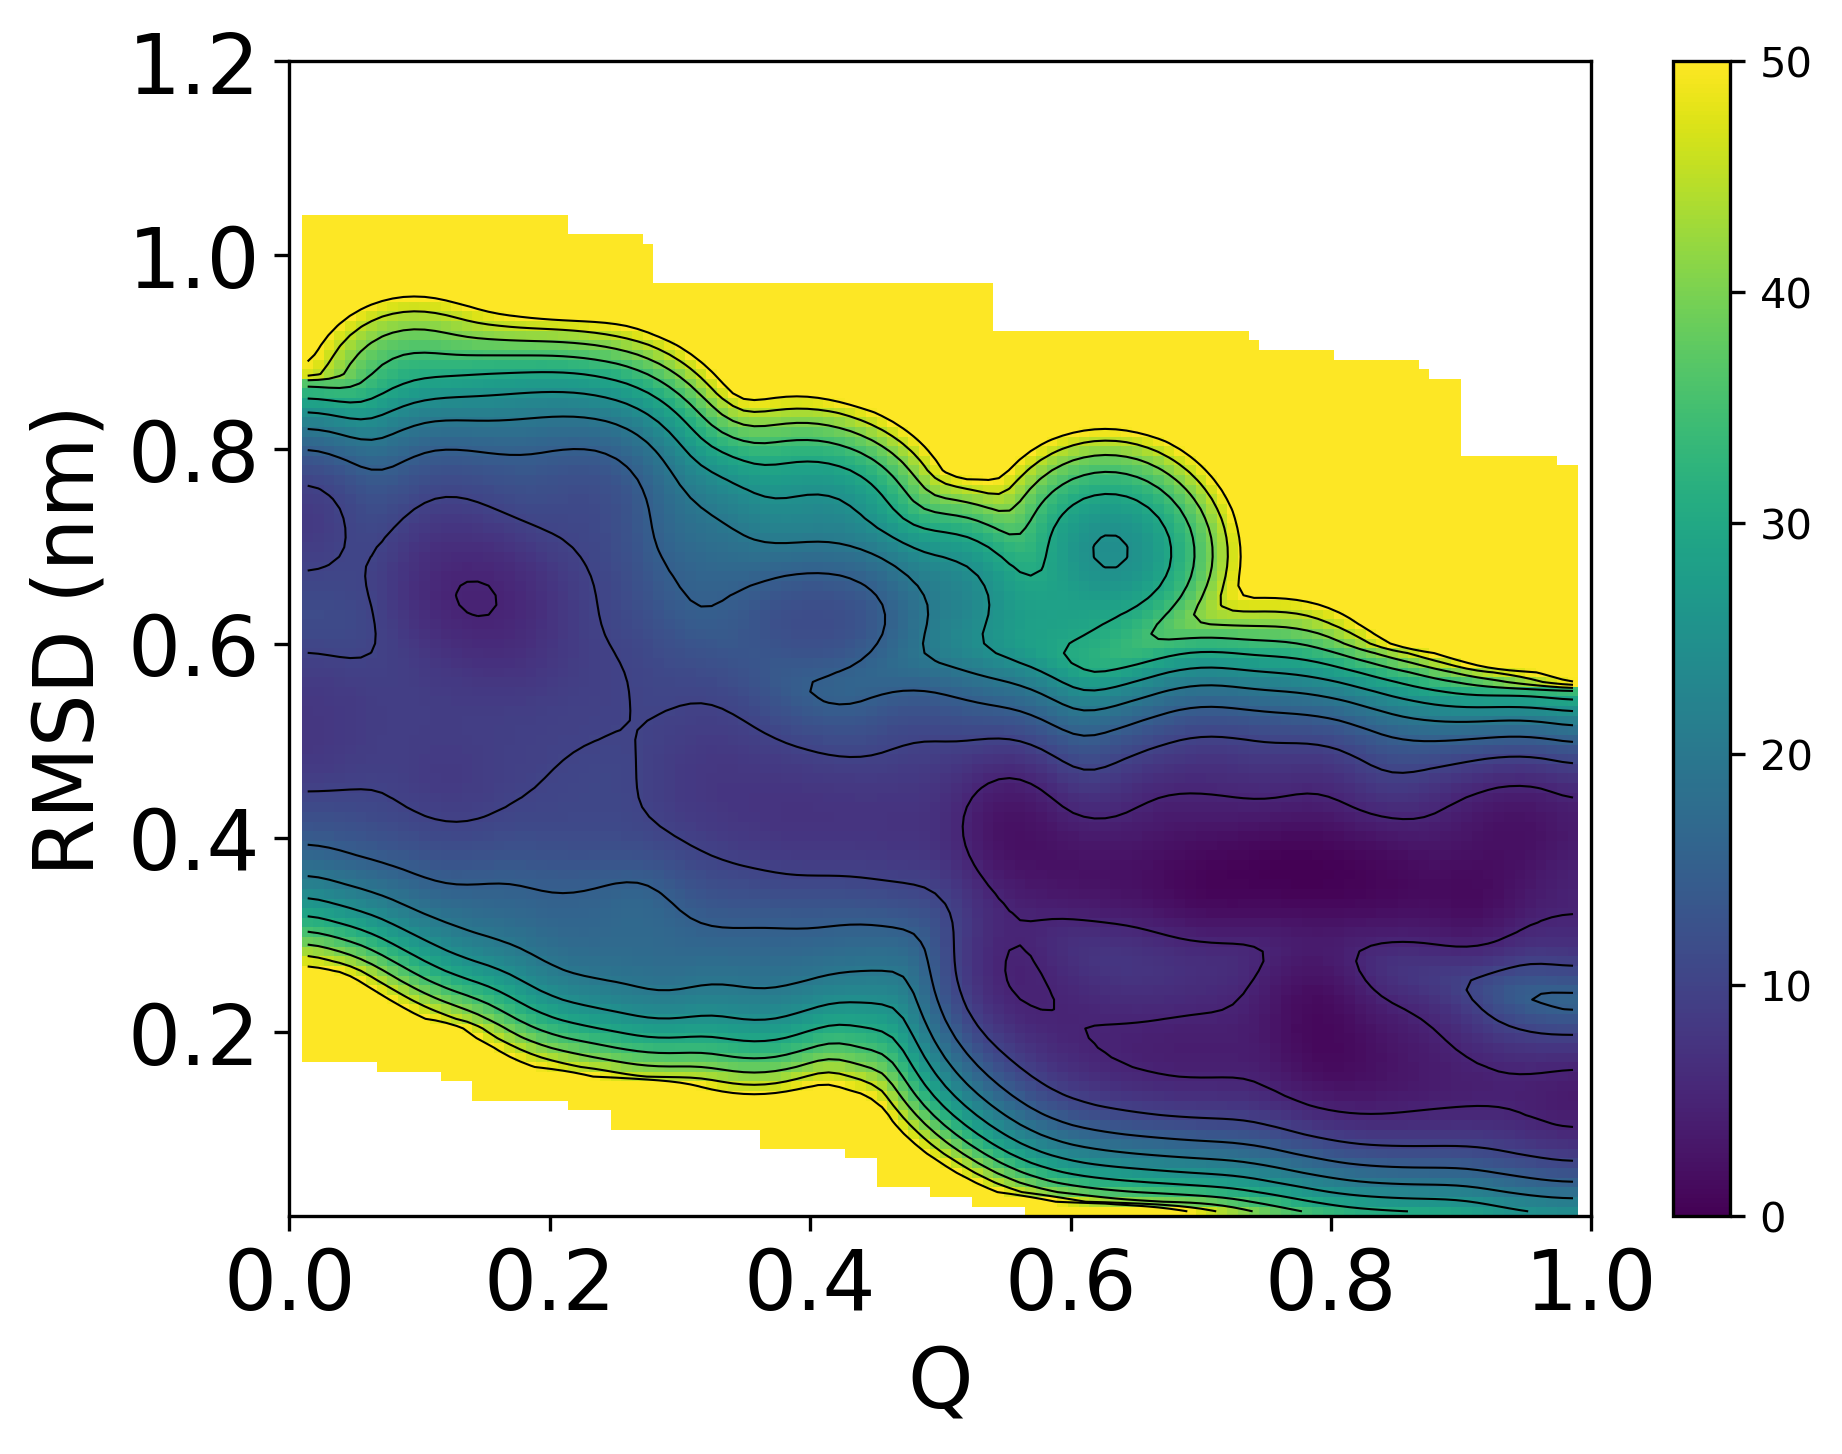

In [10]:
from scipy.ndimage import gaussian_filter

H1, xedges1, yedges1 = np.histogram2d(cmap_10, rmsd_10, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H1 = H1.T
H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
H1 -= np.amin(H1) 
X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, H1, vmin=0,vmax=50)
plt.colorbar()
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.
#plt.contour(x,y, H1,20,vmin=0,vmax=20,colors='black',linewidths=0.5)
plt.contour(x,y, H1 ,np.arange(0,55,5),colors='black',linewidths=0.5)

plt.xlim([0,1])
plt.ylim([0.01,1.2])

plt.xlabel("Q", fontsize=20)
plt.ylabel("RMSD (nm)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

#### 

# Calculate effective sample size

In [13]:
temperature=377.5 # K
kb=0.00831446 # kJ/mol/K
beta=1./(kb*temperature)
temps=np.linspace(290,465,21)
neff=np.zeros(temps.shape[0])
for i in range(temps.shape[0]):
    newTemperature=temps[i]
    newBeta=1./(kb*newTemperature)
    #calculate weights at a given temperature (wrt to the simulation temperature)
    logweights=beta*bias_10+(beta-newBeta)*energy_10 #why does log weights only consider energy? Just because energy is the thing that determines T?
    logweights -= np.amax(logweights)
    weights=np.exp(logweights)
    neff[i]=np.power(np.sum(weights),2)/np.sum(np.power(weights,2))
print (neff, logweights.shape)

[2010.74316968 3329.82281629 3453.68650996 3718.24865061 4033.06112131
 4326.05303628 4865.35681942 5091.81991794 5066.74985159 4594.98845836
 3284.84855056  769.63103525   28.90858987   10.81814177   35.65575185
   89.77896116   76.90930365 1848.42143365 1195.08497177  339.94781041
  557.77515226] (600008,)


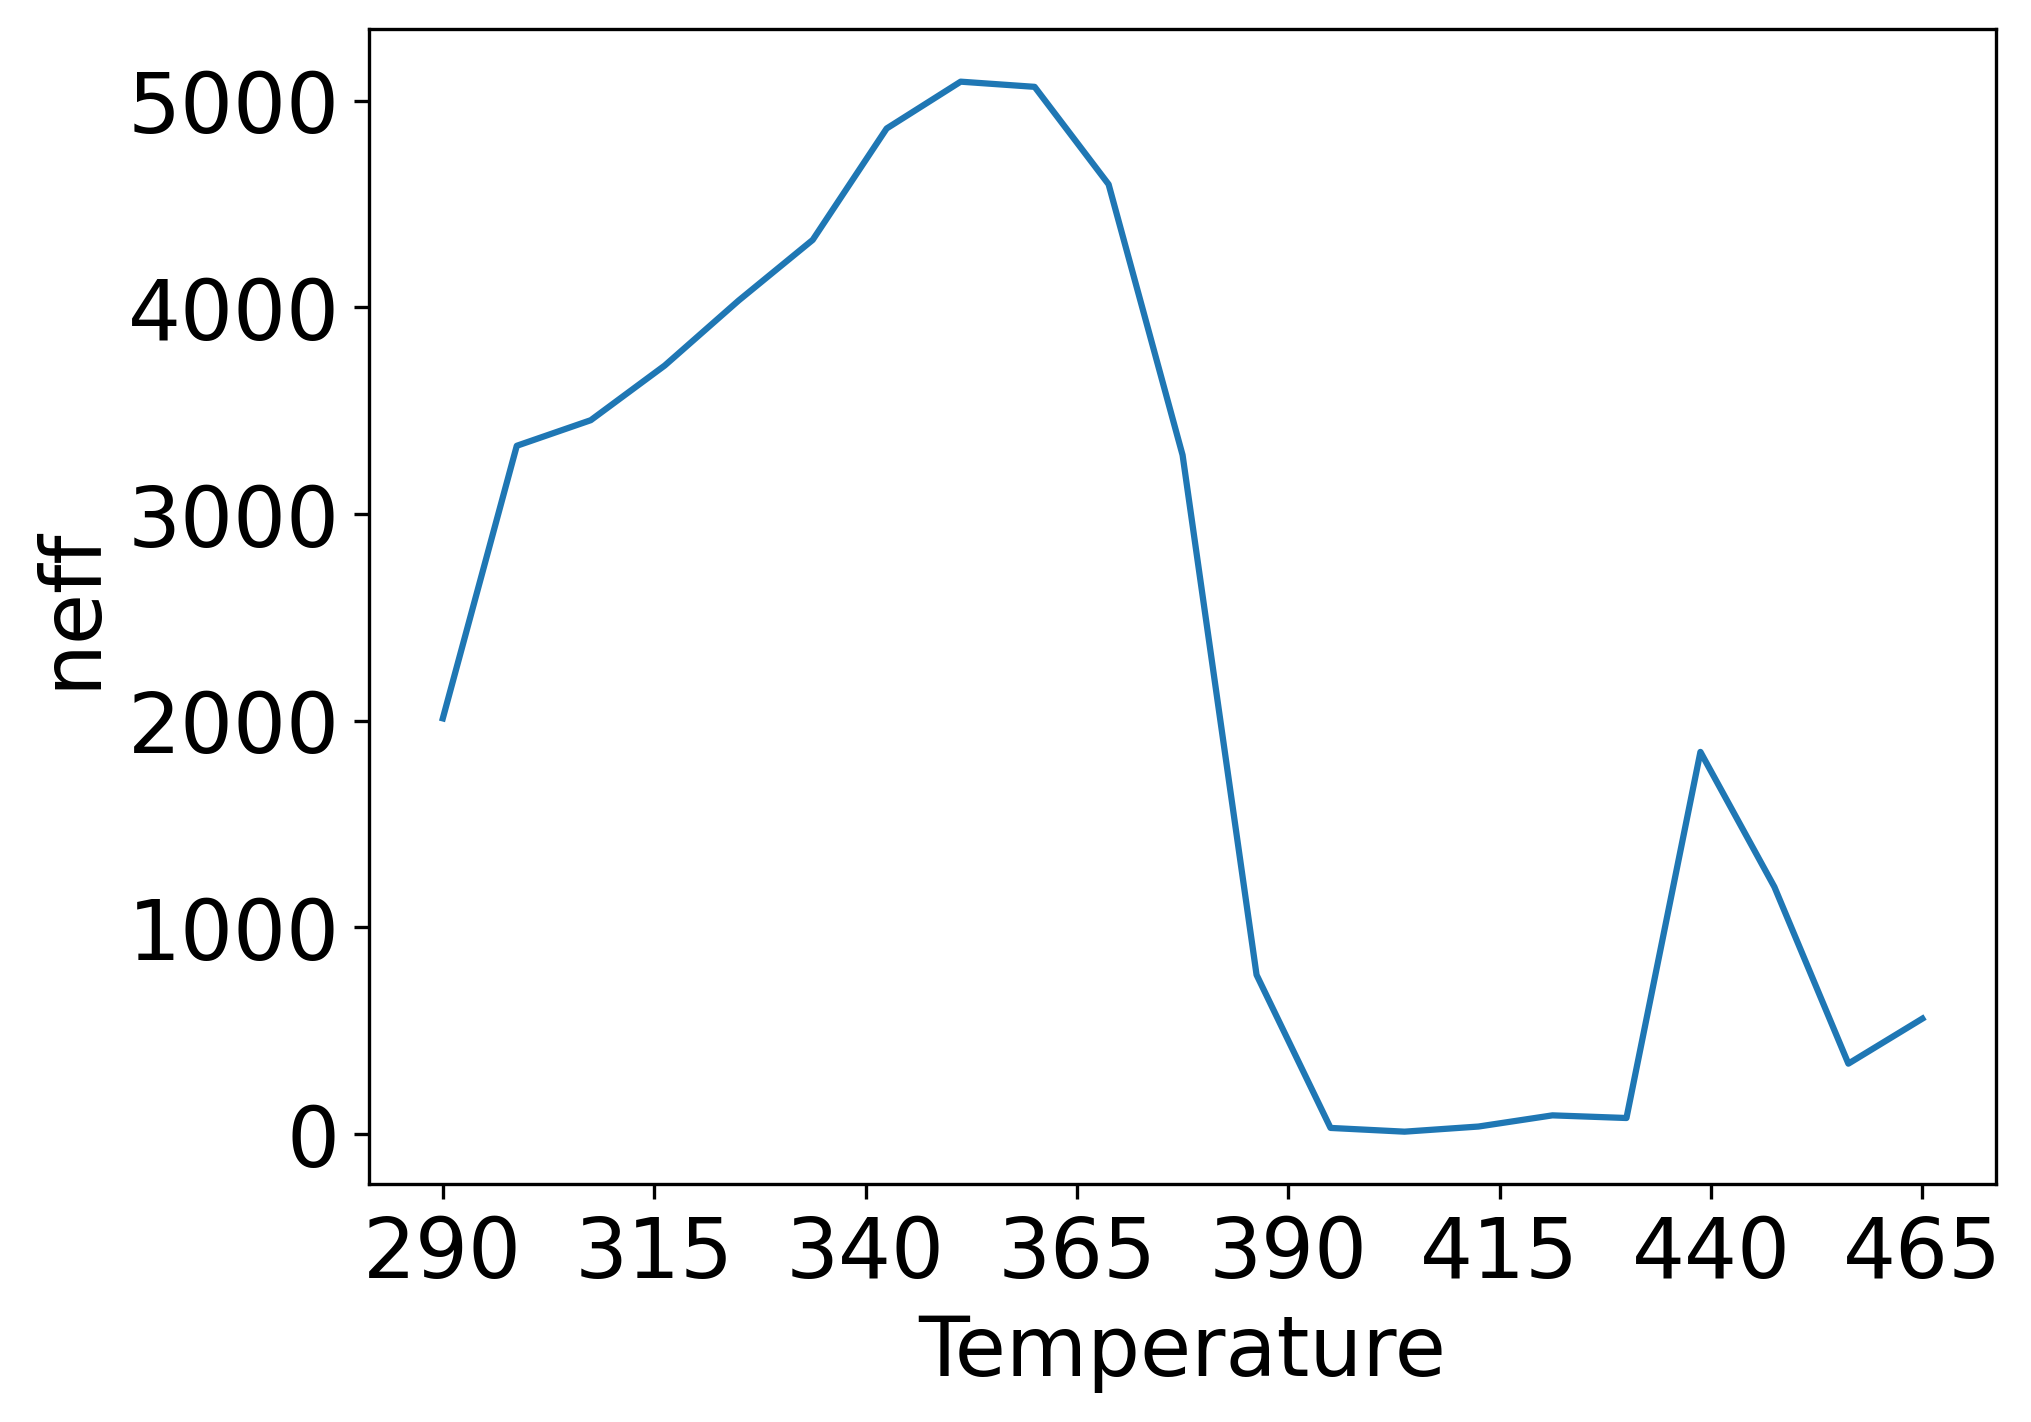

In [16]:
plt.plot(temps,neff)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("neff",fontsize=20)
plt.xticks(np.arange(min(temps), max(temps)+25, 25))
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

# ESS for T=300

In [15]:
# ESS for T=300
temperature=377.5 # K
kb=0.00831446 # kJ/mol/K
beta=1./(kb*temperature)
newTemperature= 300
newBeta=1./(kb*newTemperature)
#calculate weights at a given temperature (wrt to the simulation temperature)
logweights=beta*bias_10+(beta-newBeta)*energy_10 #why does log weights only consider energy? Just because energy is the thing that determines T?
logweights -= np.amax(logweights)
weights=np.exp(logweights)
neff=np.power(np.sum(weights),2)/np.sum(np.power(weights,2))
print(neff)

3403.428178854506


# Delta_G

/tmp/ipykernel_887915/2402008179.py:37: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
/tmp/ipykernel_887915/2402008179.py:60: RuntimeWarning: invalid value encountered in double_scalars
  delta_G = -(kb*newTemperature)*np.log((F_FE_sum)/(U_FE_sum))
/tmp/ipykernel_887915/2402008179.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  delta_G = -(kb*newTemperature)*np.log((F_FE_sum)/(U_FE_sum))


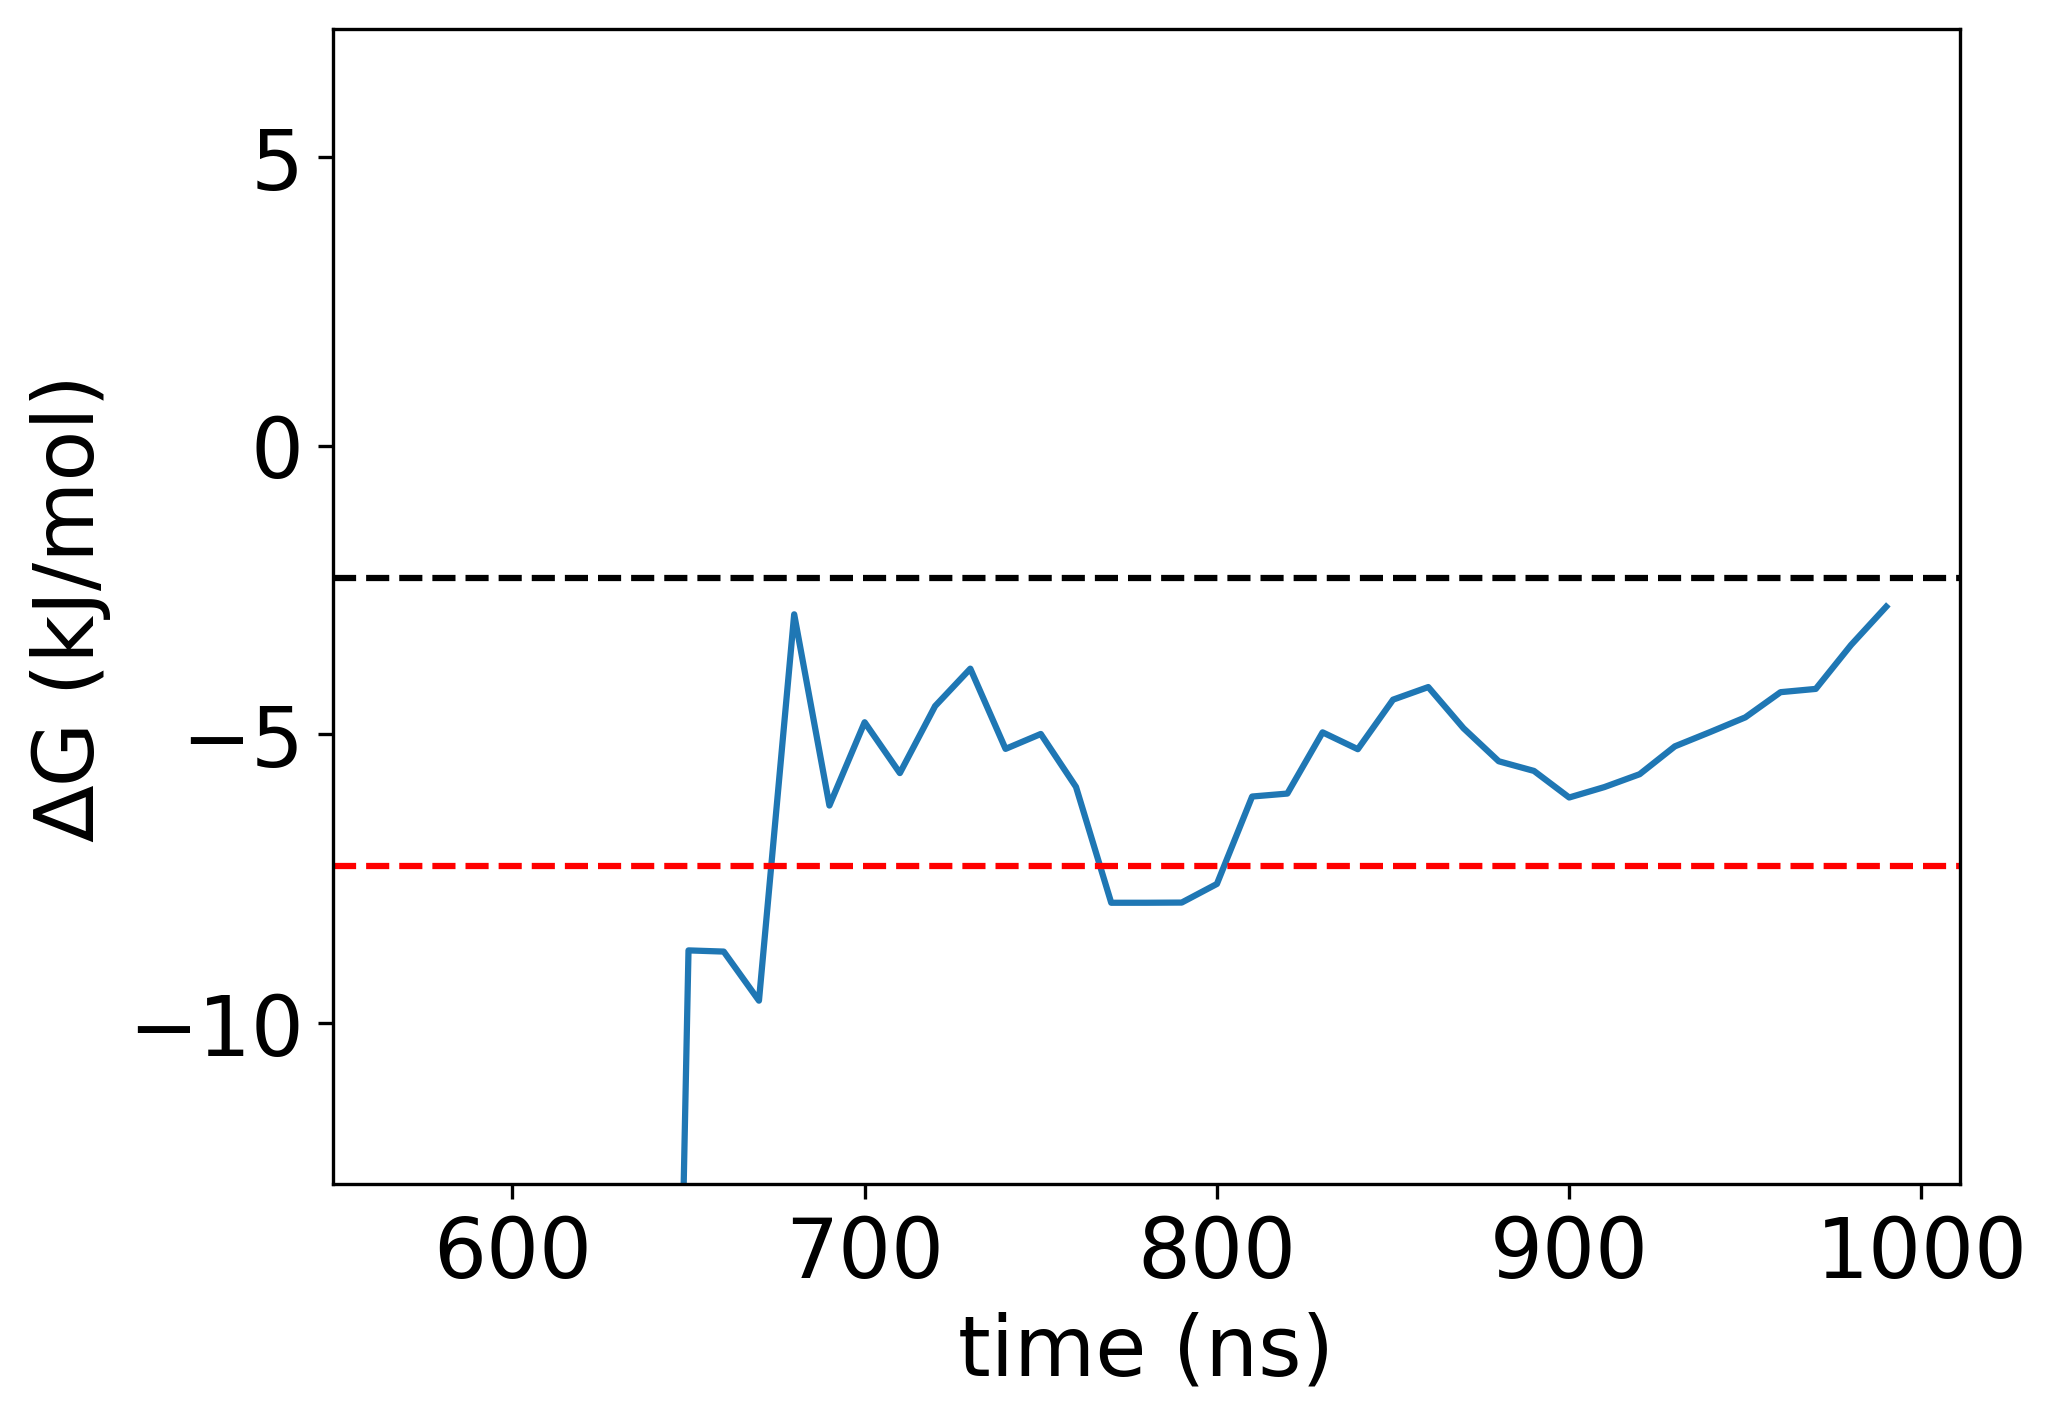

In [21]:
from scipy.ndimage import gaussian_filter
all_delta_G=[]

times=time_10.reshape((8,75001)) #divided the time into 8 pieces
cmaps=cmap_10.reshape((8,75001)) #divided the cmap into 8 pieces
rmsds=rmsd_10.reshape((8,75001))
energies=energy_10.reshape((8,75001))
biases=bias_10.reshape((8,75001))

for ignore2 in range (1,75001,1000):
 
    cmap = cmaps[0,:ignore2]
    rmsd = rmsds[0,:ignore2]
    energy = energies[0,:ignore2]
    bias = biases[0,:ignore2]
    
    for k in range(1,8):
#        time.append(times[k,:ignore2])
        cmap = np.concatenate((cmap,cmaps[k,:ignore2]))
        rmsd = np.concatenate((rmsd,rmsds[k,:ignore2]))
        energy = np.concatenate((energy,energies[k,:ignore2]))
        bias = np.concatenate((bias,biases[k,:ignore2]))
    
    
                    
    kb=0.00831446 # kJ/mol/K
    temperature=377.5 # K
    beta=1./(kb*temperature)
    newTemperature=300 # K
    newBeta=1./(kb*newTemperature)
    logweights=beta*bias+(beta-newBeta)*energy
    logweights -= np.amax(logweights)
    weights = np.exp(logweights)
    
    H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1)
    X1, Y1 = np.meshgrid(xedges1, yedges1)
    x = (X1[1:,1:]+X1[:-1,:-1])/2.
    y = (Y1[1:,1:]+Y1[:-1,:-1])/2.
    
    U_FE_sum = 0
    F_FE_sum = 0
    U_n =0
    F_n =0
    for j in range (120):
        for i in range (120):
            if x[j][i] < 0.11:
             #   print (i,j)
                if (y[j][0] > 0.6) and (y[j][0] < 0.8):
                    U_FE_sum += np.exp(-H1[j][i]/(kb*newTemperature))
                    U_n +=1
                   # print (x[j][i], y[j][i], H1[i][j])

            if x[j][i] > 0.9:
                if y[j][0] < 0.2:
                    F_FE_sum+= np.exp(-H1[j][i]/(kb*newTemperature))
                    F_n +=1
    delta_G = -(kb*newTemperature)*np.log((F_FE_sum)/(U_FE_sum))
    all_delta_G.append(delta_G)



mkt = np.average(all_delta_G[60:])-kb*newTemperature # minus kt
pkt = np.average(all_delta_G[60:])+kb*newTemperature # plus kt

fig, ax = plt.subplots()
ax.set_ylim(all_delta_G[-1]-10,all_delta_G[-1]+10)

ax.plot(times[0,1::1000]/1000,all_delta_G)


a=ax
a.axhline(y=mkt, color="red", linestyle="--")
a.axhline(y=pkt, color="black", linestyle="--")
a.set_xlabel("time (ns)",fontsize=20)
a.set_ylabel("∆G (kJ/mol)",fontsize=20)
a.tick_params(axis='x', labelsize=20)
a.tick_params(axis='y', labelsize=20)

    

/tmp/ipykernel_3210401/1284360825.py:37: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
/tmp/ipykernel_3210401/1284360825.py:60: RuntimeWarning: invalid value encountered in double_scalars
  delta_G = -(kb*newTemperature)*np.log((F_FE_sum)/(U_FE_sum))
/tmp/ipykernel_3210401/1284360825.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  delta_G = -(kb*newTemperature)*np.log((F_FE_sum)/(U_FE_sum))


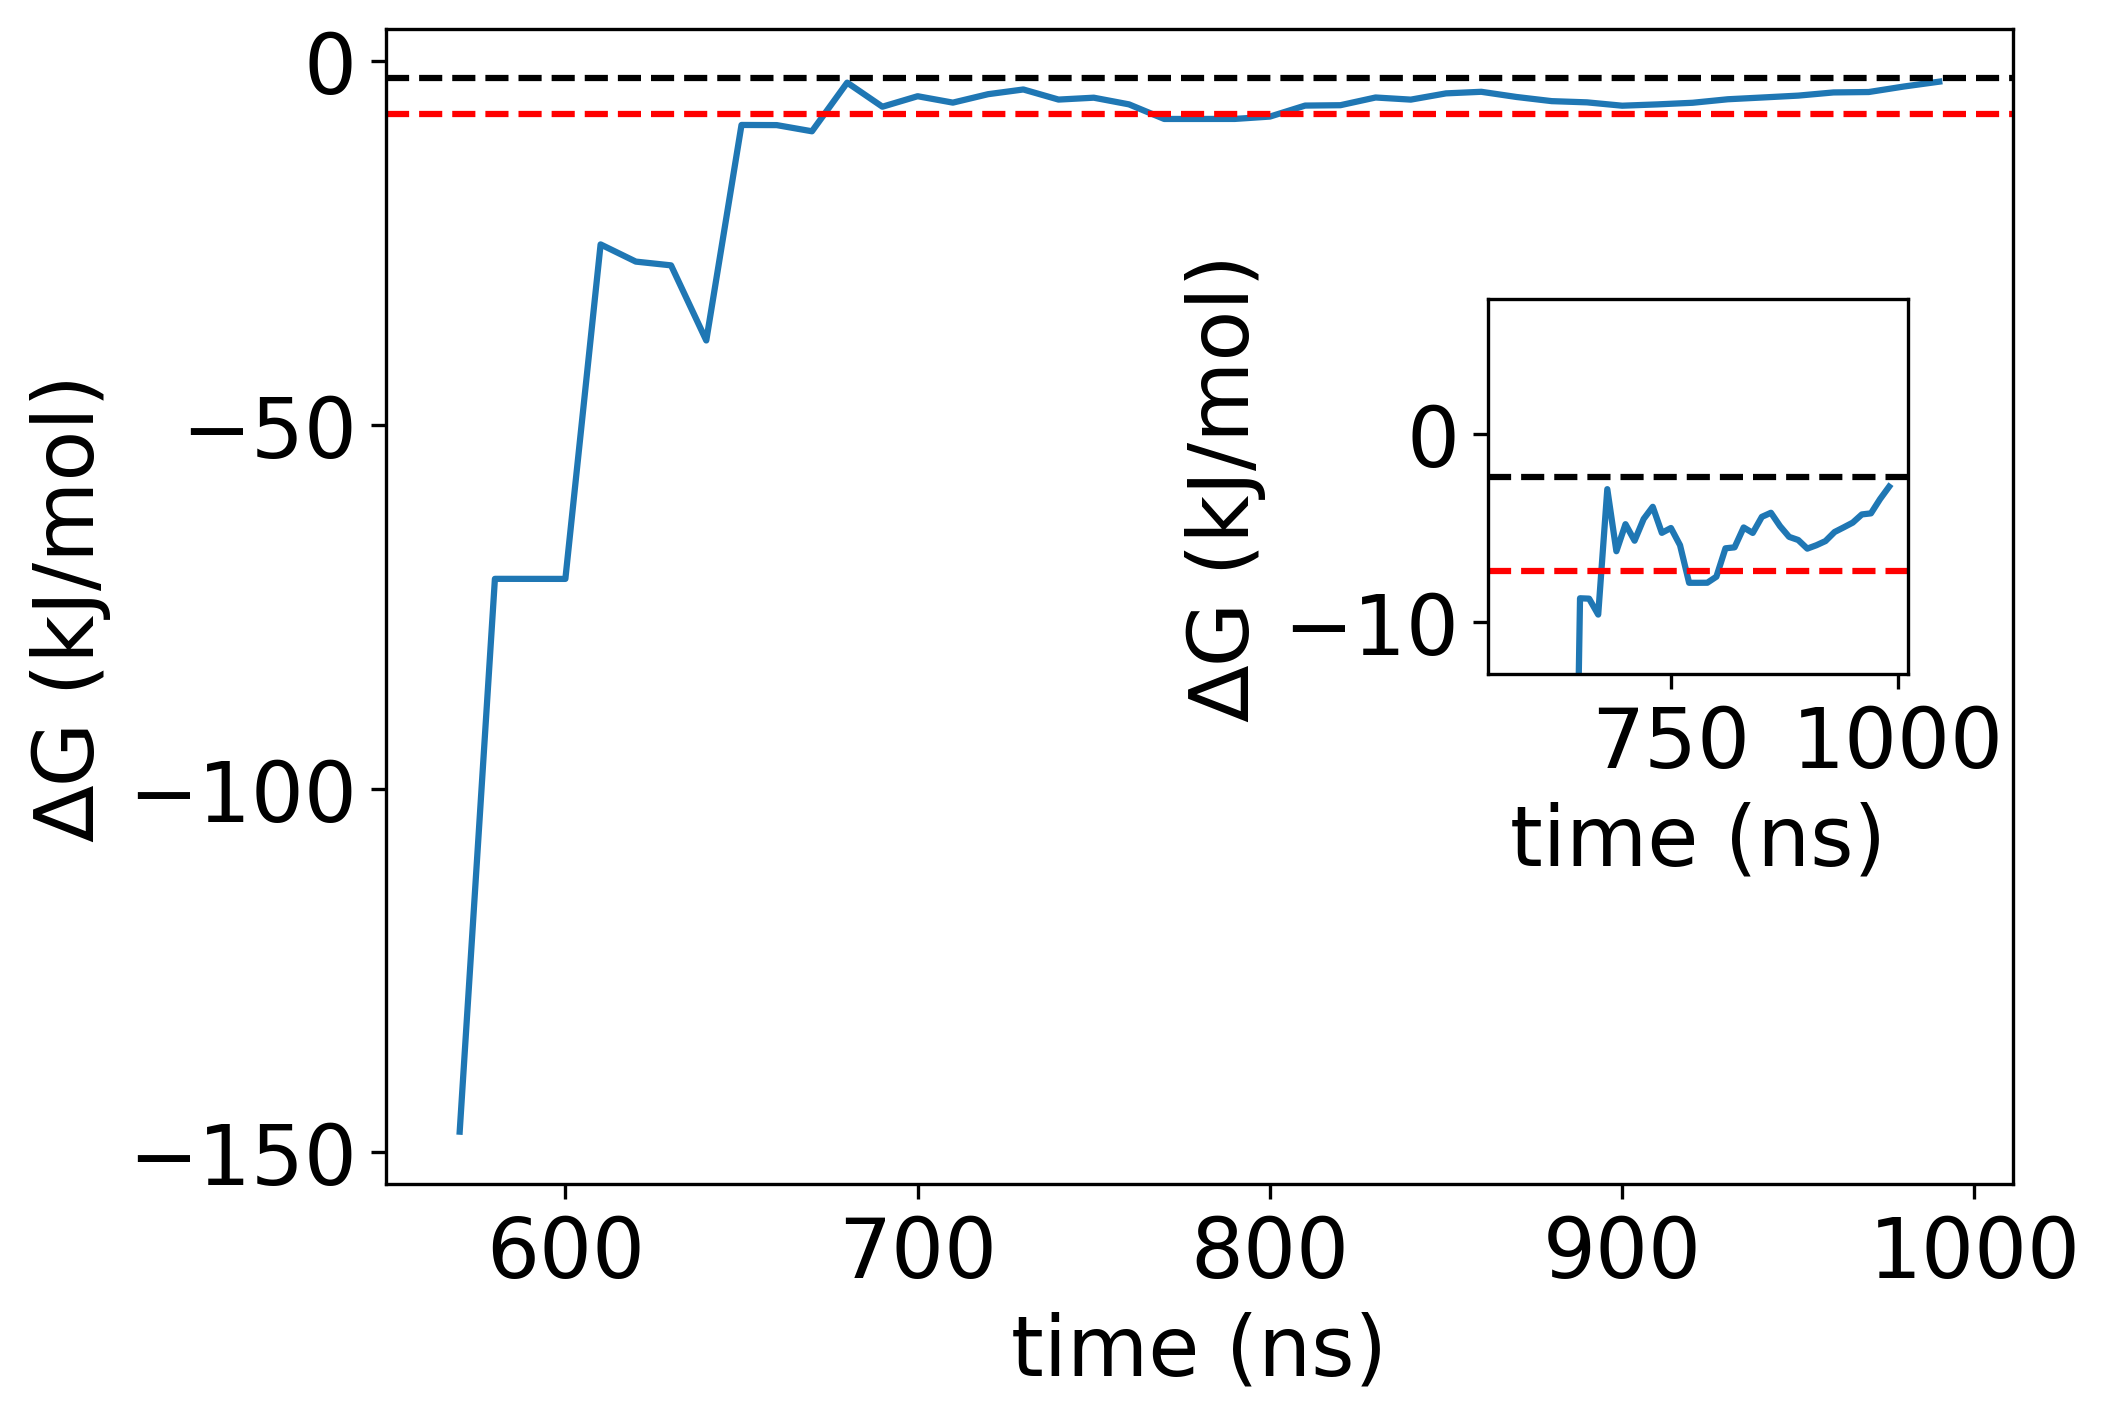

In [40]:
from scipy.ndimage import gaussian_filter
all_delta_G=[]

times=time_10.reshape((8,75001)) #divided the time into 8 pieces
cmaps=cmap_10.reshape((8,75001)) #divided the cmap into 8 pieces
rmsds=rmsd_10.reshape((8,75001))
energies=energy_10.reshape((8,75001))
biases=bias_10.reshape((8,75001))

for ignore2 in range (1,75001,1000):
 
    cmap = cmaps[0,:ignore2]
    rmsd = rmsds[0,:ignore2]
    energy = energies[0,:ignore2]
    bias = biases[0,:ignore2]
    
    for k in range(1,8):
#        time.append(times[k,:ignore2])
        cmap = np.concatenate((cmap,cmaps[k,:ignore2]))
        rmsd = np.concatenate((rmsd,rmsds[k,:ignore2]))
        energy = np.concatenate((energy,energies[k,:ignore2]))
        bias = np.concatenate((bias,biases[k,:ignore2]))
    
    
                    
    kb=0.00831446 # kJ/mol/K
    temperature=377.5 # K
    beta=1./(kb*temperature)
    newTemperature=300 # K
    newBeta=1./(kb*newTemperature)
    logweights=beta*bias+(beta-newBeta)*energy
    logweights -= np.amax(logweights)
    weights = np.exp(logweights)
    
    H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1)
    X1, Y1 = np.meshgrid(xedges1, yedges1)
    x = (X1[1:,1:]+X1[:-1,:-1])/2.
    y = (Y1[1:,1:]+Y1[:-1,:-1])/2.
    
    U_FE_sum = 0
    F_FE_sum = 0
    U_n =0
    F_n =0
    for j in range (120):
        for i in range (120):
            if x[j][i] < 0.11:
             #   print (i,j)
                if (y[j][0] > 0.6) and (y[j][0] < 0.8):
                    U_FE_sum += np.exp(-H1[j][i]/(kb*newTemperature))
                    U_n +=1
                   # print (x[j][i], y[j][i], H1[i][j])

            if x[j][i] > 0.9:
                if y[j][0] < 0.2:
                    F_FE_sum+= np.exp(-H1[j][i]/(kb*newTemperature))
                    F_n +=1
    delta_G = -(kb*newTemperature)*np.log((F_FE_sum)/(U_FE_sum))
    all_delta_G.append(delta_G)



mkt = np.average(all_delta_G[60:])-kb*newTemperature # minus kt
pkt = np.average(all_delta_G[60:])+kb*newTemperature # plus kt

#creating subplot

fig, ax = plt.subplots()
left, bottom, width, height = [.65, 0.45, 0.2, 0.25]
ax_new = fig.add_axes([left, bottom, width, height])

ax_new.set_ylim(all_delta_G[-1]-10,all_delta_G[-1]+10)

ax.plot(times[0,1::1000]/1000,all_delta_G)

ax_new.plot(times[0,1::1000]/1000,all_delta_G)

for a in ax, ax_new:
    a.axhline(y=mkt, color="red", linestyle="--")
    a.axhline(y=pkt, color="black", linestyle="--")
    a.set_xlabel("time (ns)",fontsize=20)
    a.set_ylabel("∆G (kJ/mol)",fontsize=20)
    a.tick_params(axis='x', labelsize=20)
    a.tick_params(axis='y', labelsize=20)

plt.show()

In [20]:
len(all_delta_G)

100

# Potential Energy

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


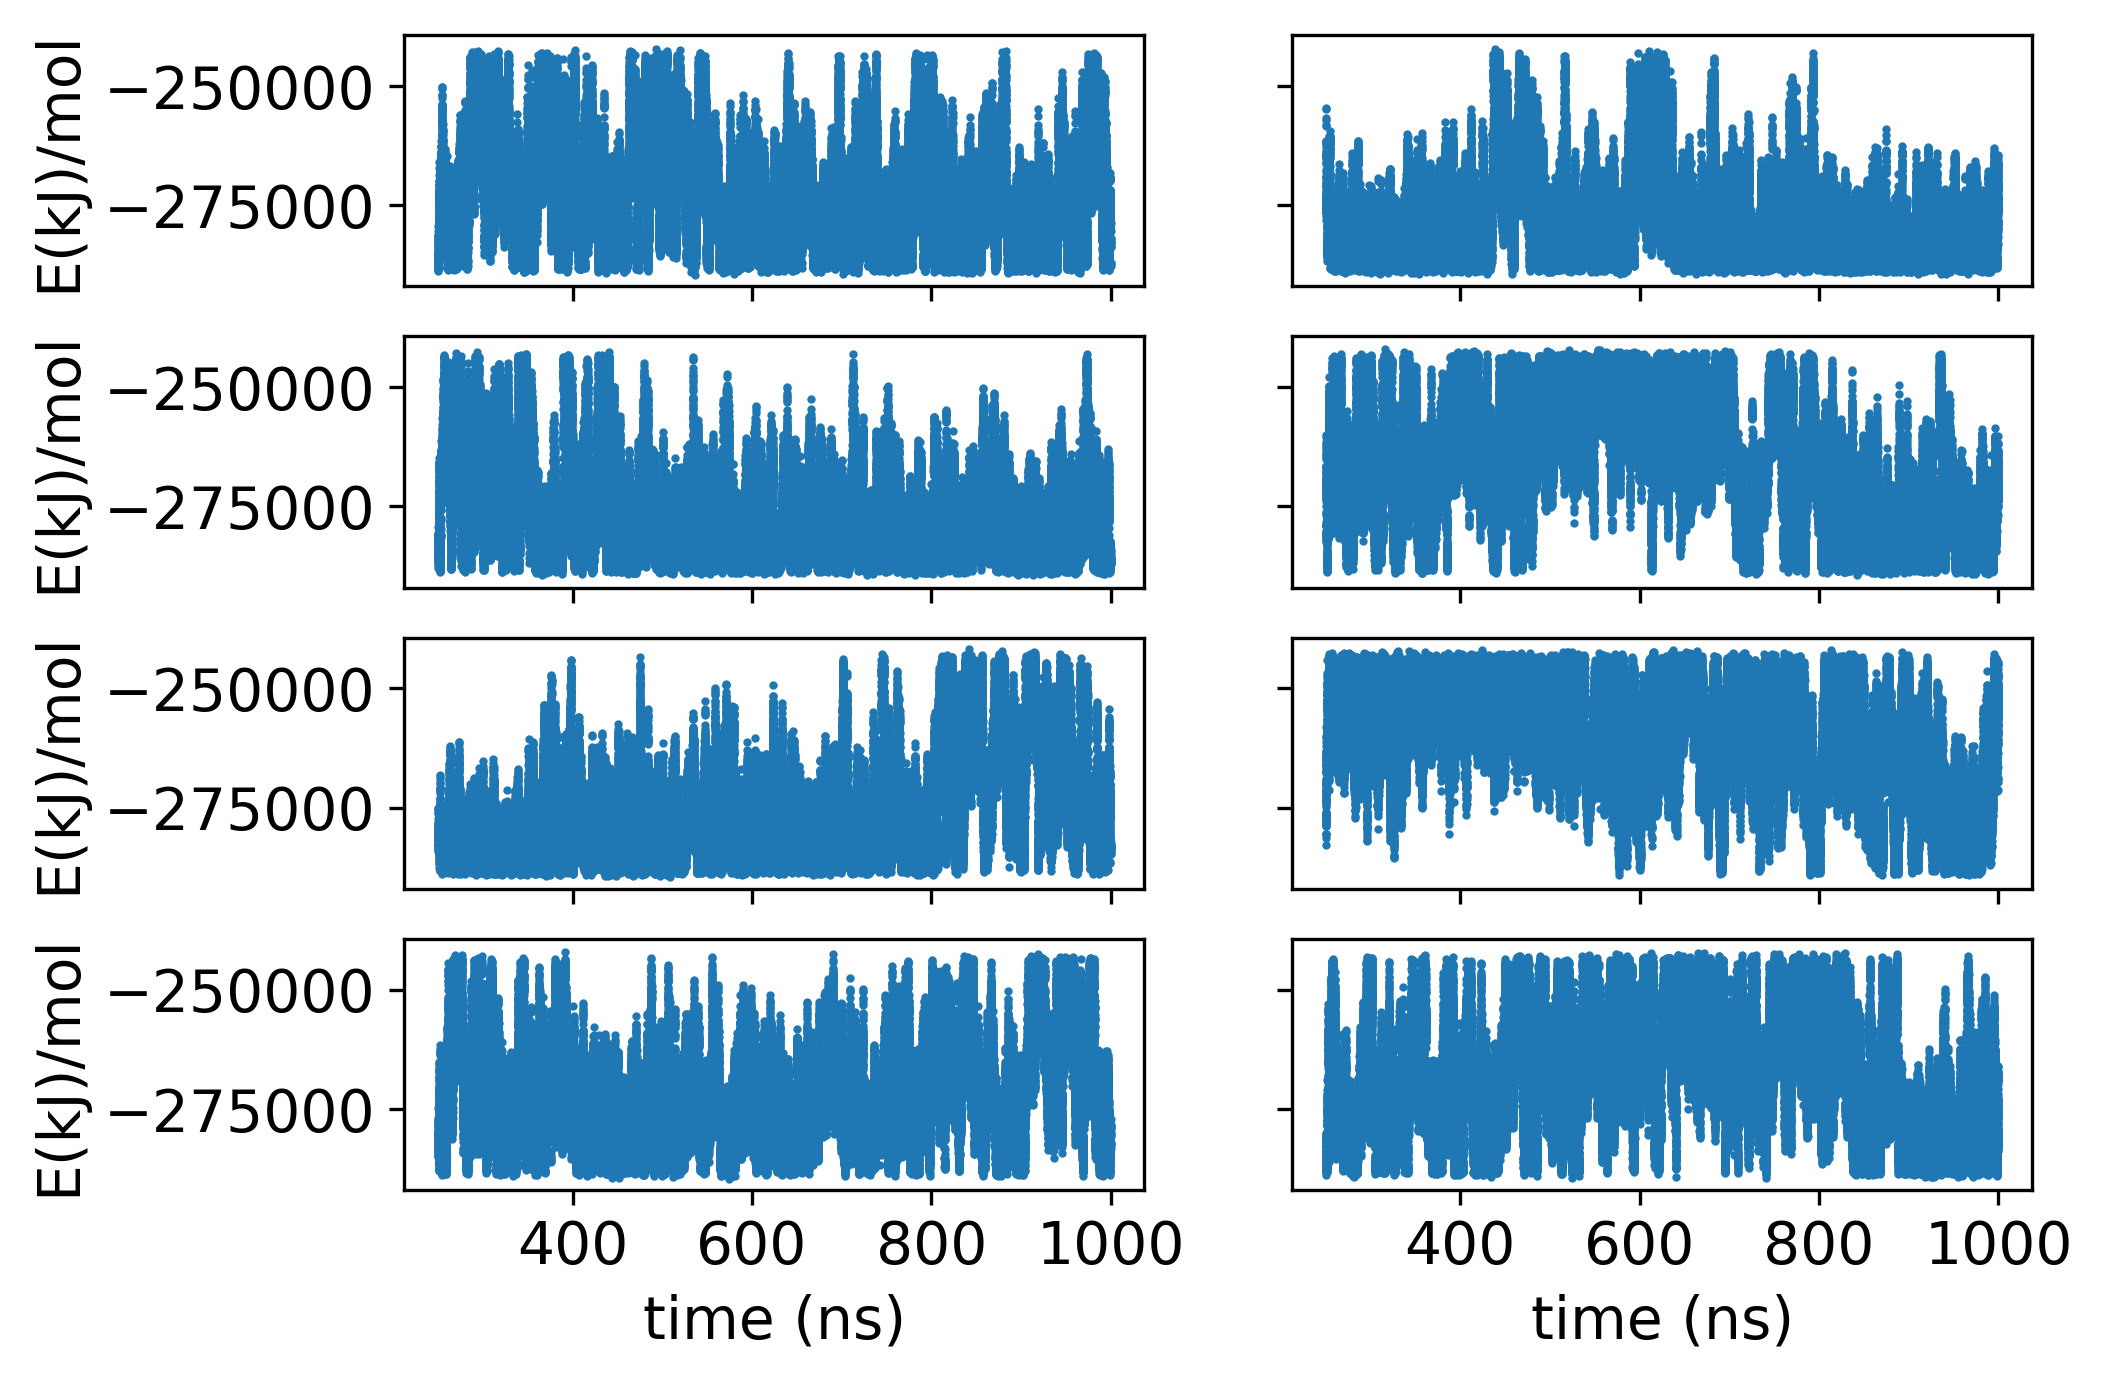

In [22]:
fig, axs = plt.subplots(4,2,sharex=True,sharey=True)
times=time_10.reshape((8,75001)) #divided the time into 8 pieces
energies=energy_10.reshape((8,75001)) #divided the cmap into 8 pieces
#print (times[1])

counter=0
for i in range(4):
    for j in range(2):
        axs[i,j].plot(times[counter]/1000,energies[counter],'o',markersize=1)
        counter = counter +1
        
plt.setp(axs[-1, :], xlabel='time (ns)')
plt.setp(axs[:, 0], ylabel='E (kJ)/mol')
for i in range(2):
    axs[-1,i].set_xlabel('time (ns)', fontsize = 14.0) # X label
    axs[-1,i].tick_params(axis='x', labelsize=14)
for i in range(4):
    axs[i,0].set_ylabel('E(kJ)/mol', fontsize = 14.0) # Y label
    axs[i,0].tick_params(axis='y', labelsize=14)

In [9]:
len(energies)

8

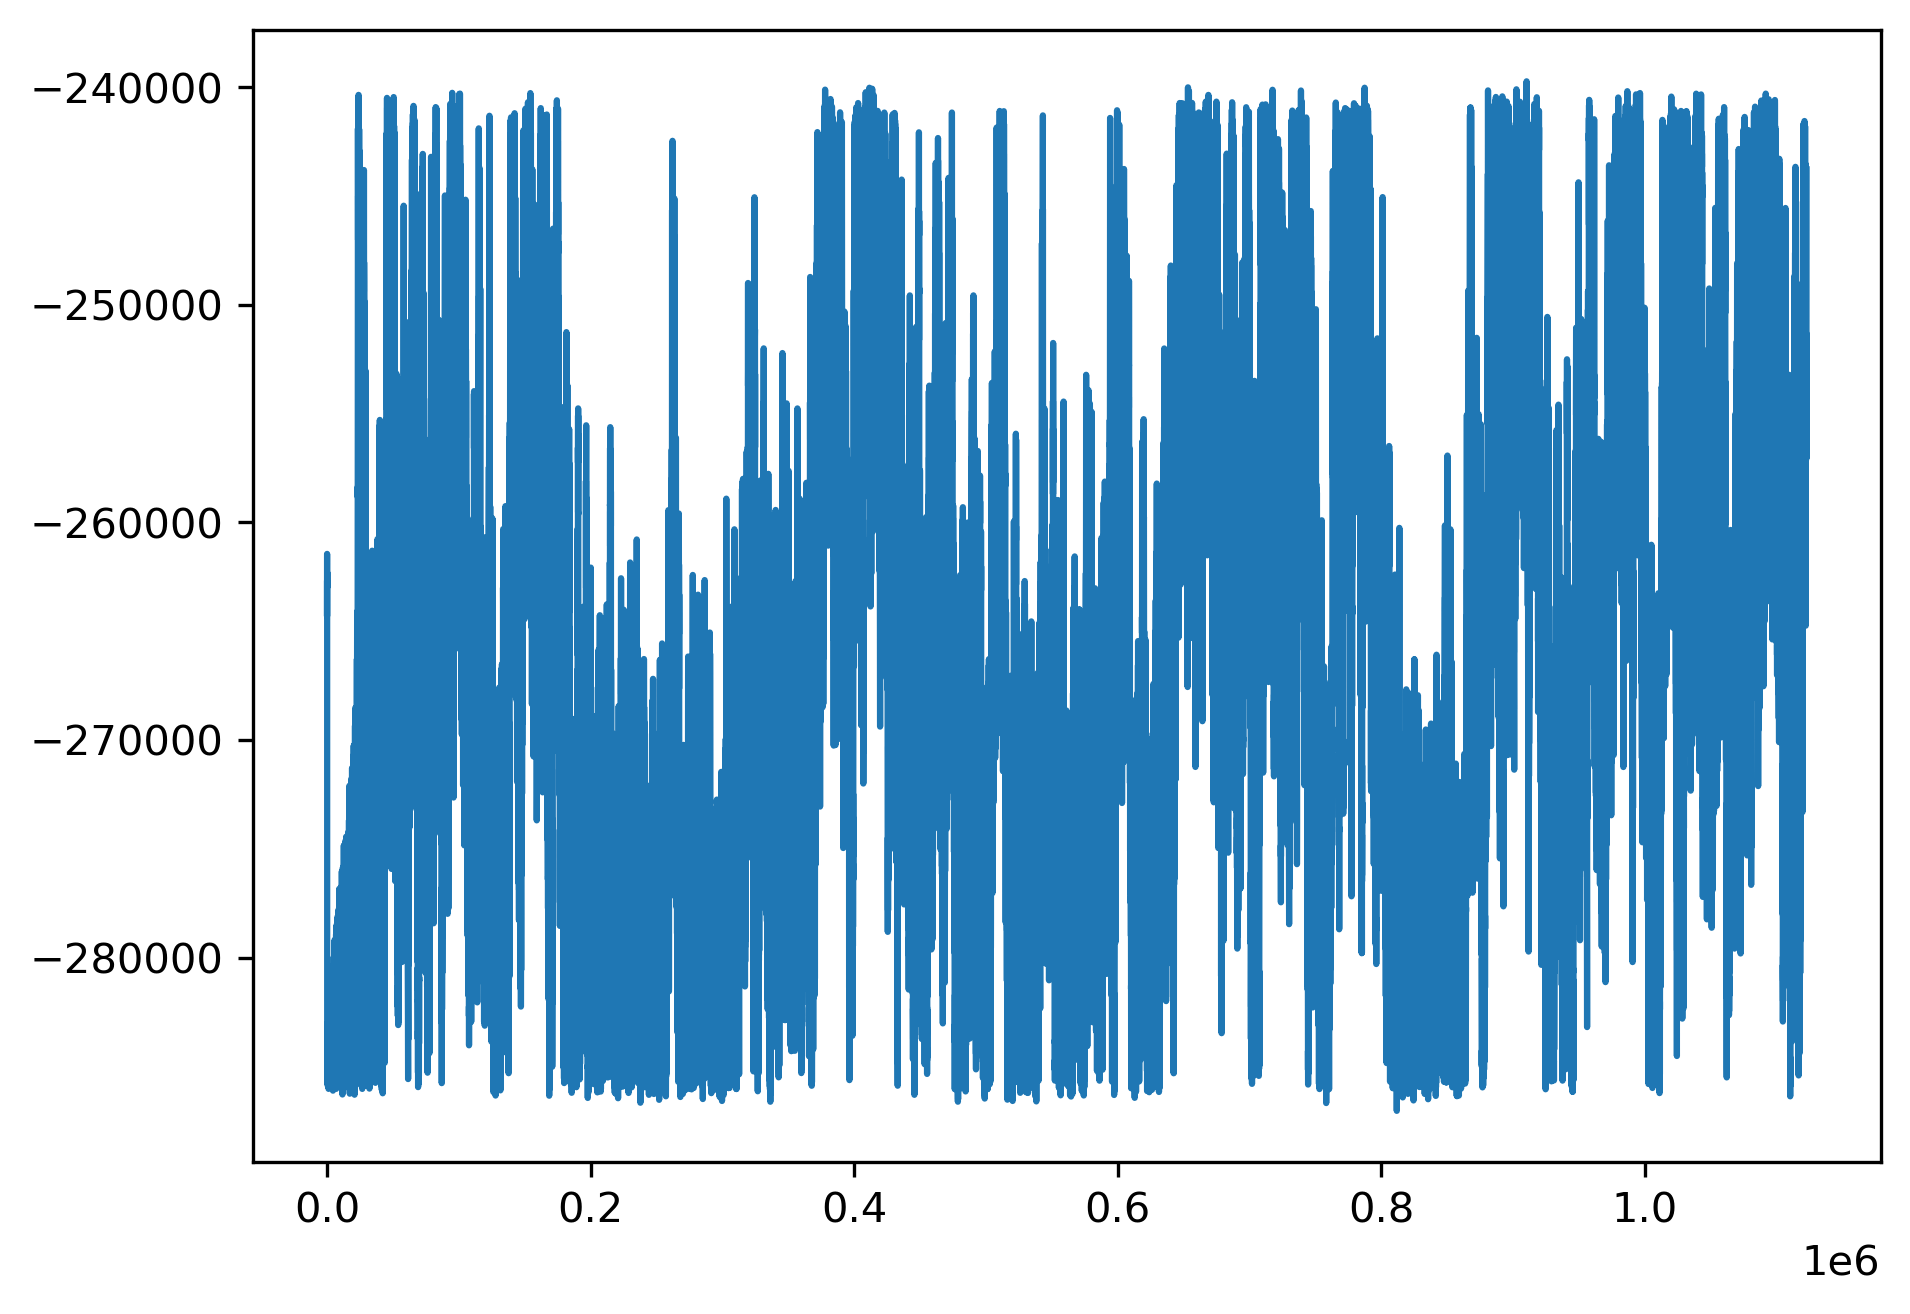

In [10]:
plt.plot(times[0],energies[0])

# FES for WTM with OPES range


In [11]:
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")

In [12]:
ignore=25000
time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])
time0 = np.copy(data[ignore:,0])


In [15]:
time[-1]

1000000.0

In [4]:
len(time)

NameError: name 'time' is not defined

/tmp/ipykernel_1600399/3214432440.py:14: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


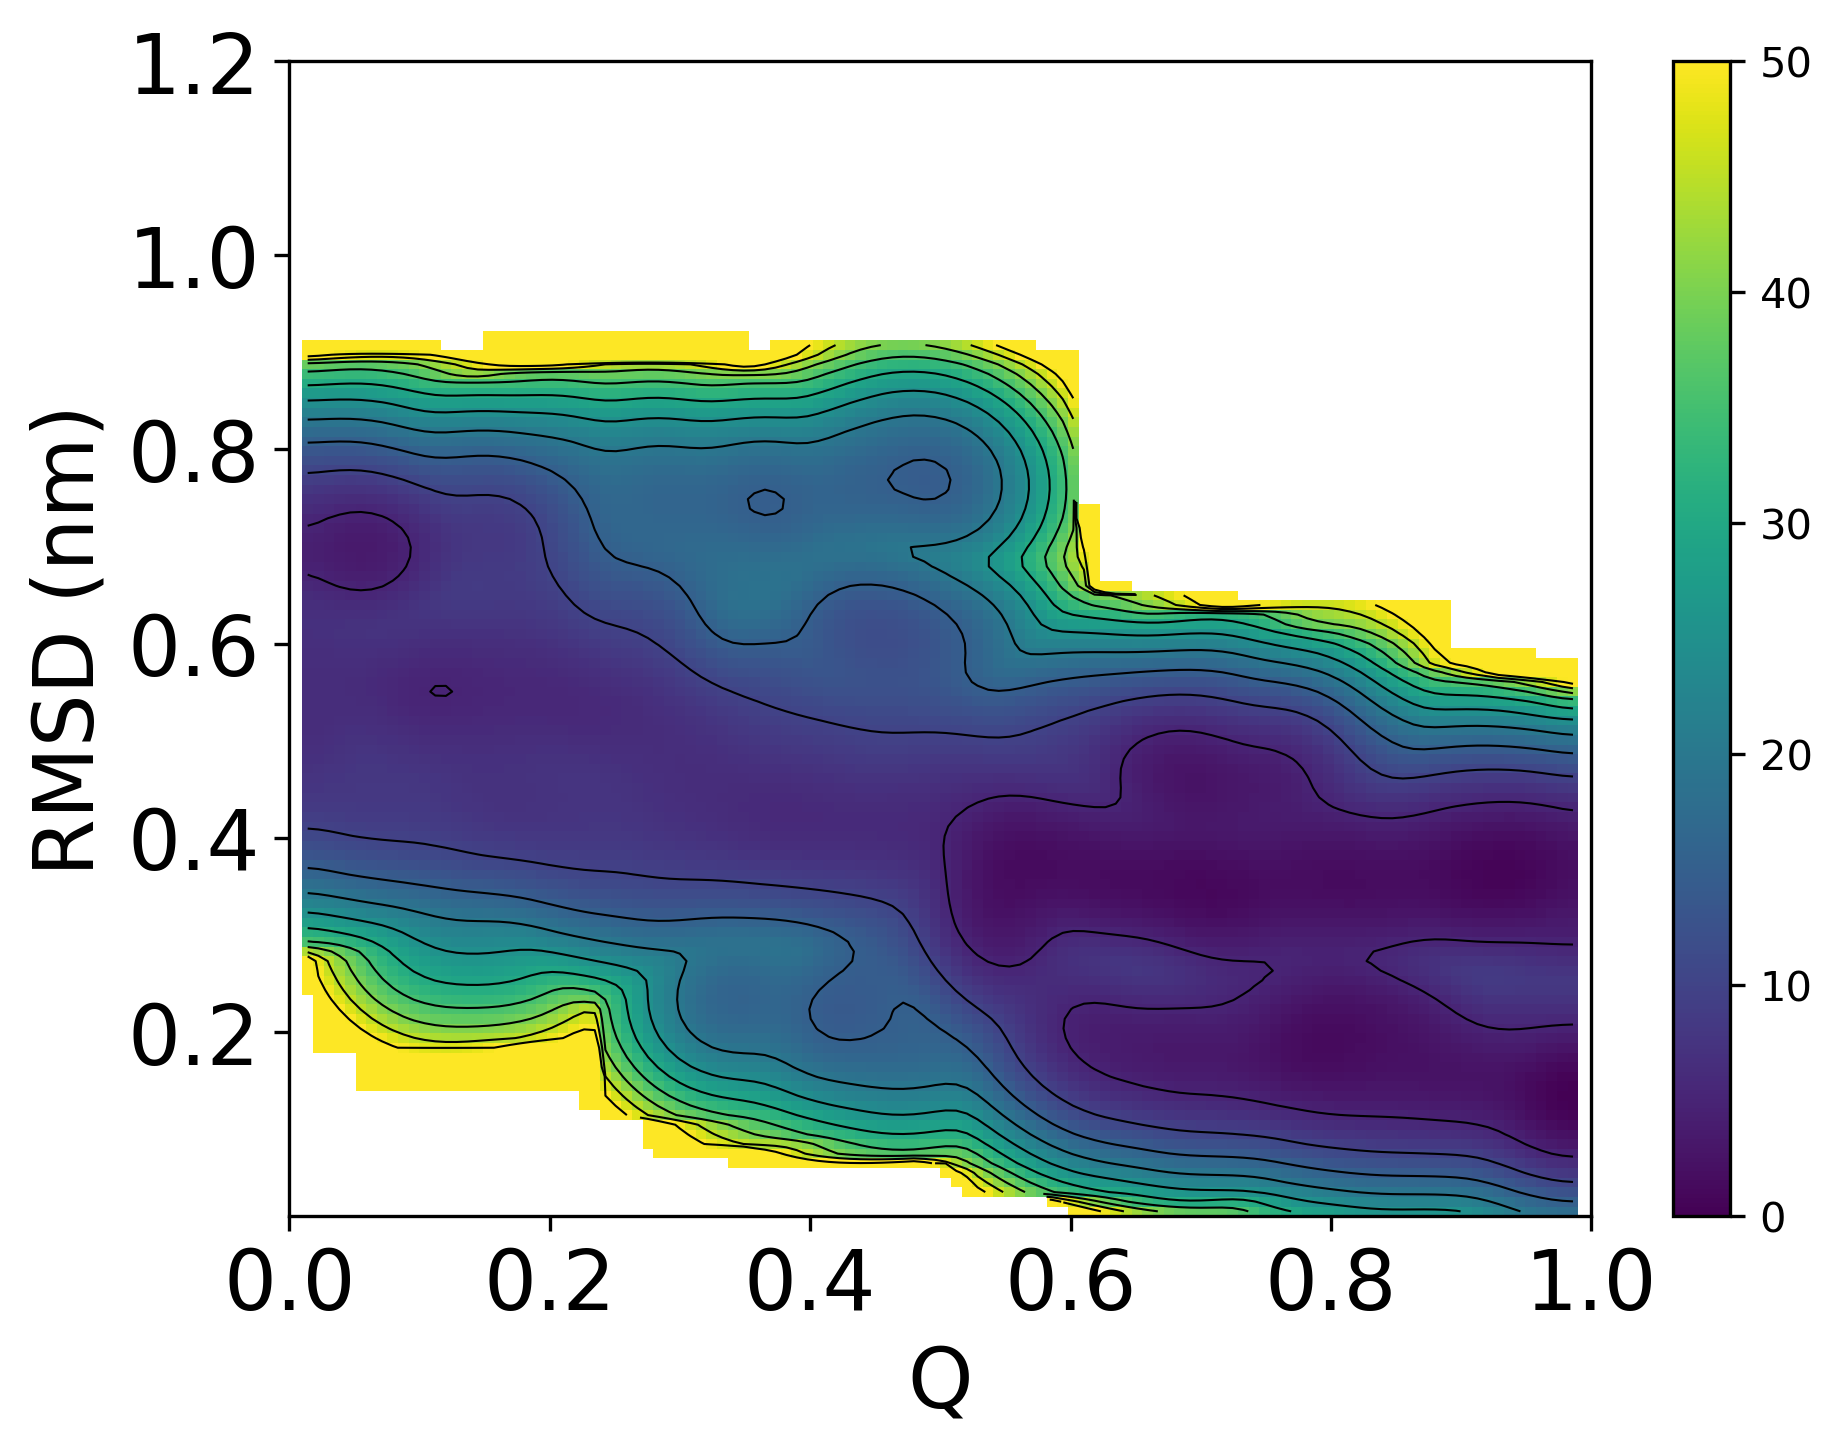

In [14]:
# Cutting 500 ns for equilibration

from scipy.ndimage import gaussian_filter

temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights = beta*bias
logweights -= np.amax(logweights)
weights = np.exp(logweights)


H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H1 = H1.T
H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
H1 -= np.amin(H1) 
X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, H1, vmin=0,vmax=50)
plt.colorbar()
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.

plt.contour(x,y, H1 ,np.arange(0,55,5),colors='black',linewidths=0.5)

plt.xlim([0,1])
plt.ylim([0.01,1.2])

plt.xlabel("Q", fontsize=20)
plt.ylabel("RMSD (nm)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.show()

# ESS for PTWTE-WTM at 300 K

In [20]:
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")
ignore=25000
time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])

temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights = beta*bias
logweights -= np.amax(logweights)
weights = np.exp(logweights)

neff=np.power(np.sum(weights),2)/np.sum(np.power(weights,2))
print (neff,len(bias), neff/len(bias)*100)

215.72818279801993 25000 0.8629127311920797


In [16]:
print (neff,len(bias), neff/len(bias)*100)

215.72818279801993 25000 0.8629127311920797


/tmp/ipykernel_529059/2288809843.py:23: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))


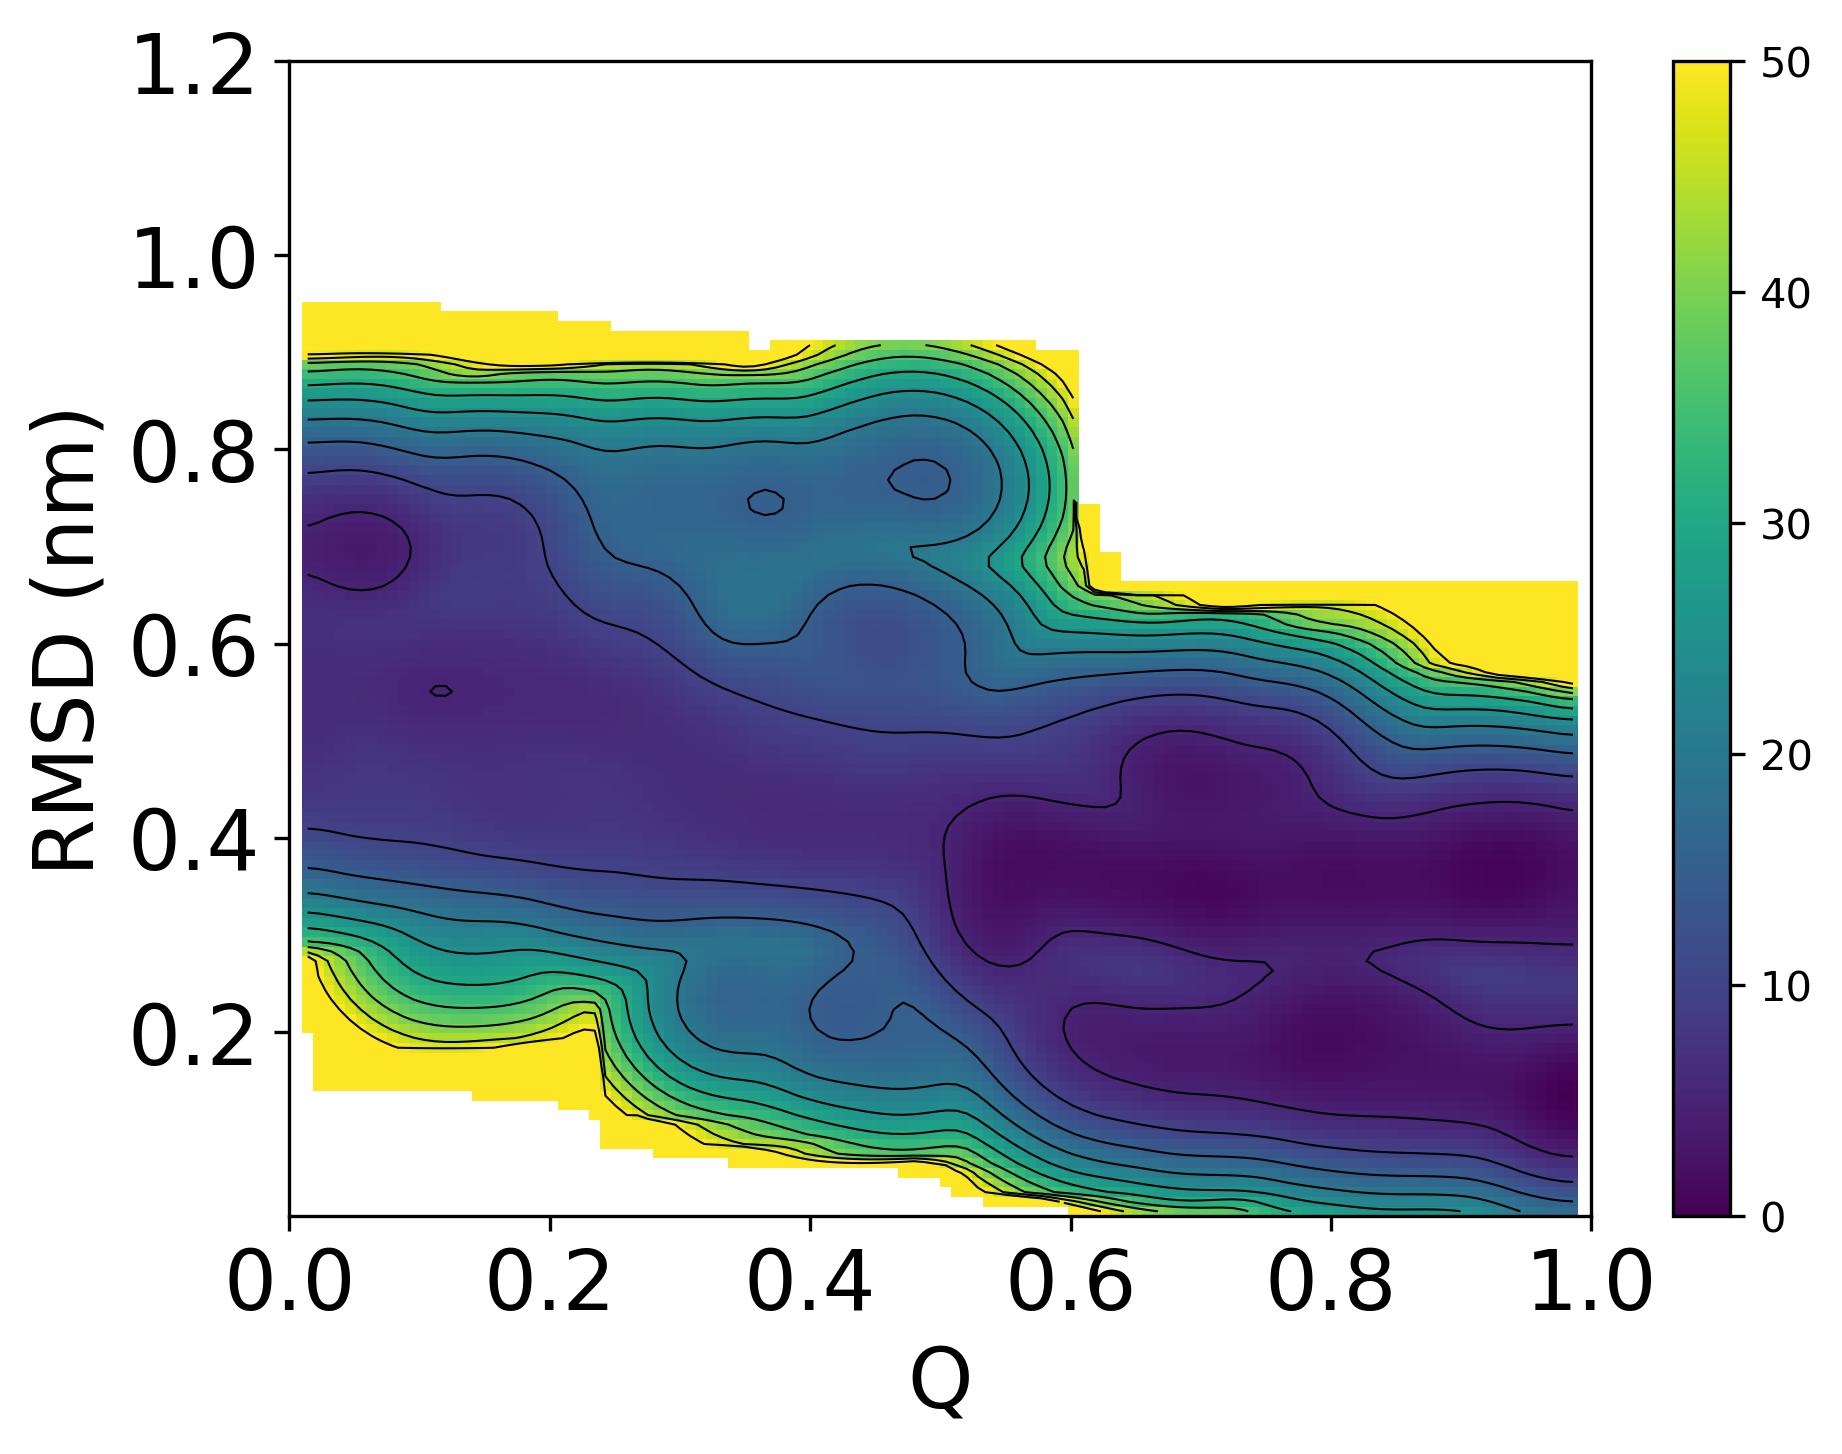

In [16]:
# cutting 0 ns for equilibration

ignore=0
time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])
time0 = np.copy(data[ignore:,0])


from scipy.ndimage import gaussian_filter

temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights = beta*bias
logweights -= np.amax(logweights)
weights = np.exp(logweights)


H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H1 = H1.T
H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
H1 -= np.amin(H1) 
X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, H1, vmin=0,vmax=50)
plt.colorbar()
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.

plt.contour(x,y, H1 ,np.arange(0,55,5),colors='black',linewidths=0.5)

plt.xlim([0,1])
plt.ylim([0.01,1.2])

plt.xlabel("Q", fontsize=20)
plt.ylabel("RMSD (nm)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.show()

In [19]:
time[49999]

1000000.0

In [18]:
len(time)

50000

# Delta F; F(OPES) -F (WTM)


/tmp/ipykernel_1793945/2544946377.py:12: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
/tmp/ipykernel_1793945/2544946377.py:29: RuntimeWarning: divide by zero encountered in log
  H1=-(1/newBeta)*np.log(gaussian_filter(H1, sigma=3))
/tmp/ipykernel_1793945/2544946377.py:33: RuntimeWarning: invalid value encountered in subtract
  DH = np.sqrt((H1-H2)**2)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


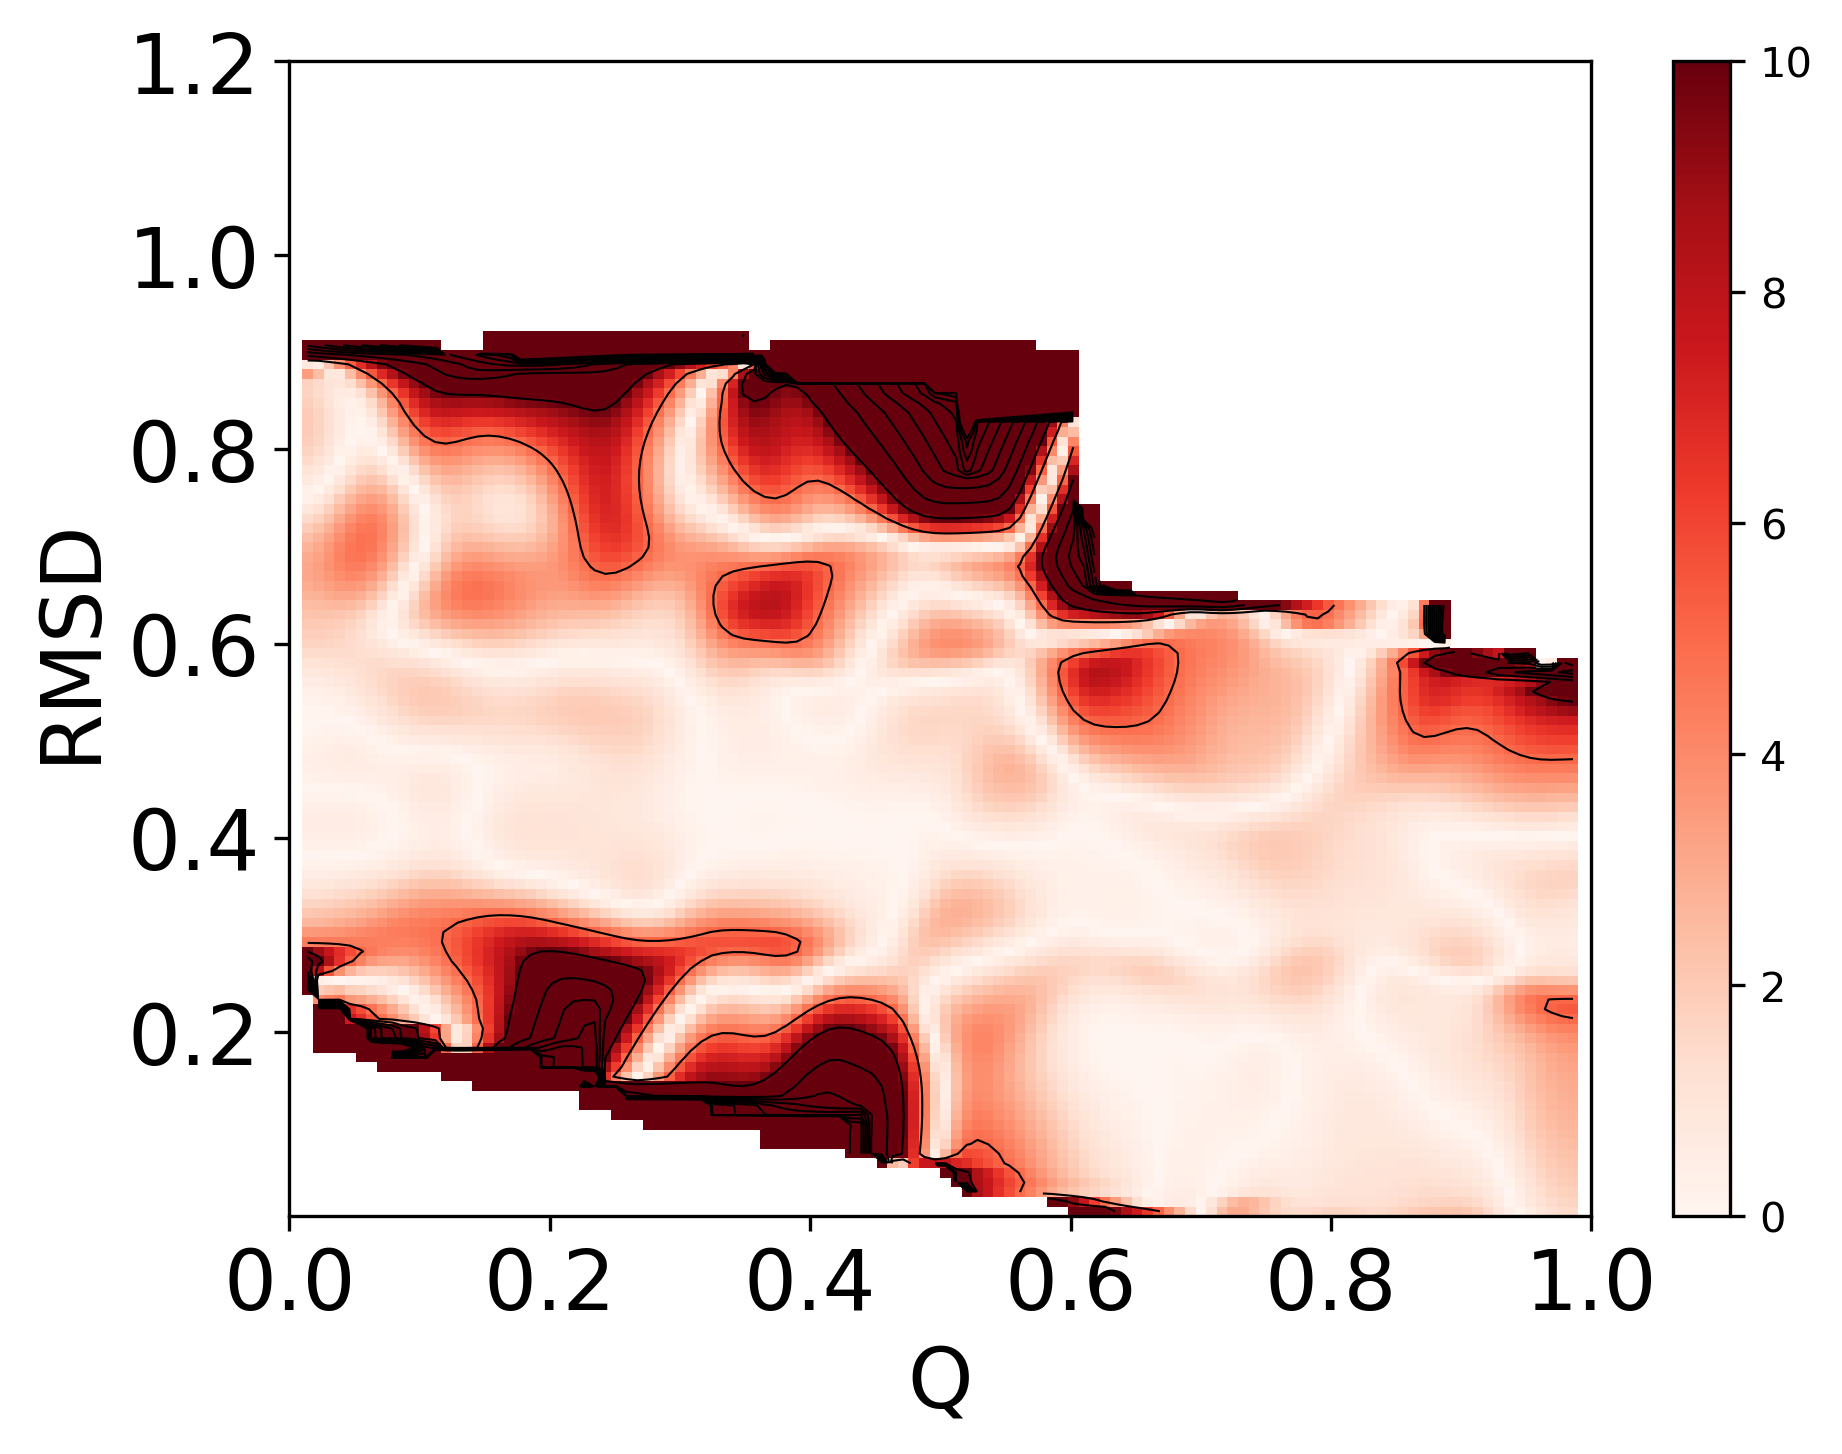

In [9]:
from scipy.ndimage import gaussian_filter

# WTM
temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H2, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H2 = H2.T
H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
H2 -= np.amin(H2) 


# OPES

kb=0.00831446 # kJ/mol/K
temperature=377.5 # K
beta=1./(kb*temperature)
newTemperature=300 # K
newBeta=1./(kb*newTemperature)
logweights=beta*bias_10+(beta-newBeta)*energy_10
logweights -= np.amax(logweights)
weights = np.exp(logweights)

H1, xedges1, yedges1 = np.histogram2d(cmap_10, rmsd_10, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H1 = H1.T
H1=-(1/newBeta)*np.log(gaussian_filter(H1, sigma=3))
H1 -= np.amin(H1) 

# Error
DH = np.sqrt((H1-H2)**2)

X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, DH, vmin=0,vmax=10, cmap="Reds")

plt.colorbar()
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.

plt.contour(x,y, DH ,np.arange(0,55,5),colors='black',linewidths=0.5)

plt.xlim([0,1])
plt.ylim([0.01,1.2])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Q",fontsize=20)
plt.ylabel("RMSD",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.show()

# Delta F_FU

In [12]:
def Delta_F(rmsd,cmap,logweights,temperature):
    """Calculate the free energy difference between to phases.

    Args:
        CV (numpy array): An array with the collective variable values
        bias (numpy array): An array with the bias values in kJ/mol
        temperature (float): The temperature in K
        CVlimit (float): Watershed between the two phases (CVunits)

    Returns:
        float: the free energy in kJ/mol
    """
    beta=1./(0.00831441001626*temperature) # 1/(kJ/mol)
    condition_F=np.logical_and(rmsd<0.2,cmap>0.9) # folded
    condition_U=np.logical_and(0.6<rmsd,rmsd<0.8,cmap<0.11) # unfolded
    condition_M=np.logical_and(0.3<rmsd,rmsd<0.4,cmap>0.9) # misfolded
    probF=np.sum(np.exp(logweights[condition_F]))
    probU=np.sum(np.exp(logweights[condition_U]))
    probM=np.sum(np.exp(logweights[condition_M]))
    FE_FU=-(1./beta)*np.log(probF/probU)
    FE_MU=-(1./beta)*np.log(probM/probU)
    FE_MF=-(1./beta)*np.log(probM/probF)
    return (FE_FU, FE_MU, FE_MF)

In [13]:
FE_WTM=Delta_F(rmsd,cmap,logweights2,300)
FE_OPES=Delta_F(rmsd_10,cmap_10,logweights,300)
#DD_FU = FE_FU_OPES - FE_FU_WTM
#DE_FU=(FE_FU_WTM, FE_FU_OPES, DD_FU)
#DE_FU

In [14]:
print (FE_WTM)
print (FE_OPES)

(-6.407492664593197, -6.172294124288001, 0.23519854030519668)
(-8.371968051888885, -4.76642108901402, 3.605546962874865)


# Delta F when F < 20

In [17]:
import math
F_20 =0
N_grids = 0
for i in range(120):
    for j in range(120):
        if H1[i,j] < 20:
            if H2[i,j]<20:
                F_20 += math.sqrt((H1[i,j]-H2[i,j])**2)
                N_grids +=1
diff = F_20/N_grids
diff

1.617244676829147

In [18]:
# Delta F when F<10
import math
F_10 =0
N_grids = 0
for i in range(120):
    for j in range(120):
        if H1[i,j] < 10:
            if H2[i,j]<10:
                F_10 += math.sqrt((H1[i,j]-H2[i,j])**2)
                N_grids +=1
diff = F_10/N_grids
diff

1.0655260608546515

In [33]:
# Delta F where F of WTM is < 10 
import math
F_10 =0
N_grids = 0
for i in range(120):
    for j in range(120):
#        if H1[i,j] < 10:
            if H2[i,j]<10:
                F_10 += math.sqrt((H1[i,j]-H2[i,j])**2)
                N_grids +=1
diff = F_10/N_grids
diff

1.1395027090618663

# Delta F in Unfolded, Misfolded, Folded basins

In [16]:
print(time_10[0],time_10[-1])

250000.0 1000000.0


In [17]:
print(time[0],time[-1])

500020.0 1000000.0


In [ ]:
# We will calculate error at times: 900000, 800000,700000,600000

# 900 ns

In [6]:
ignore=25000 # Ignore this many lines from the beginning of files
ignore2=90001
COLVAR=np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/0/pasted")[ignore:ignore2,:]
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/1/pasted")[ignore:ignore2,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/2/pasted")[ignore:ignore2,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/3/pasted")[ignore:ignore2,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/4/pasted")[ignore:ignore2,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/5/pasted")[ignore:ignore2,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/6/pasted")[ignore:ignore2,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/7/pasted")[ignore:ignore2,:]))

In [7]:
# We assign to new variables the data of two CVs, the energy, and the bias
time_10=np.copy(COLVAR[:,0])
cmap_10=np.copy(COLVAR[:,2])
rmsd_10=np.copy(COLVAR[:,7])
energy_10=np.copy(COLVAR[:,1])
bias_10=np.copy(COLVAR[:,5])
len(time_10)

520008

/tmp/ipykernel_695368/2368523432.py:12: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
/tmp/ipykernel_695368/2368523432.py:29: RuntimeWarning: divide by zero encountered in log
  H1=-(1/newBeta)*np.log(gaussian_filter(H1, sigma=3))
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


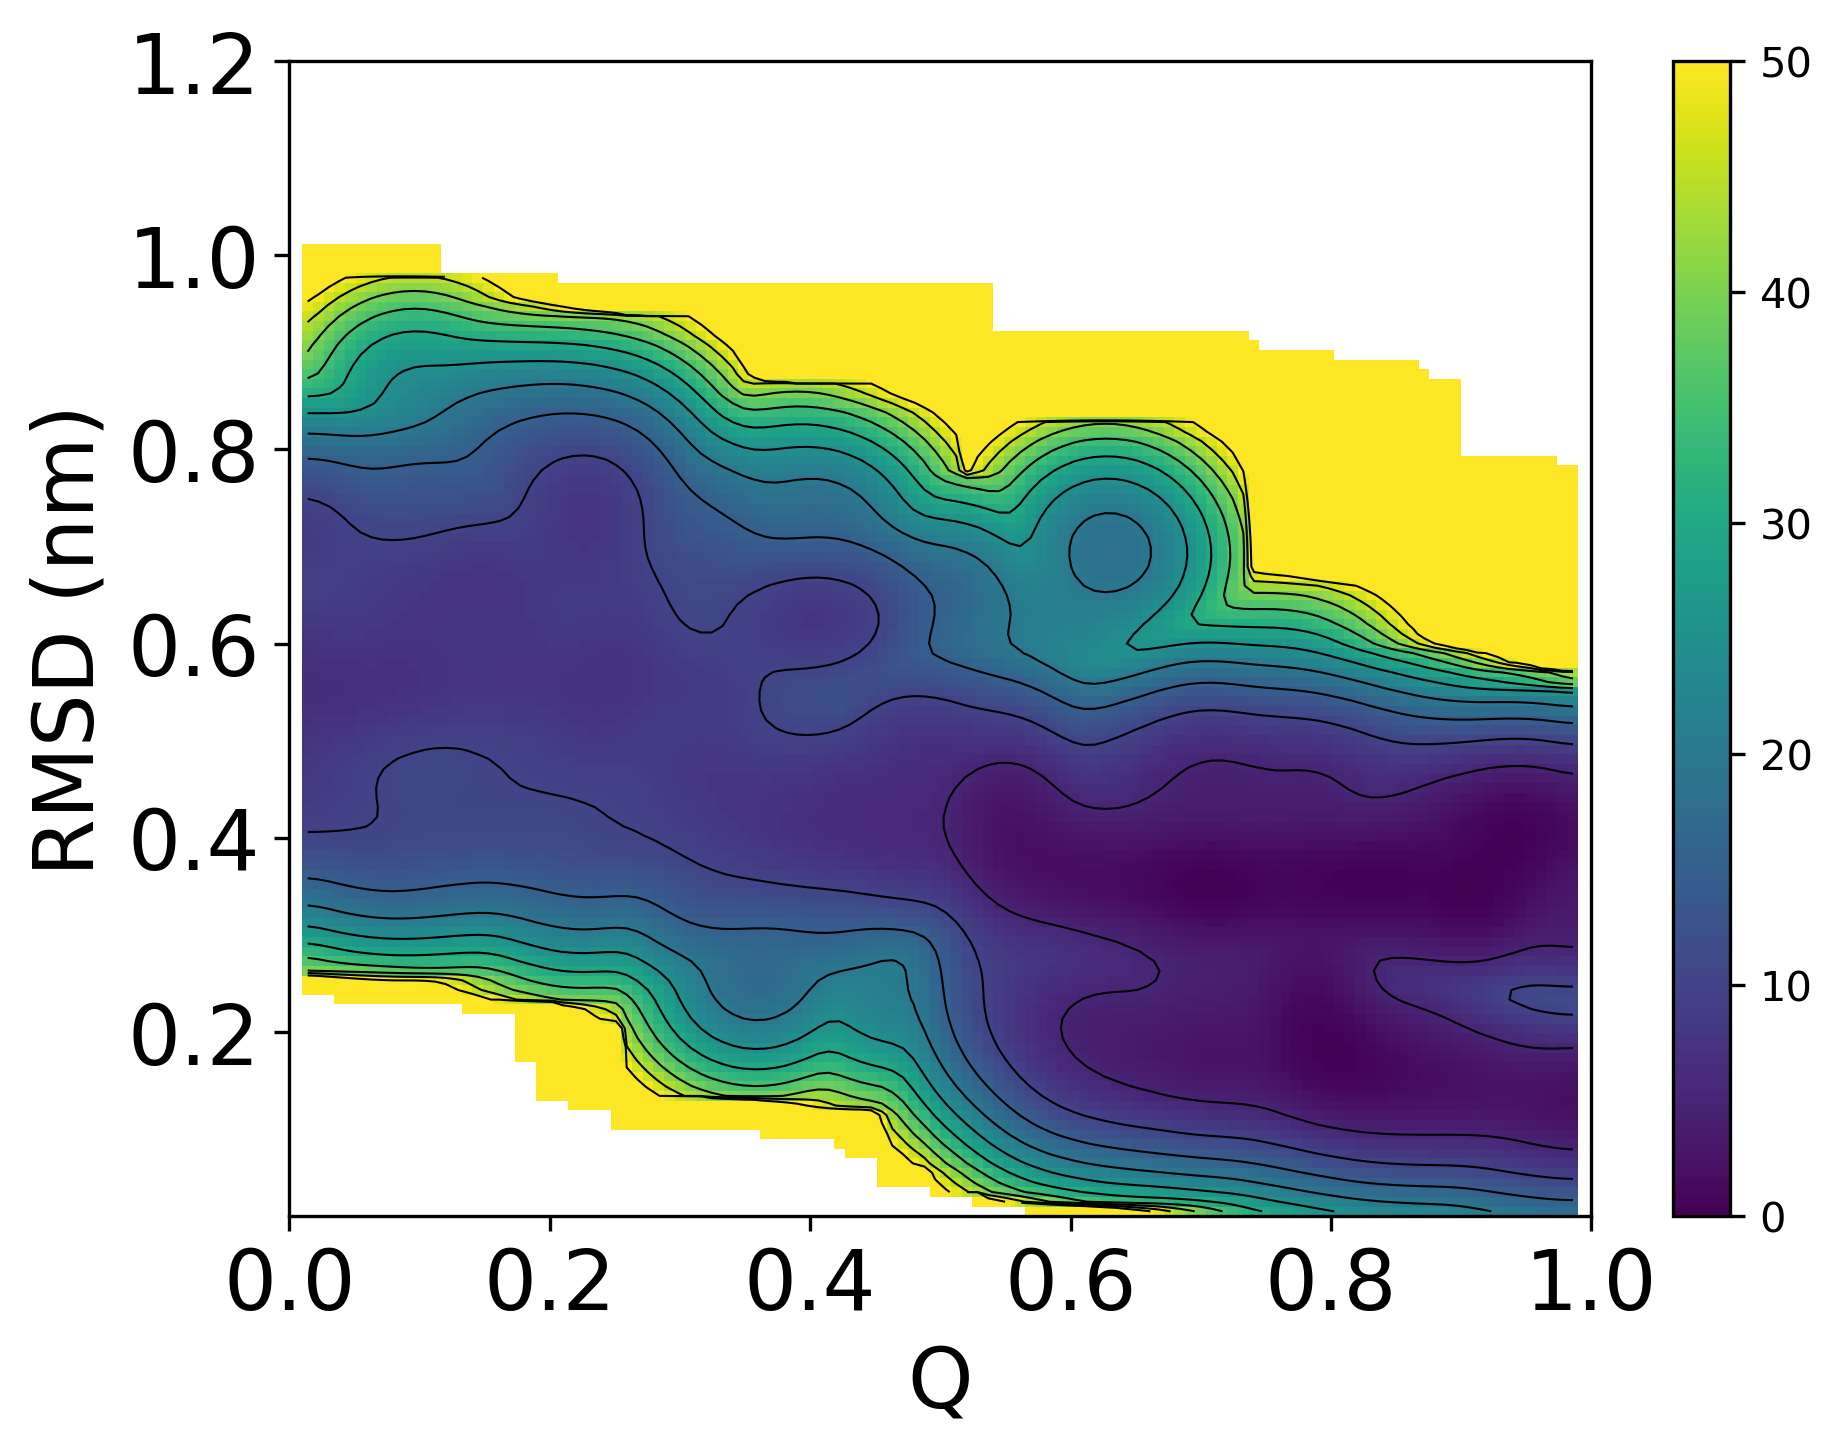

/tmp/ipykernel_695368/2368523432.py:49: RuntimeWarning: invalid value encountered in subtract
  DH = np.sqrt((H1-H2)**2)


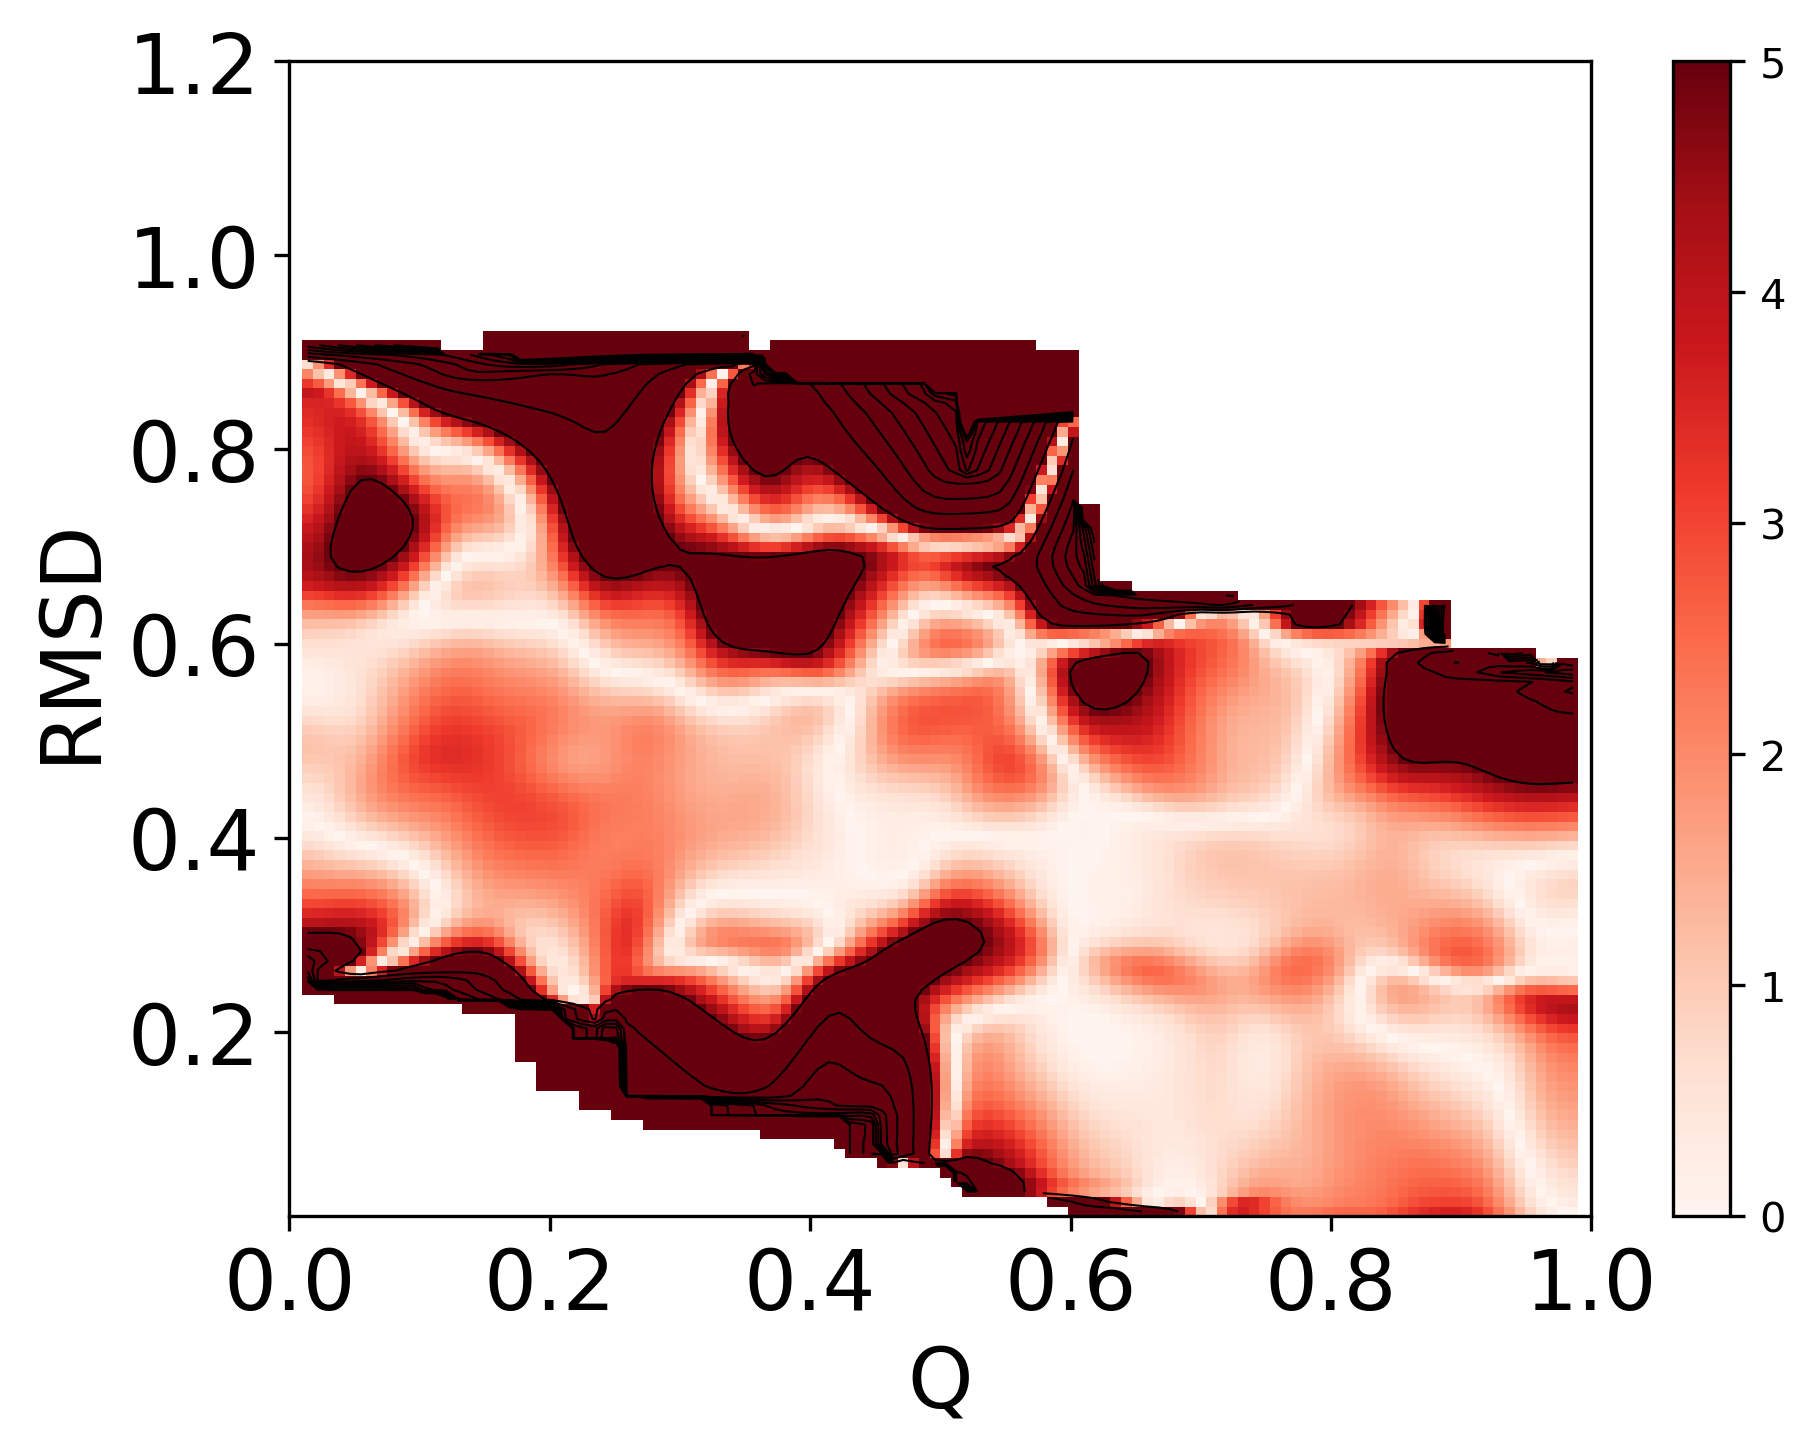

In [9]:
from scipy.ndimage import gaussian_filter

# WTM
temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H2, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H2 = H2.T
H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
H2 -= np.amin(H2) 


# OPES

kb=0.00831446 # kJ/mol/K
temperature=377.5 # K
beta=1./(kb*temperature)
newTemperature=300 # K
newBeta=1./(kb*newTemperature)
logweights=beta*bias_10+(beta-newBeta)*energy_10
logweights -= np.amax(logweights)
weights = np.exp(logweights)

H1, xedges1, yedges1 = np.histogram2d(cmap_10, rmsd_10, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H1 = H1.T
H1=-(1/newBeta)*np.log(gaussian_filter(H1, sigma=3))
H1 -= np.amin(H1) 
X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, H1, vmin=0,vmax=50)
plt.colorbar()
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.
#plt.contour(x,y, H1,20,vmin=0,vmax=20,colors='black',linewidths=0.5)
plt.contour(x,y, H1 ,np.arange(0,55,5),colors='black',linewidths=0.5)

plt.xlim([0,1])
plt.ylim([0.01,1.2])

plt.xlabel("Q", fontsize=20)
plt.ylabel("RMSD (nm)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

# Error
DH = np.sqrt((H1-H2)**2)

X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, DH, vmin=0,vmax=5, cmap="Reds")

plt.colorbar()
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.

plt.contour(x,y, DH ,np.arange(0,55,5),colors='black',linewidths=0.5)

plt.xlim([0,1])
plt.ylim([0.01,1.2])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Q",fontsize=20)
plt.ylabel("RMSD",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.show()

In [10]:
# Delta F where F of WTM is < 10 
import math
F_10 =0
N_grids = 0
for i in range(120):
    for j in range(120):
#        if H1[i,j] < 10:
            if H2[i,j]<10:
                F_10 += math.sqrt((H1[i,j]-H2[i,j])**2)
                N_grids +=1
diff = F_10/N_grids
diff

1.4663056675625254

In [18]:
ignore=25000 # Ignore this many lines from the beginning of files
ignore2=50000
COLVAR=np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/0/pasted")[ignore:ignore2+1,:]
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/1/pasted")[ignore:ignore2+1,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/2/pasted")[ignore:ignore2+1,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/3/pasted")[ignore:ignore2+1,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/4/pasted")[ignore:ignore2+1,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/5/pasted")[ignore:ignore2+1,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/6/pasted")[ignore:ignore2+1,:]))
COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/7/pasted")[ignore:ignore2+1,:]))


In [19]:
time_10=np.copy(COLVAR[:,0])

In [20]:
time_10[0]

250000.0

In [21]:
time_10[-1]

500000.0

# convergence analysis

In [30]:
# We take the last frame of PTWTE-WTM as reference and calculate the avergae error 
# when we end MM-OPES simulations at different times

Error2=[]

# WTM
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")
ignore=25000
time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])
time0 = np.copy(data[ignore:,0])

temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H2, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H2 = H2.T
H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
H2 -= np.amin(H2) 


# OPES

kb=0.00831446 # kJ/mol/K
temperature=377.5 # K
beta=1./(kb*temperature)
newTemperature=300 # K
newBeta=1./(kb*newTemperature)

ignore=25000 # Ignore this many lines from the beginning of files
ignore2=25000
while ignore2 < 100001:
    
    COLVAR=np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/0/pasted")[ignore:ignore2+1,:]
    COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/1/pasted")[ignore:ignore2+1,:]))
    COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/2/pasted")[ignore:ignore2+1,:]))
    COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/3/pasted")[ignore:ignore2+1,:]))
    COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/4/pasted")[ignore:ignore2+1,:]))
    COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/5/pasted")[ignore:ignore2+1,:]))
    COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/6/pasted")[ignore:ignore2+1,:]))
    COLVAR=np.concatenate((COLVAR,np.genfromtxt("/project/zerze/krahimin/test_opes/test_opes_gaga/new_tests/290_465_377.5/data/hills/7/pasted")[ignore:ignore2+1,:]))

    # We assign to new variables the data of two CVs, the energy, and the bias
    time_10=np.copy(COLVAR[:,0])
    cmap_10=np.copy(COLVAR[:,2])
    rmsd_10=np.copy(COLVAR[:,7])
    energy_10=np.copy(COLVAR[:,1])
    bias_10=np.copy(COLVAR[:,5])

    logweights=beta*bias_10+(beta-newBeta)*energy_10
  #  print (len(logweights))
    logweights -= np.amax(logweights)
    weights = np.exp(logweights)

    H1, xedges1, yedges1 = np.histogram2d(cmap_10, rmsd_10, weights=weights, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/newBeta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1) 

    # Delta F where F of WTM is < 10 

    F_10 =0
    N_grids = 0
    for i in range(120):
        for j in range(120):

                if H2[i,j]<10:
                    F_10 += math.sqrt((H1[i,j]-H2[i,j])**2)
                    N_grids +=1
    diff = F_10/N_grids
    Error2.append ([time_10[-1],diff])

    ignore2+=2000

/tmp/ipykernel_2397624/277396387.py:24: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
/tmp/ipykernel_2397624/277396387.py:63: RuntimeWarning: divide by zero encountered in log
  H1=-(1/newBeta)*np.log(gaussian_filter(H1, sigma=3))


In [11]:
type(Error[30][1])

float

In [31]:
Error2

[[250000.0, inf],
 [270000.0, inf],
 [290000.0, inf],
 [310000.0, inf],
 [330000.0, inf],
 [350000.0, inf],
 [370000.0, inf],
 [390000.0, inf],
 [410000.0, inf],
 [430000.0, inf],
 [450000.0, inf],
 [470000.0, inf],
 [490000.0, inf],
 [510000.0, inf],
 [530000.0, inf],
 [550000.0, inf],
 [570000.0, inf],
 [590000.0, inf],
 [610000.0, inf],
 [630000.0, inf],
 [650000.0, inf],
 [670000.0, inf],
 [690000.0, 2.8336670361108927],
 [710000.0, 3.2548330611338105],
 [730000.0, 2.7991137270025783],
 [750000.0, 2.5259417089423466],
 [770000.0, 2.1761507799147153],
 [790000.0, 3.1746887338464695],
 [810000.0, 2.4426076800020726],
 [830000.0, 2.2215788298202015],
 [850000.0, 1.9942209255828893],
 [870000.0, 1.7533481426475357],
 [890000.0, 1.5141527956360459],
 [910000.0, 1.4538544962182716],
 [930000.0, 1.410941803737623],
 [950000.0, 1.36393678221837],
 [970000.0, 1.2577029960251114],
 [990000.0, 1.1594988224043126]]

In [35]:
Error2[0:13]+Error

[[250000.0, inf],
 [270000.0, inf],
 [290000.0, inf],
 [310000.0, inf],
 [330000.0, inf],
 [350000.0, inf],
 [370000.0, inf],
 [390000.0, inf],
 [410000.0, inf],
 [430000.0, inf],
 [450000.0, inf],
 [470000.0, inf],
 [490000.0, inf],
 [500020.0, inf],
 [540020.0, inf],
 [580020.0, 2.3267723190651624],
 [620020.0, 2.2587624958560655],
 [660020.0, 2.4100012160733773],
 [700020.0, 2.3106635264381947],
 [740020.0, 2.343043363195901],
 [780020.0, 2.20904114715348],
 [820020.0, 1.419518840229104],
 [860020.0, 1.410890094127685],
 [900020.0, 1.048907234895287],
 [940020.0, 0.7679792664225399],
 [980020.0, 0.422007563930727],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 0.0],
 [1000000.0, 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: palatino


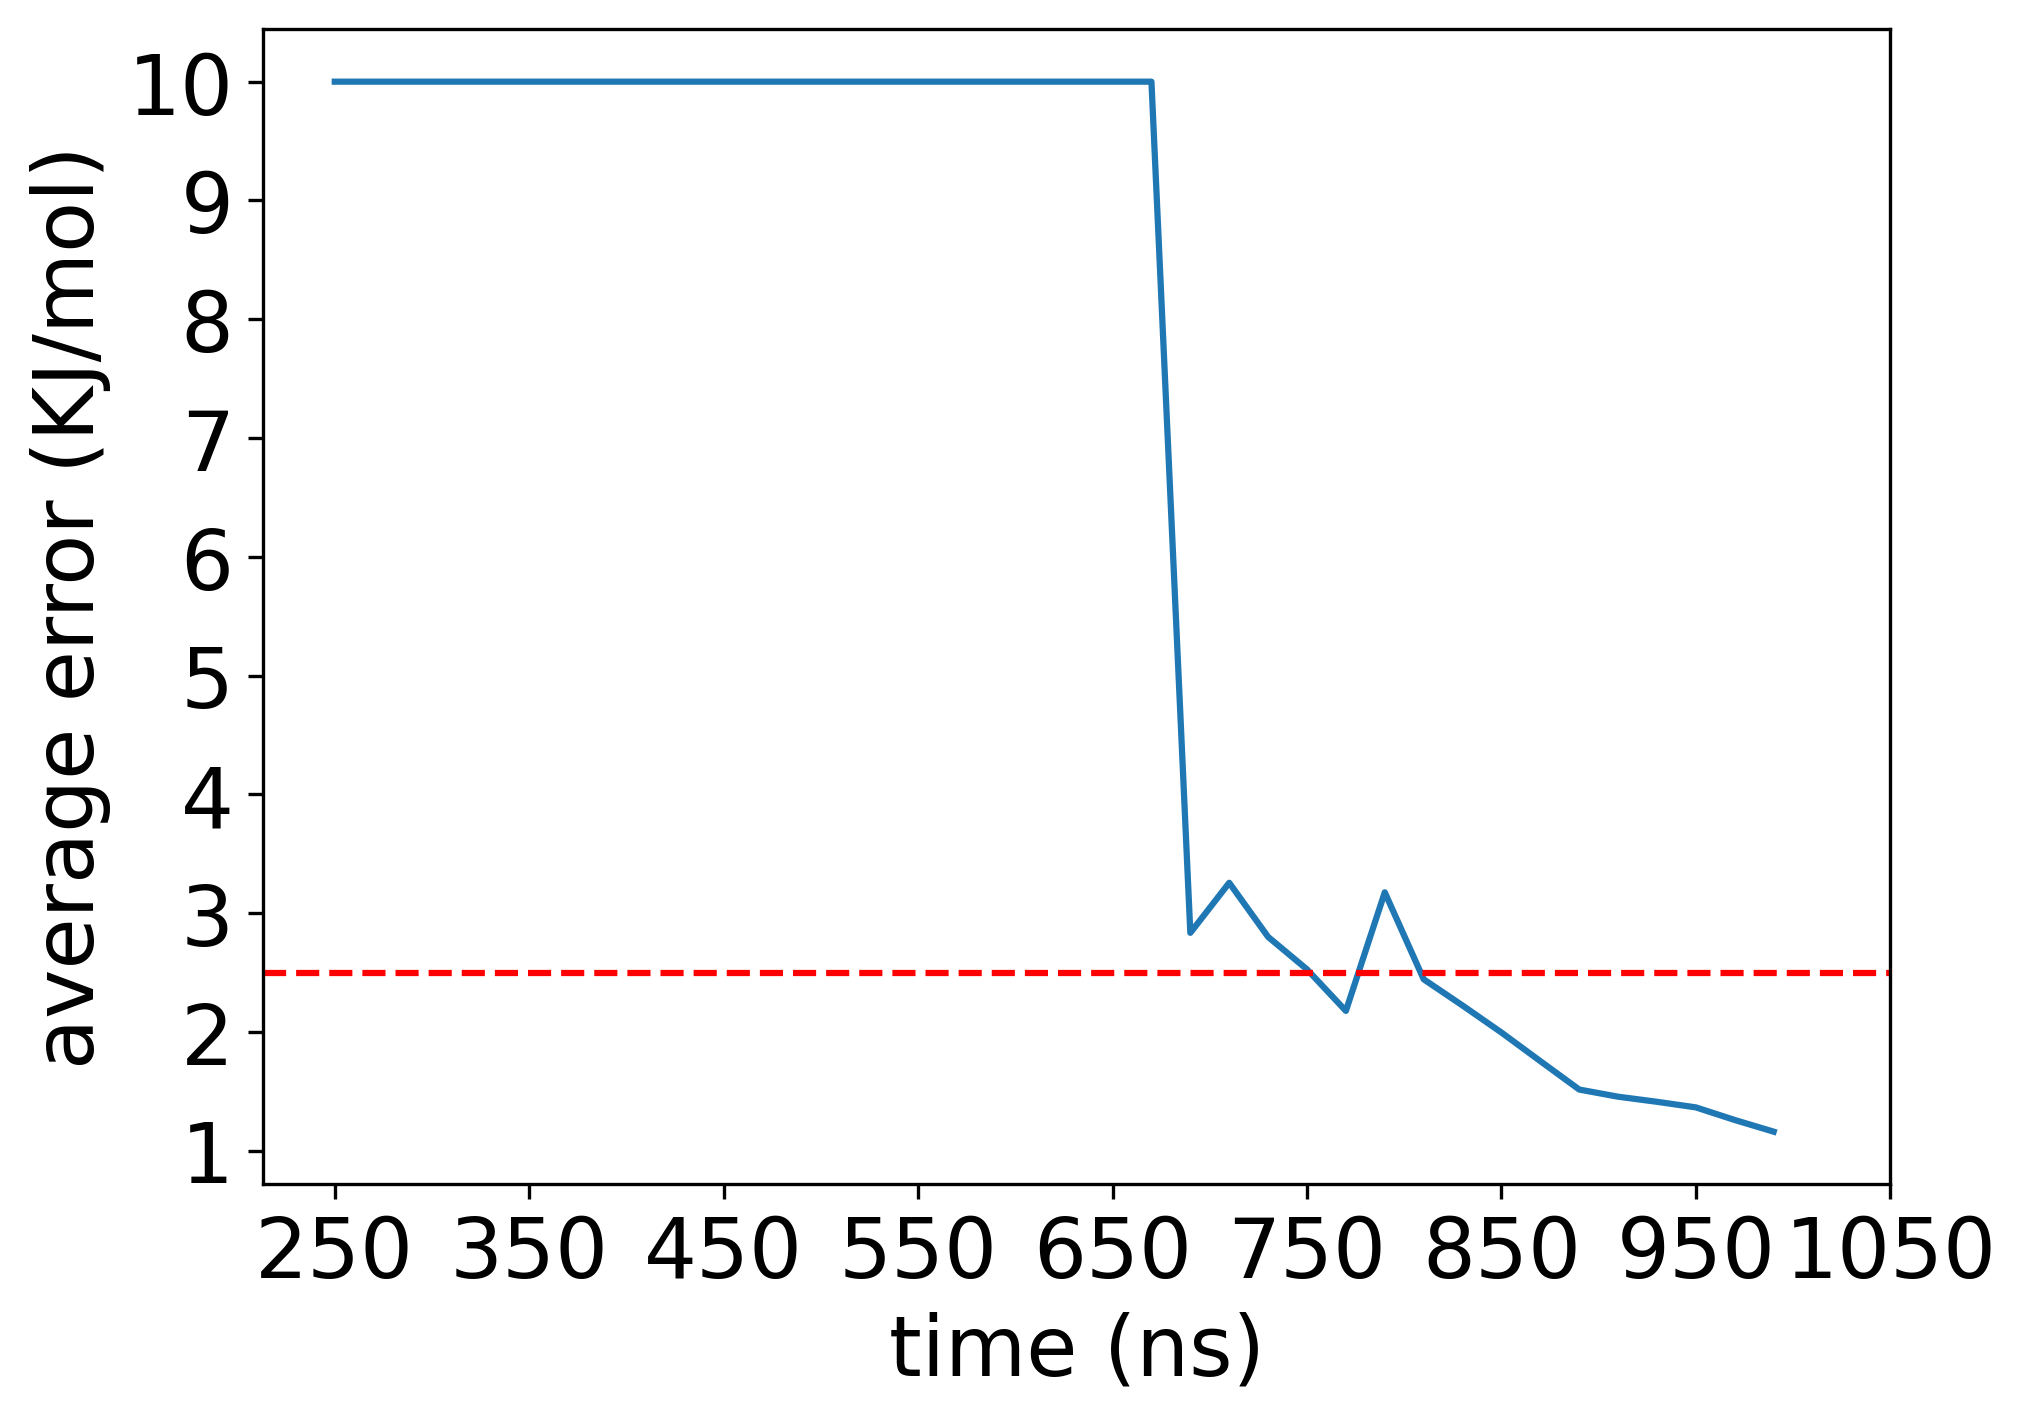

In [7]:
x=[]
y=[]
for i in Error:
    x.append(i[0]/1000)
    if i[1]>10:
        i[1]=10 # considering inf as 10 in the plot
    y.append(i[1])
    
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+100,100))
plt.yticks(np.arange(1, 11, 1))

kb=0.00831446
temperature=300.0
kt=kb*temperature
plt.axhline(y=kt, color="red", linestyle="--")

plt.xlabel("time (ns)",fontsize=20)
plt.ylabel("average error (KJ/mol)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

/tmp/ipykernel_2397624/852358083.py:24: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
/tmp/ipykernel_2397624/852358083.py:46: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))


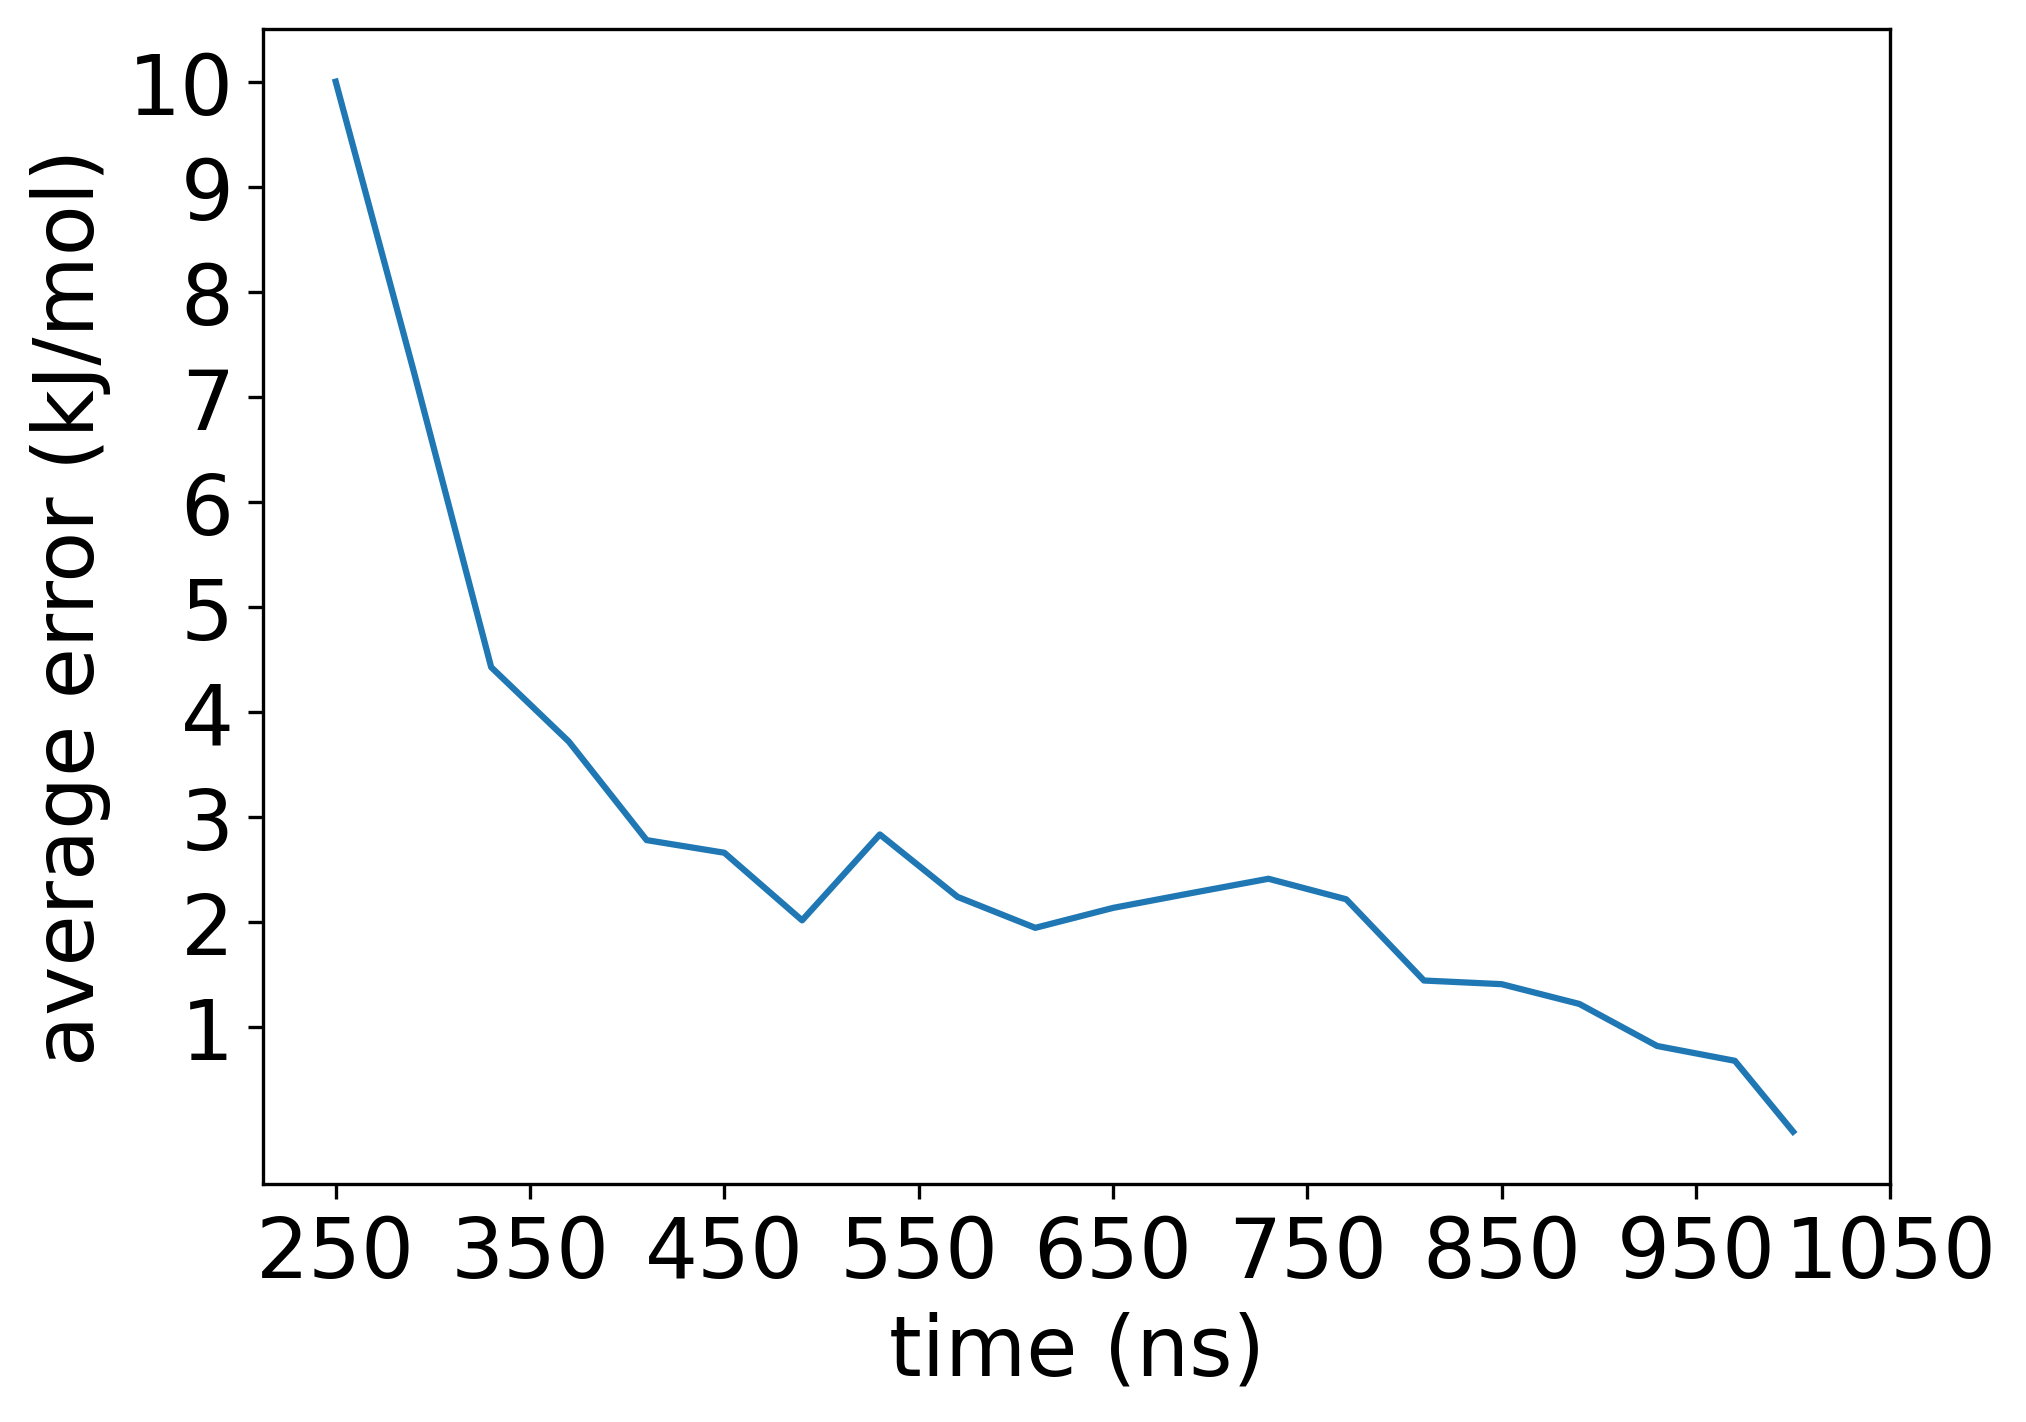

In [25]:
# convergence for PTWTE-WTM, ignore from 250 ns

Error=[]

# WTM
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")
ignore=25000 # Ignore this many lines from the beginning of files

time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])


temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H2, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H2 = H2.T
H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
H2 -= np.amin(H2) 


ignore=12500 
ignore2=12500
time2=np.copy(data[ignore:ignore2+1,16])
while ignore2 < 100001:
    
    # We assign to new variables the data of two CVs, the energy, and the bias
    time=np.copy(data[ignore:ignore2+1,16])
    cmap=np.copy(data[ignore:ignore2+1,7])
    rmsd=np.copy(data[ignore:ignore2+1,17])
    energy=np.copy(data[ignore:ignore2+1,1])
    bias=np.copy(data[ignore:ignore2+1,3]+data[ignore:ignore2+1,9]+data[ignore:ignore2+1,12]+data[ignore:ignore2+1,14])
    
    logweights2 = beta*bias
    logweights2 -= np.amax(logweights2)
    weights2 = np.exp(logweights2)

    H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1) 

    #Error= Delta F where F of WTM is < 10 

    F_10 =0
    N_grids = 0
    for i in range(120):
        for j in range(120):

                if H2[i,j]<10:
                    F_10 += math.sqrt((H1[i,j]-H2[i,j])**2)
                    N_grids +=1
    diff = F_10/N_grids
    Error.append ([time[-1],diff])

    ignore2+=2000
    

x=[]
y=[]
for i in Error:
    x.append(i[0]/1000)
    if i[1]>10:
        i[1]=10 # considering inf as 10 in the plot
    y.append(i[1])
    
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+100,100))
plt.yticks(np.arange(1, 11, 1))

plt.xlabel("time (ns)",fontsize=20)
plt.ylabel("average error (kJ/mol)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

In [26]:
H2==H3

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [33]:
# convergence for PTWTE-WTM

Error=[]

# WTM
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")
ignore=25000 # Ignore this many lines from the beginning of files

time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])


temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H3, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H3 = H3.T
H3=-(1/beta)*np.log(gaussian_filter(H3,sigma=3))
H3-= np.amin(H3)


 
ignore2=25000
time2=np.copy(data[ignore:ignore2+1,16])
while ignore2 < 100001:
    
    # We assign to new variables the data of two CVs, the energy, and the bias
    time=np.copy(data[ignore:ignore2+1,16])
    cmap=np.copy(data[ignore:ignore2+1,7])
    rmsd=np.copy(data[ignore:ignore2+1,17])
    energy=np.copy(data[ignore:ignore2+1,1])
    bias=np.copy(data[ignore:ignore2+1,3]+data[ignore:ignore2+1,9]+data[ignore:ignore2+1,12]+data[ignore:ignore2+1,14])
    
    logweights2 = beta*bias
    logweights2 -= np.amax(logweights2)
    weights2 = np.exp(logweights2)

    H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1) 

    #Error= Delta F where F of WTM is < 10 

    F_10 =0
    N_grids = 0
    for i in range(120):
        for j in range(120):

                if H3[i,j]<10:
                    F_10 += math.sqrt((H1[i,j]-H3[i,j])**2)
                    N_grids +=1
    diff = F_10/N_grids
    Error.append ([time[-1],diff])

    ignore2+=2000
    



/tmp/ipykernel_2397624/3364353144.py:24: RuntimeWarning: divide by zero encountered in log
  H3=-(1/beta)*np.log(gaussian_filter(H3,sigma=3))
/tmp/ipykernel_2397624/3364353144.py:46: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))


In [36]:
Error=Error2[0:13]+Error

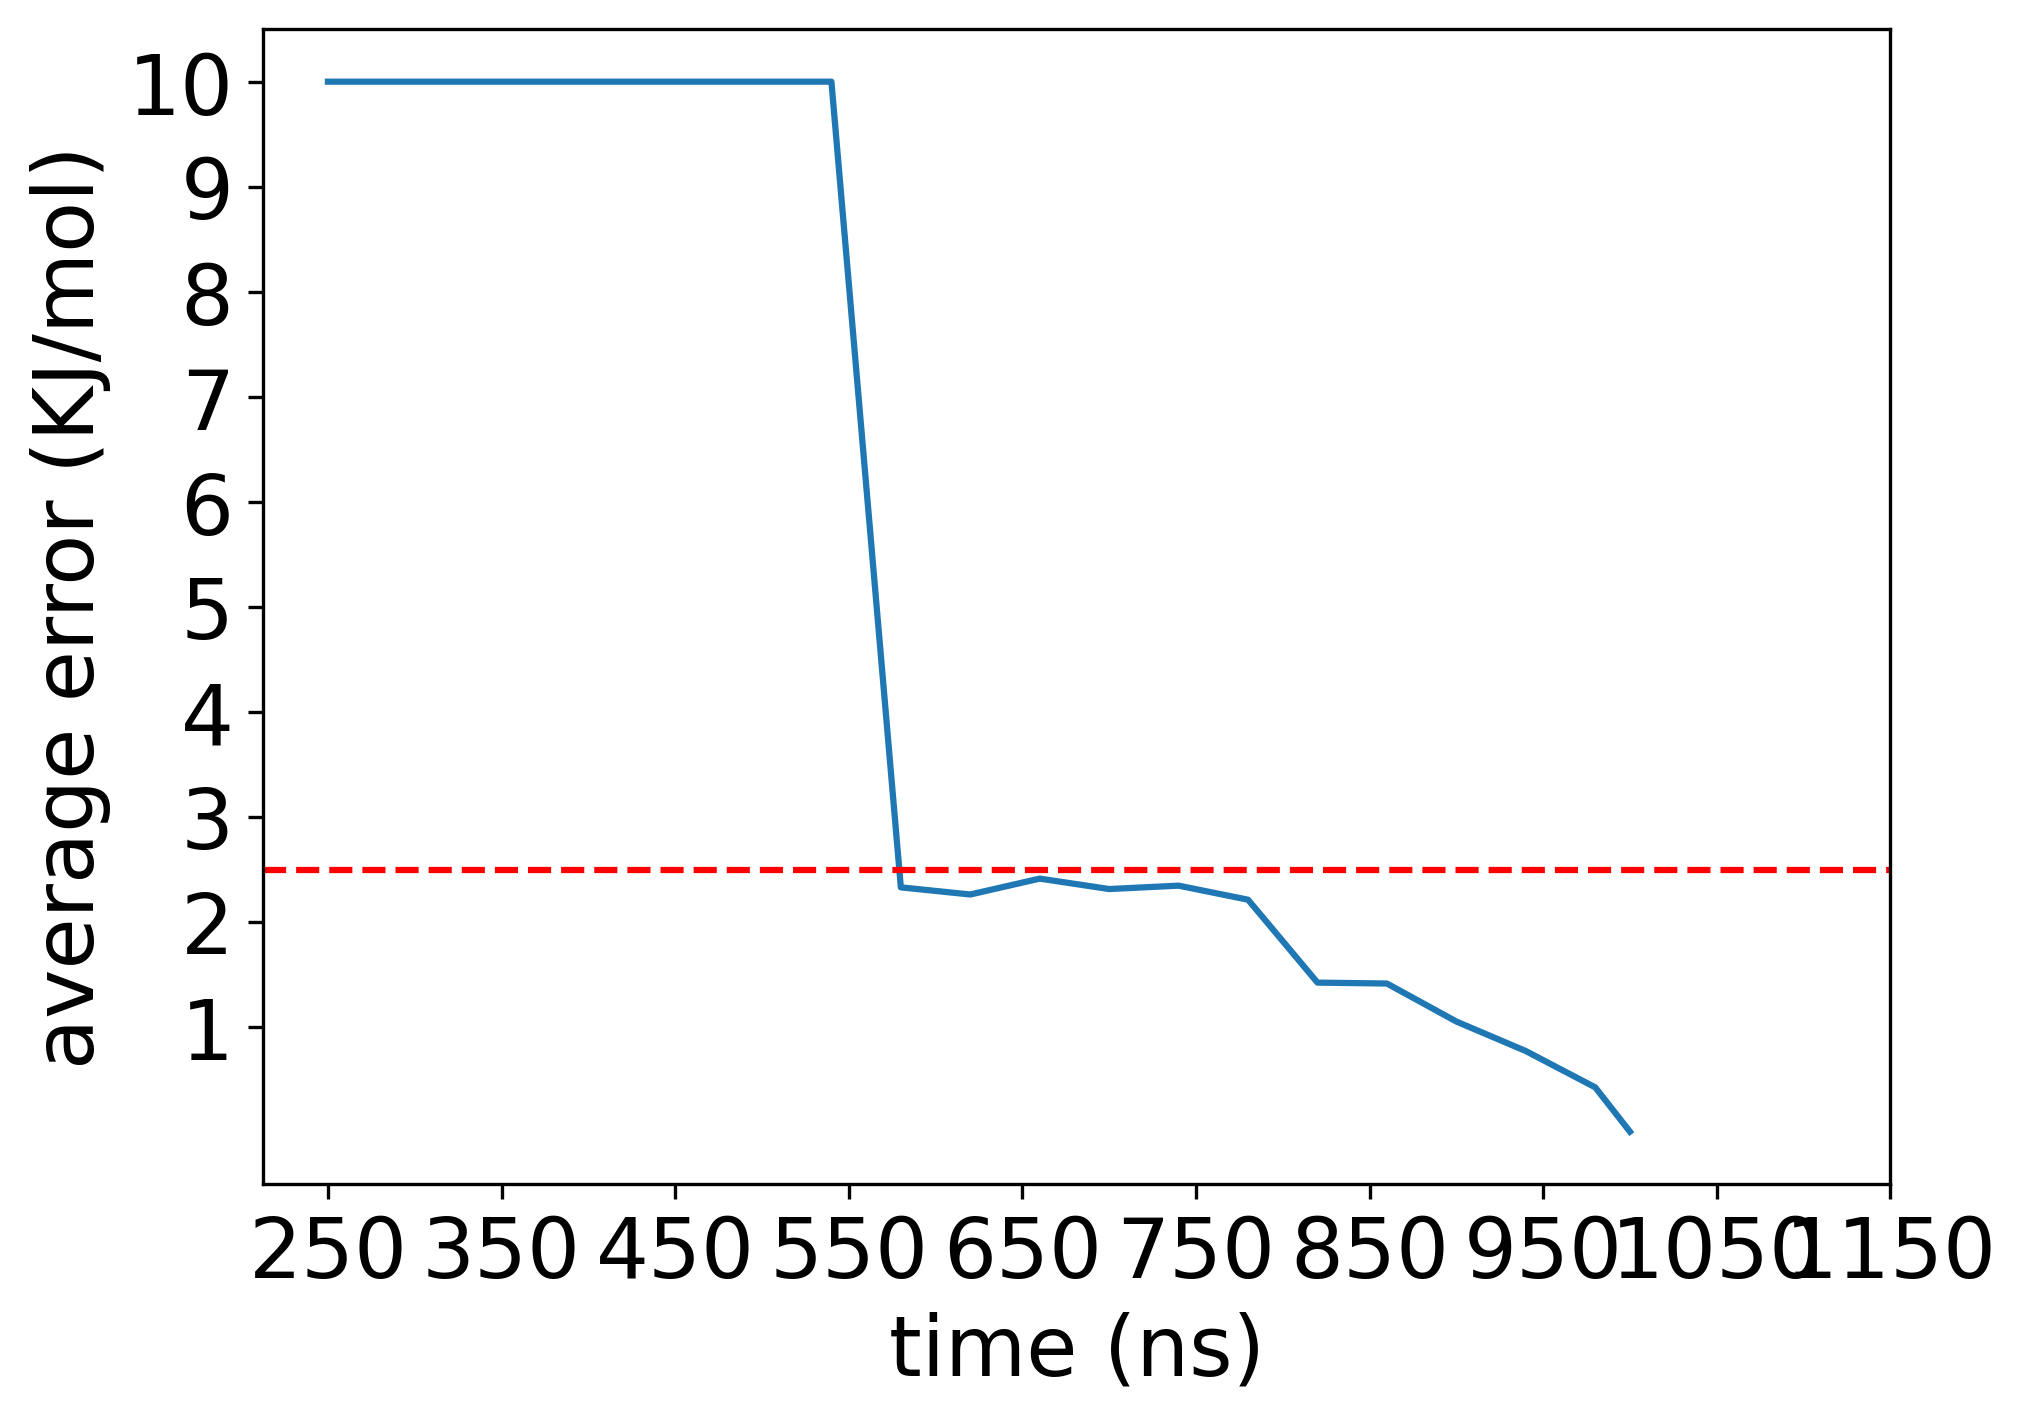

In [37]:
x=[]
y=[]
all_avg_error=0
avg_num=0
for i in Error:
    x.append(i[0]/1000)
    if i[1]>10:
#        print (i,i[0],i[1])
        i[1]=10 # considering inf as 10 in the plot
    else:
        all_avg_error+=i[1]
        avg_num+=1
    y.append(i[1])


kt=kb*temperature
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+100,100))
plt.yticks(np.arange(1, 11, 1))
plt.axhline(y=kt, color="red", linestyle="--")
#plt.axhline(y=pkt, color="black", linestyle="--") 

plt.xlabel("time (ns)",fontsize=20)
plt.ylabel("average error (KJ/mol)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

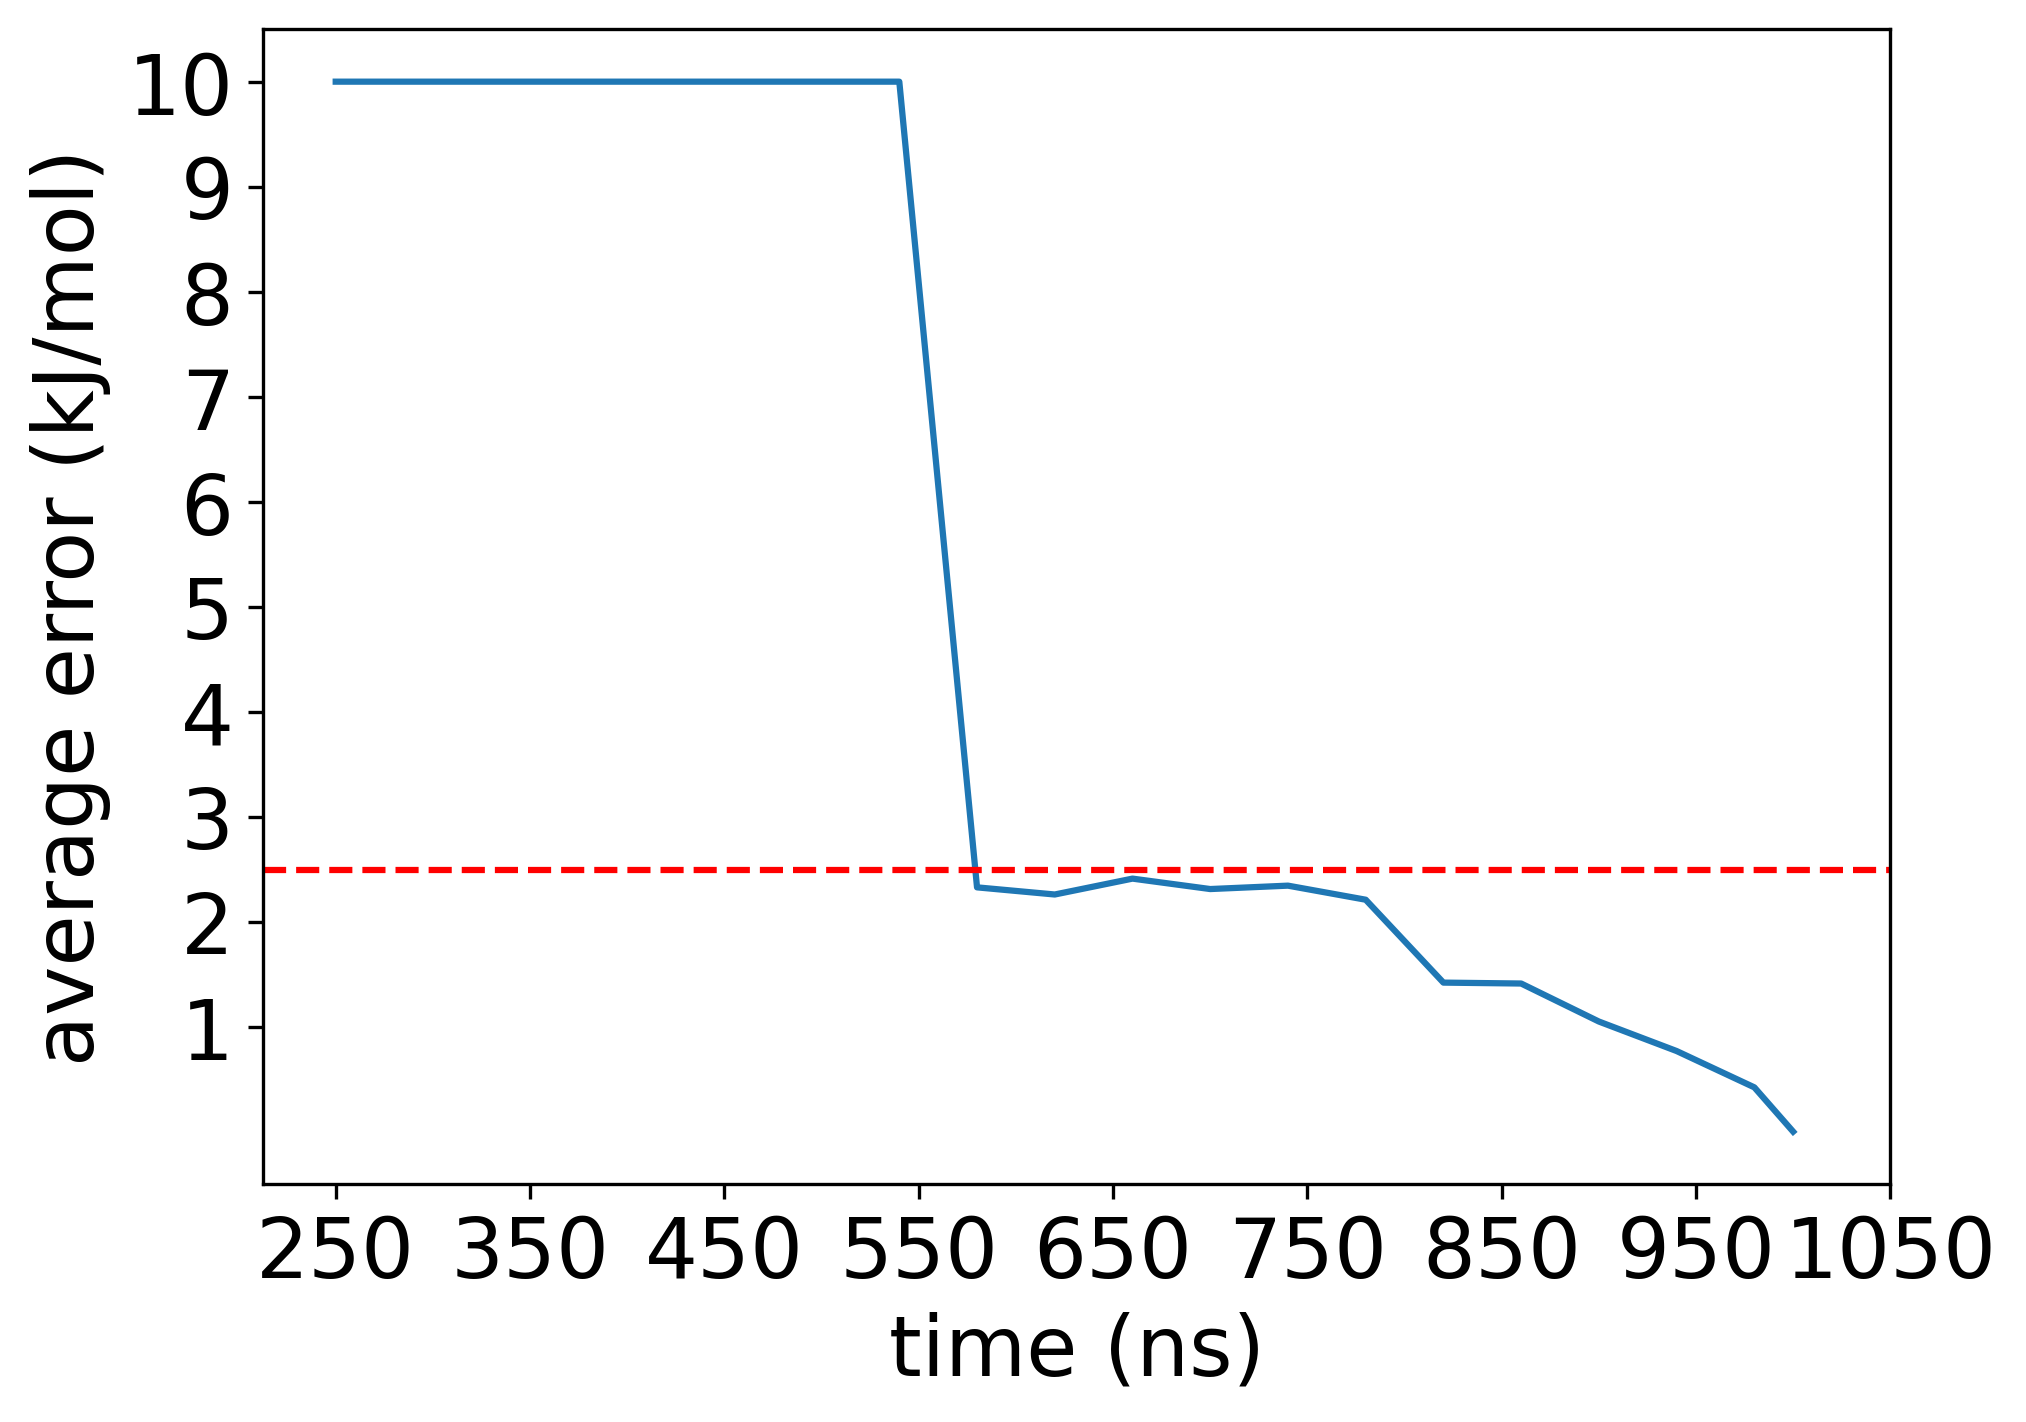

In [39]:
kt=kb*temperature
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+100,100))
plt.yticks(np.arange(1, 11, 1))
plt.axhline(y=kt, color="red", linestyle="--")
#plt.axhline(y=pkt, color="black", linestyle="--") 

plt.xlabel("time (ns)",fontsize=20)
plt.ylabel("average error (kJ/mol)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

/tmp/ipykernel_2099401/2027952294.py:24: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
/tmp/ipykernel_2099401/2027952294.py:46: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))


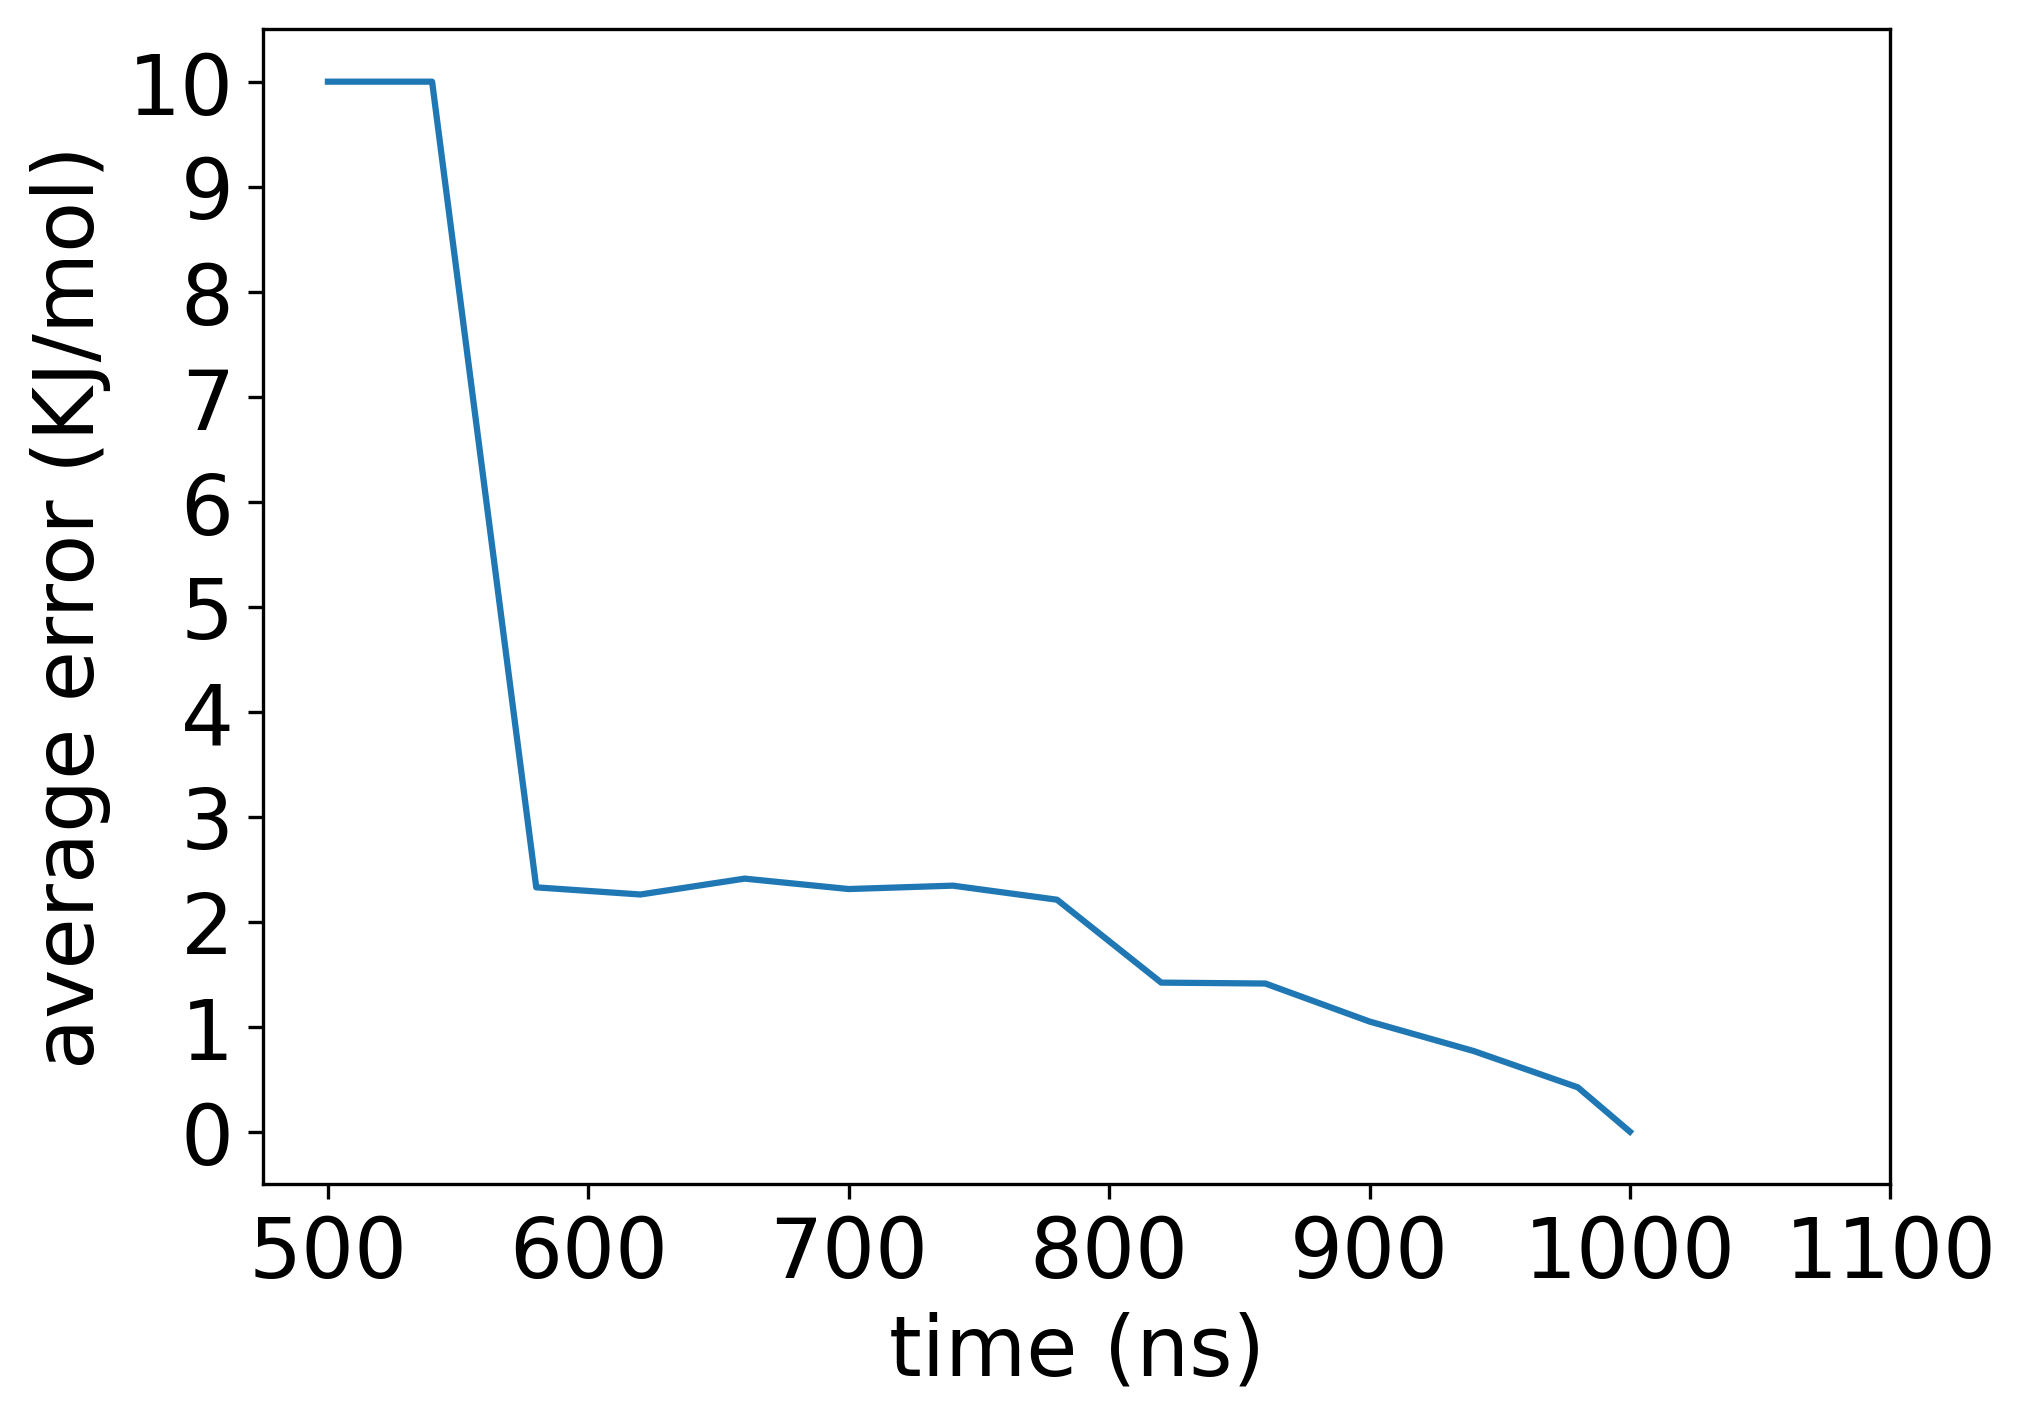

In [9]:
# convergence for PTWTE-WTM without KbT line

Error=[]

# WTM
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")
ignore=25000 # Ignore this many lines from the beginning of files

time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])


temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H2, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H2 = H2.T
H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
H2 -= np.amin(H2) 


 
ignore2=25000
time2=np.copy(data[ignore:ignore2+1,16])
while ignore2 < 100001:
    
    # We assign to new variables the data of two CVs, the energy, and the bias
    time=np.copy(data[ignore:ignore2+1,16])
    cmap=np.copy(data[ignore:ignore2+1,7])
    rmsd=np.copy(data[ignore:ignore2+1,17])
    energy=np.copy(data[ignore:ignore2+1,1])
    bias=np.copy(data[ignore:ignore2+1,3]+data[ignore:ignore2+1,9]+data[ignore:ignore2+1,12]+data[ignore:ignore2+1,14])
    
    logweights2 = beta*bias
    logweights2 -= np.amax(logweights2)
    weights2 = np.exp(logweights2)

    H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1) 

    #Error= Delta F where F of WTM is < 10 

    F_10 =0
    N_grids = 0
    for i in range(120):
        for j in range(120):

                if H2[i,j]<10:
                    F_10 += math.sqrt((H1[i,j]-H2[i,j])**2)
                    N_grids +=1
    diff = F_10/N_grids
    Error.append ([time[-1],diff])

    ignore2+=2000
    

x=[]
y=[]
for i in Error:
    x.append(i[0]/1000)
    if i[1]>10:
        i[1]=10 # considering inf as 10 in the plot
    y.append(i[1])
    
plt.plot(x,y)
plt.xticks(np.arange(min(x), 1200,100))
plt.yticks(np.arange(0, 11, 1))

plt.xlabel("time (ns)",fontsize=20)
plt.ylabel("average error (KJ/mol)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

In [16]:
Error=[]

# WTM
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")
ignore=25000 # Ignore this many lines from the beginning of files

time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])


temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H3, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H3 = H2.T
H3=-(1/beta)*np.log(gaussian_filter(H3,sigma=3))
H3-= np.amin(H3)


/tmp/ipykernel_2397624/1174847656.py:23: RuntimeWarning: invalid value encountered in subtract
  H3-= np.amin(H3)


In [20]:

# WTM
data=np.genfromtxt("/project/zerze/old_data/rna_data/deshaw_ggcGAGAgcc_IC1_uf/data/hills/stride0/COLVAR_REW")
ignore=25000 # Ignore this many lines from the beginning of files

time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])


temperature=300.0
beta=1./(0.00831441001626*temperature)
logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

H2, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
H2 = H2.T
H4=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
H4 -= np.amin(H4) 

/tmp/ipykernel_2397624/374237775.py:21: RuntimeWarning: invalid value encountered in subtract
  H4 -= np.amin(H4)


In [21]:
H4

array([[nan, nan, nan, ..., inf, inf, inf],
       [nan, nan, nan, ..., inf, inf, inf],
       [nan, nan, nan, ..., inf, inf, inf],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [19]:
H3

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [inf, inf, inf, ..., nan, nan, nan],
       [inf, inf, inf, ..., nan, nan, nan],
       [inf, inf, inf, ..., nan, nan, nan]])

# Delta_G for PTWTE-WTM

/tmp/ipykernel_529059/1200734841.py:23: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))


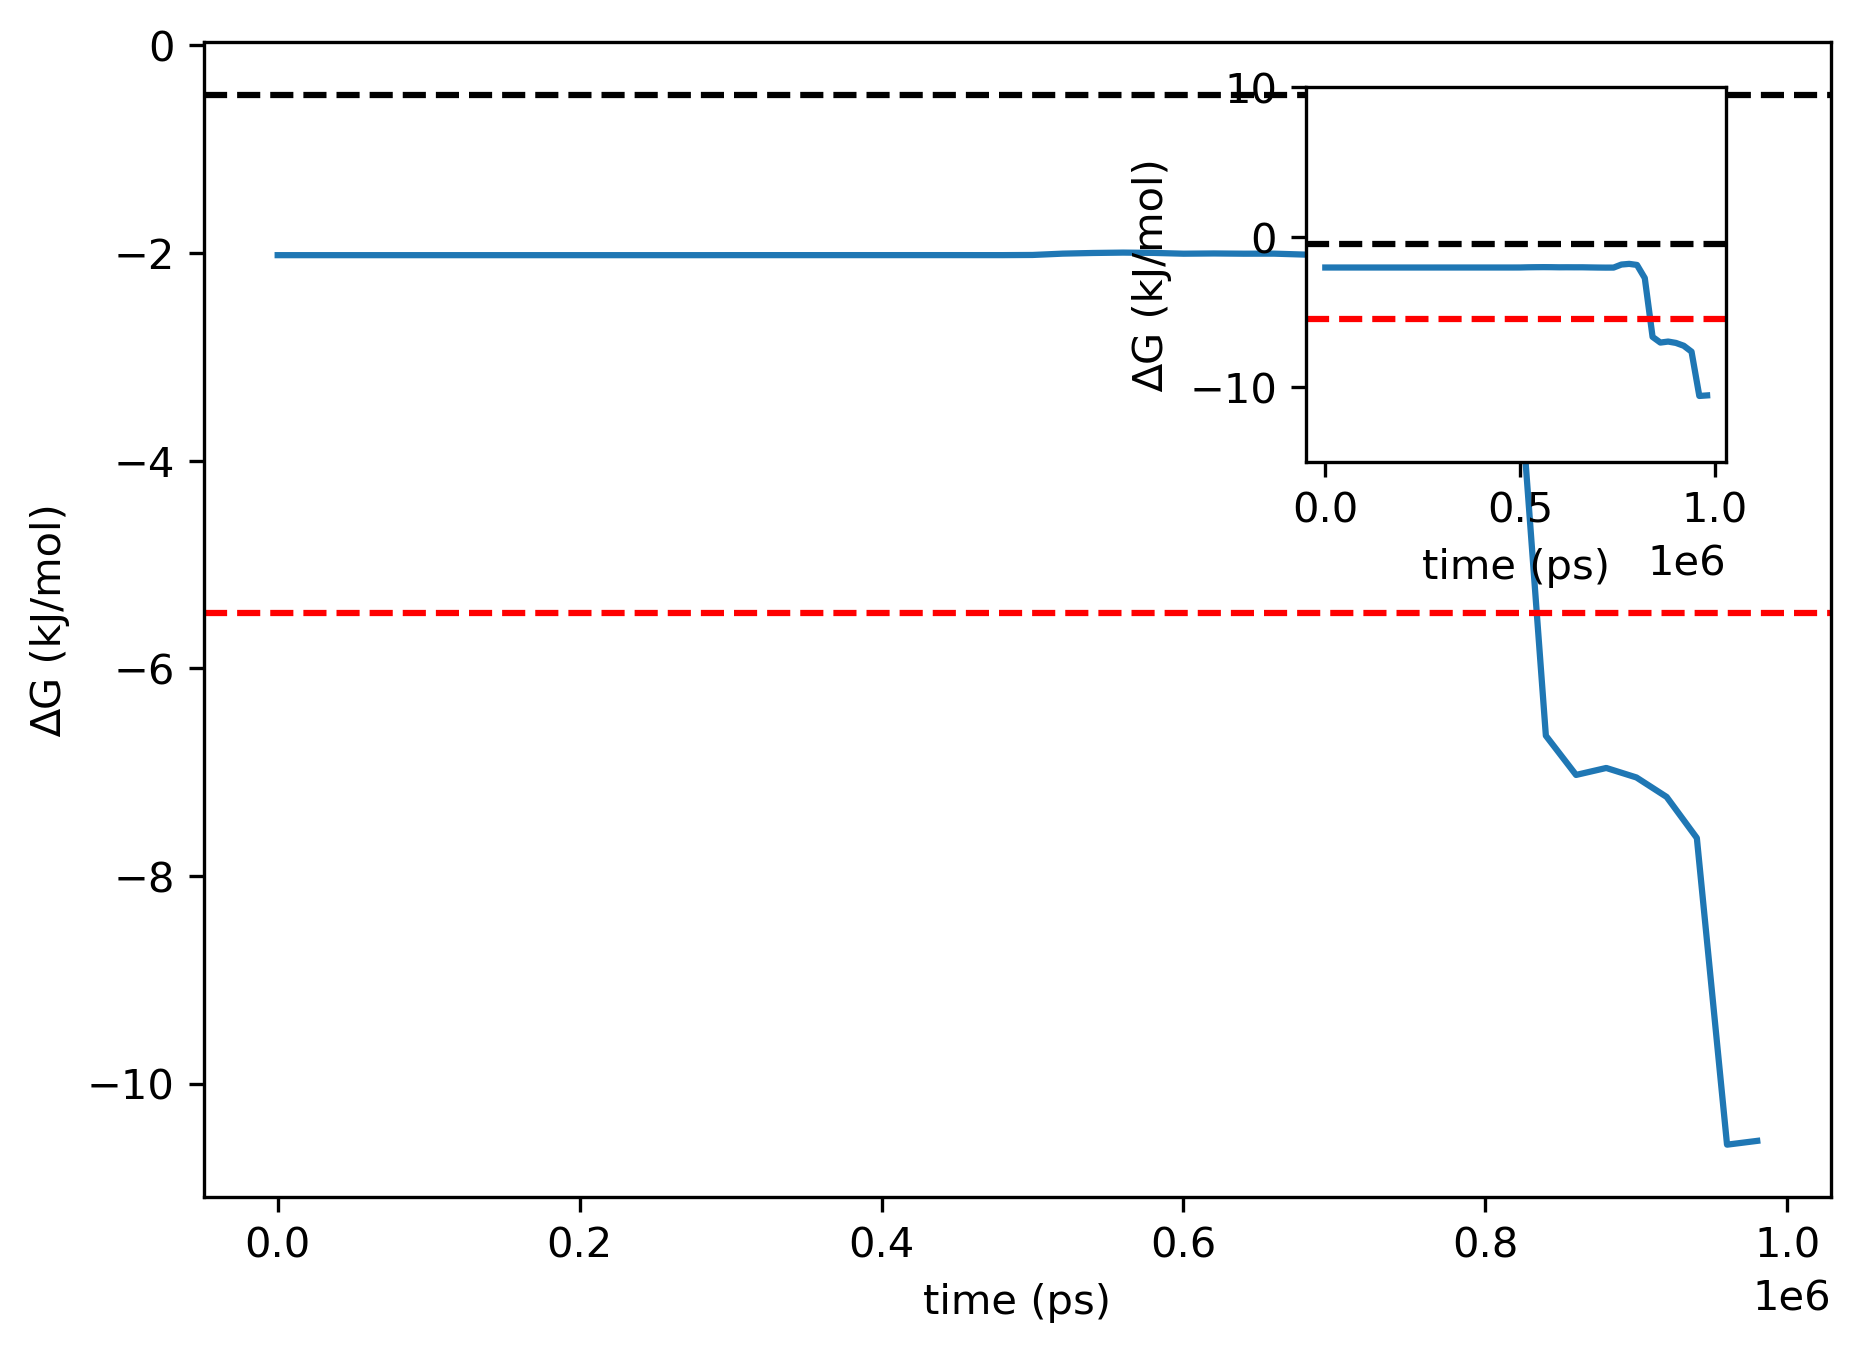

In [31]:
#ignore from beginning

from scipy.ndimage import gaussian_filter
all_delta_G=[]
time_list=[]
temperature=300.0
beta=1./(0.00831441001626*temperature)

kb=0.00831446 # kJ/mol/K
for ignore in range (0,50000,1000):

    time=np.copy(data[ignore:,16])
    energy=np.copy(data[ignore:,1])
    bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
    cmap=np.copy(data[ignore:,7])
    rmsd=np.copy(data[ignore:,17])  
    
                    
    logweights2 = beta*bias
    logweights2 -= np.amax(logweights2)
    weights2 = np.exp(logweights2)

    H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1) 
    
    X1, Y1 = np.meshgrid(xedges1, yedges1)
    x = (X1[1:,1:]+X1[:-1,:-1])/2.
    y = (Y1[1:,1:]+Y1[:-1,:-1])/2.
    
    U_FE_sum = 0
    F_FE_sum = 0
    U_n =0
    F_n =0
    for j in range (120):
        for i in range (120):
            if x[j][i] < 0.11:
             #   print (i,j)
                if (y[j][0] > 0.6) and (y[j][0] < 0.8):
                    U_FE_sum += np.exp(-H1[j][i]/(kb*temperature))
                    U_n +=1
                   # print (x[j][i], y[j][i], H1[i][j])

            if x[j][i] > 0.9:
                if y[j][0] < 0.2:
                    F_FE_sum+= np.exp(-H1[j][i]/(kb*temperature))
                    F_n +=1
    delta_G = -(kb*temperature)*np.log((F_FE_sum)/(U_FE_sum))
    all_delta_G.append(delta_G)
    time_list.append(np.copy(data[ignore,16]))


mkt = np.average(all_delta_G)-kb*temperature # minus kt
pkt = np.average(all_delta_G)+kb*temperature # plus kt

#creating subplot

fig, ax = plt.subplots()
left, bottom, width, height = [.65, 0.6, 0.2, 0.25]
ax_new = fig.add_axes([left, bottom, width, height])

ax_new.set_ylim(-15,10)
time = np.copy(data[:,16])
ax.plot(time_list,all_delta_G)

ax_new.plot(time_list,all_delta_G)

for a in ax, ax_new:
    a.axhline(y=mkt, color="red", linestyle="--")
    a.axhline(y=pkt, color="black", linestyle="--")
    a.set_xlabel("time (ps)")
    a.set_ylabel("∆G (kJ/mol)")

plt.show()

In [21]:
len(all_delta_G)

50

In [22]:
ignore

49000

In [28]:
len(time[0:ignore:1000])

49

In [29]:
time[0:ignore:1000]

array([2.0000e+01, 2.0020e+04, 4.0020e+04, 6.0020e+04, 8.0020e+04,
       1.0002e+05, 1.2002e+05, 1.4002e+05, 1.6002e+05, 1.8002e+05,
       2.0002e+05, 2.2002e+05, 2.4002e+05, 2.6002e+05, 2.8002e+05,
       3.0002e+05, 3.2002e+05, 3.4002e+05, 3.6002e+05, 3.8002e+05,
       4.0002e+05, 4.2002e+05, 4.4002e+05, 4.6002e+05, 4.8002e+05,
       5.0002e+05, 5.2002e+05, 5.4002e+05, 5.6002e+05, 5.8002e+05,
       6.0002e+05, 6.2002e+05, 6.4002e+05, 6.6002e+05, 6.8002e+05,
       7.0002e+05, 7.2002e+05, 7.4002e+05, 7.6002e+05, 7.8002e+05,
       8.0002e+05, 8.2002e+05, 8.4002e+05, 8.6002e+05, 8.8002e+05,
       9.0002e+05, 9.2002e+05, 9.4002e+05, 9.6002e+05])

In [26]:
len(time)

1000

In [38]:
all_delta_G[0]

nan

/tmp/ipykernel_887915/370911585.py:25: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
/tmp/ipykernel_887915/370911585.py:26: RuntimeWarning: invalid value encountered in subtract
  H1 -= np.amin(H1)


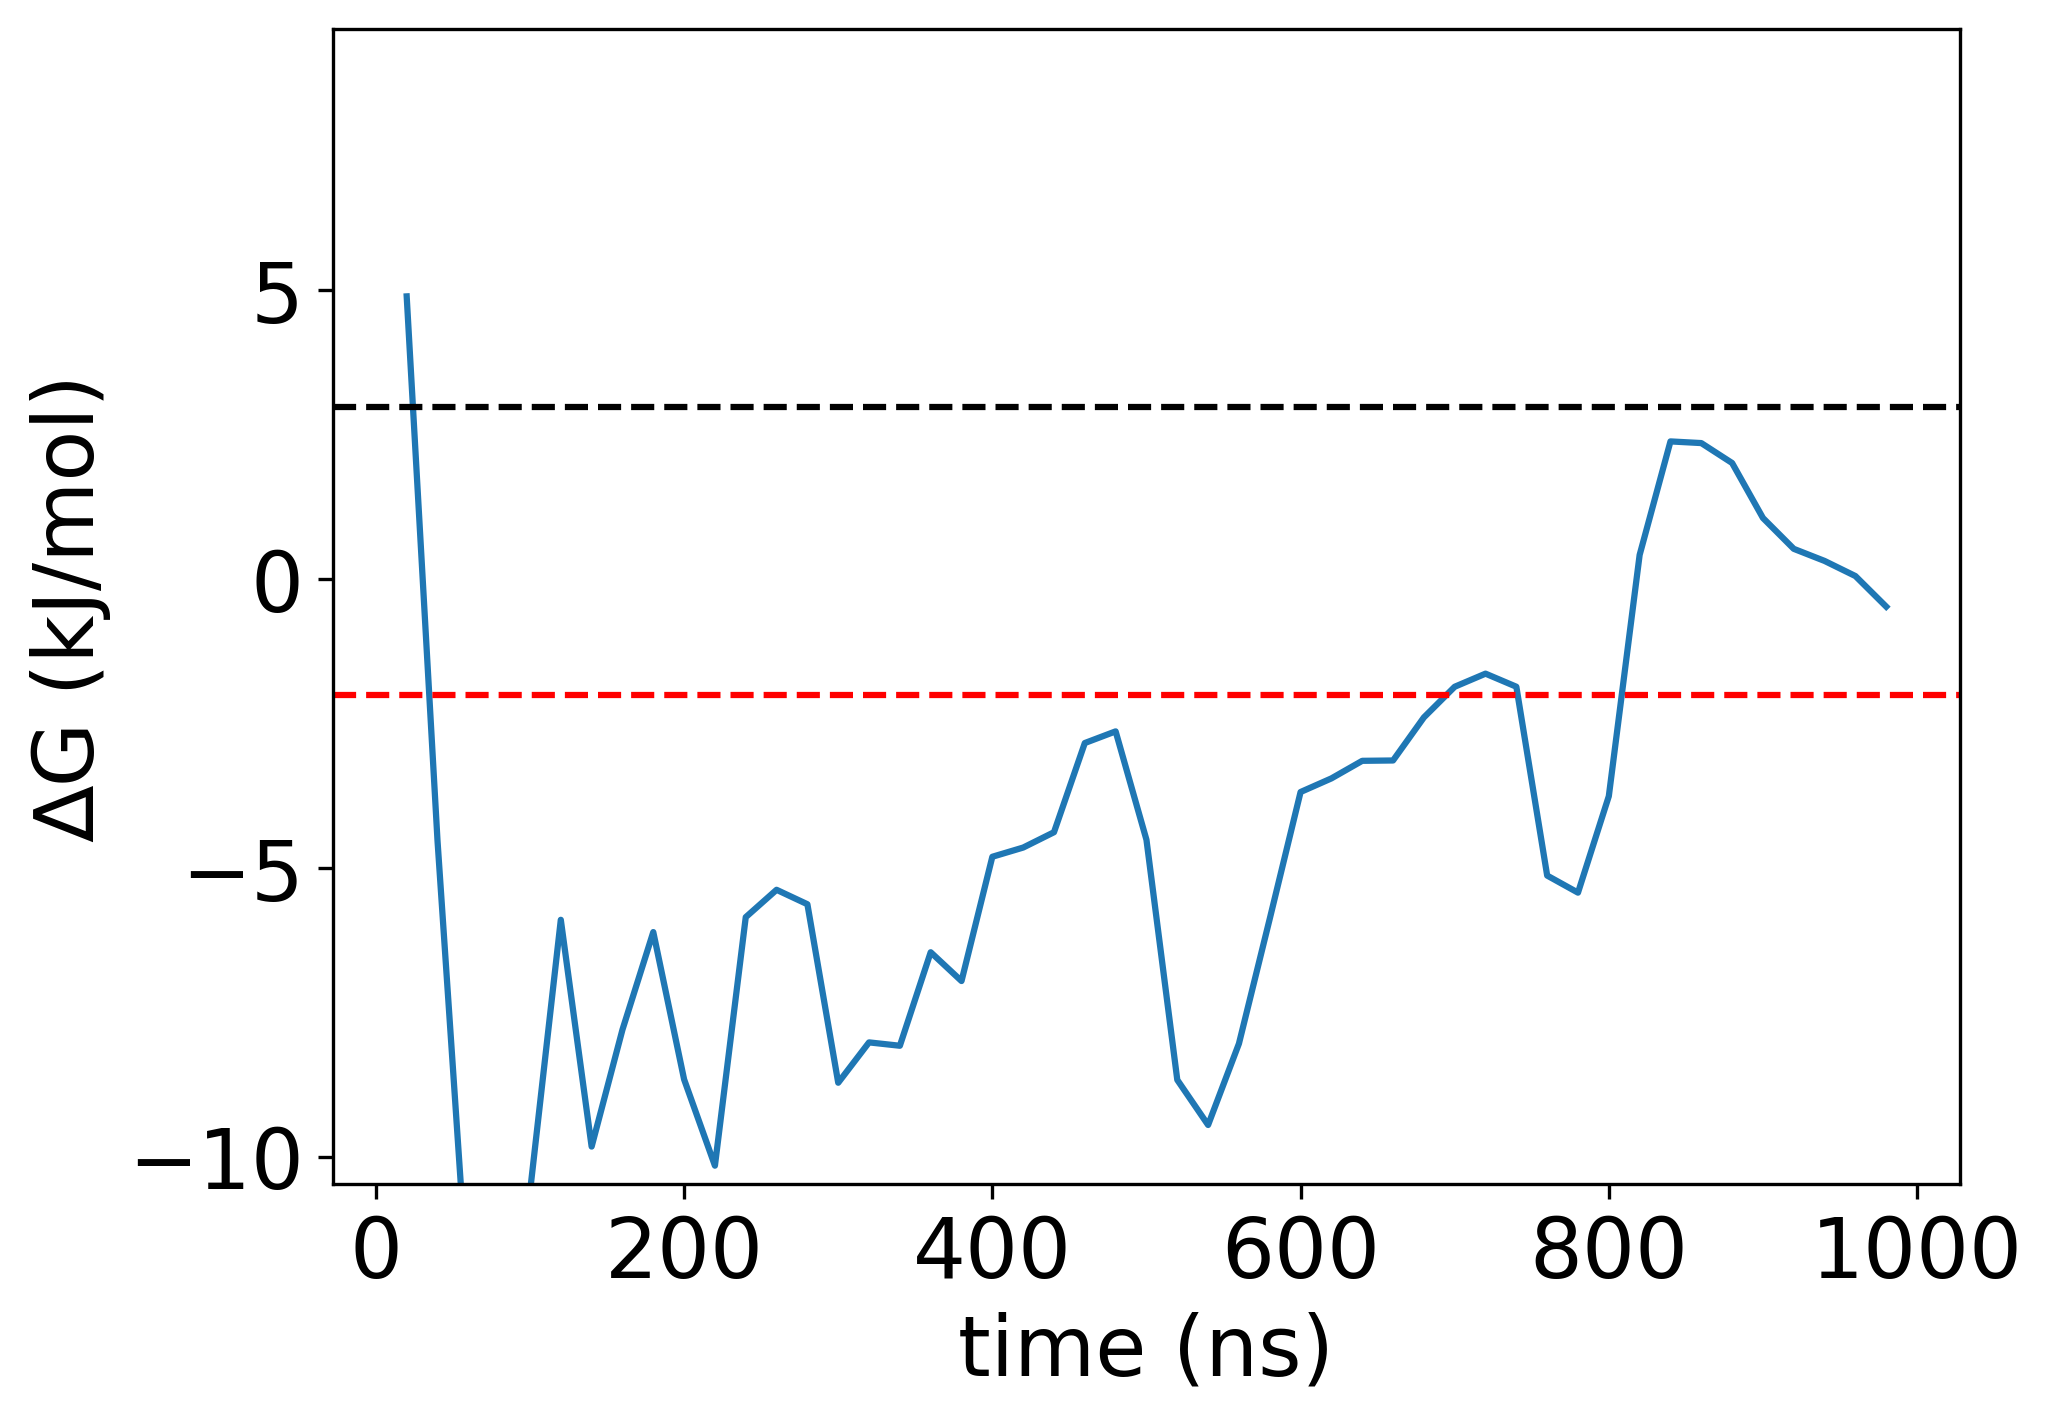

In [14]:
#cut from the end

from scipy.ndimage import gaussian_filter
all_delta_G=[]
time_list=[]
temperature=300.0
beta=1./(0.00831441001626*temperature)

kb=0.00831446 # kJ/mol/K
for ignore in range (1,50000,1000):

    time=np.copy(data[:ignore,16])
    energy=np.copy(data[:ignore,1])
    bias=np.copy(data[:ignore,3]+data[:ignore,9]+data[:ignore,12]+data[:ignore,14])
    cmap=np.copy(data[:ignore,7])
    rmsd=np.copy(data[:ignore,17])  
    
                    
    logweights2 = beta*bias
    logweights2 -= np.amax(logweights2)
    weights2 = np.exp(logweights2)

    H1, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[0.01,1.2]])
    H1 = H1.T
    H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
    H1 -= np.amin(H1) 
    
    X1, Y1 = np.meshgrid(xedges1, yedges1)
    x = (X1[1:,1:]+X1[:-1,:-1])/2.
    y = (Y1[1:,1:]+Y1[:-1,:-1])/2.
    
    U_FE_sum = 0
    F_FE_sum = 0
    U_n =0
    F_n =0
    for j in range (120):
        for i in range (120):
            if x[j][i] < 0.11:
             #   print (i,j)
                if (y[j][0] > 0.6) and (y[j][0] < 0.8):
                    U_FE_sum += np.exp(-H1[j][i]/(kb*temperature))
                    U_n +=1
                   # print (x[j][i], y[j][i], H1[i][j])

            if x[j][i] > 0.9:
                if y[j][0] < 0.2:
                    F_FE_sum+= np.exp(-H1[j][i]/(kb*temperature))
                    F_n +=1
    delta_G = -(kb*temperature)*np.log((F_FE_sum)/(U_FE_sum))
    all_delta_G.append(delta_G)
    time_list.append(np.copy(data[ignore,16])/1000)


mkt = np.average(all_delta_G[40:])-kb*temperature # minus kt
pkt = np.average(all_delta_G[40:])+kb*temperature # plus kt

#creating subplot

fig, ax = plt.subplots()
left, bottom, width, height = [.65, 0.6, 0.2, 0.25]

ax.plot(time_list,all_delta_G)

ax.axhline(y=mkt, color="red", linestyle="--")
ax.axhline(y=pkt, color="black", linestyle="--")
ax.set_xlabel("time (ns)", fontsize=20)
ax.set_ylabel("∆G (kJ/mol)", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(all_delta_G[-1]-10,all_delta_G[-1]+10)

plt.show()

In [36]:
mkt

nan

In [37]:
all_delta_G

[nan,
 4.894158359657535,
 -4.531337269490147,
 -12.404695761778225,
 -10.914054952706307,
 -10.617910462285138,
 -5.901051957149328,
 -9.828180751004092,
 -7.804140190769745,
 -6.113551899548945,
 -8.664402856398029,
 -10.158919658823264,
 -5.855254760456377,
 -5.381661682214934,
 -5.631577178115729,
 -8.722381576948504,
 -8.023820881034863,
 -8.082089681382364,
 -6.462897790888145,
 -6.961453785297779,
 -4.809496546610191,
 -4.650193938607897,
 -4.384567720962722,
 -2.840257490557415,
 -2.638141703180729,
 -4.515370795089512,
 -8.67300781660643,
 -9.454252586203427,
 -8.04570593939811,
 -5.883254978484512,
 -3.688485537511856,
 -3.452589908632458,
 -3.1482242107383036,
 -3.1422453109089887,
 -2.3965168252466653,
 -1.8656872566609837,
 -1.638809360491375,
 -1.8651914089538586,
 -5.135198374083048,
 -5.430935380817836,
 -3.760640358231165,
 0.4172572907723891,
 2.3826377689080624,
 2.353835031120777,
 2.0090334975025863,
 1.0568296580721674,
 0.5226510566886251,
 0.31312586502322776,
 